In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 90
pd.options.display.max_rows = 200

In [4]:
df = pd.read_csv('houses.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Splitting train and test sets

In [24]:
test_length = int(0.15 * len(df))

In [28]:
seed = 7
np.random.seed(seed)

idx = np.random.permutation(range(0, len(df)))

In [33]:
df.iloc[idx].reset_index(drop=True, inplace=True)

In [36]:
df.drop('index', axis=1, inplace=True)

In [38]:
train = df.iloc[:-test_length, :].copy()
test = df.iloc[-test_length:, :].copy()

In [39]:
print(f'Train data shape: {train.shape}')
print(f' Test data shape: {test.shape}')

Train data shape: (1241, 81)
 Test data shape: (219, 81)


In [40]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

### EDA

In [76]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1271          40       RL          NaN    23595   Pave   NaN      Reg   
1  1182         120       RM         64.0     5587   Pave   NaN      IR1   
2   380          60       RL         60.0     8123   Pave   NaN      IR1   
3   792          80       RL          NaN    11333   Pave   NaN      IR1   
4    13          20       RL          NaN    12968   Pave   NaN      IR2   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Low    AllPub    Inside       Sev      ClearCr       Norm   
1         HLS    AllPub    Inside       Mod      Crawfor       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
3         Lvl    AllPub    Corner       Gtl      Mitchel       Norm   
4         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            7            6       1979   
1       Norm   TwnhsE     1Story            8            5       2008   
2       Norm     1Fam     2Story            6            5       2000   
3       Norm     1Fam       SLvl            6            5       1976   
4       Norm     1Fam     1Story            5            6       1962   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1979      Shed  WdShake     Plywood     Plywood       None   
1          2008       Hip  CompShg     CemntBd     CmentBd      Stone   
2          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1976     Gable  CompShg     HdBoard     HdBoard       None   
4          1962       Hip  CompShg     HdBoard     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        Gd        TA      PConc       Gd       TA           Gd   
1       186.0        Ex        TA      PConc       Ex       TA           Gd   
2        16.0        TA        TA      PConc       Gd       TA           No   
3         0.0        TA        TA      PConc       Gd       TA           Av   
4         0.0        TA        TA     CBlock       TA       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1258          Unf           0         74         1332   
1          GLQ        1480          Unf           0        120         1600   
2          Unf           0          Unf           0        982          982   
3          ALQ         539          Unf           0        490         1029   
4          ALQ         737          Unf           0        175          912   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr      1332       192             0   
1    GasA        Ex          Y      SBrkr      1652         0             0   
2    GasA        Ex          Y      SBrkr      1007       793             0   
3    GasA        TA          Y      SBrkr      1062         0             0   
4    GasA        TA          Y      SBrkr       912         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1524             2             0         0         1             0   
1       1652             1             1         2         0             2   
2       1800             0             0         2         1             3   
3       1062             1             0         1         0             3   
4        912             1             0         1         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             4        Typ           1          TA   
1             1          Gd             5        Typ           1          Gd   
2             1          TA             7        Typ           1          TA   
3             1          TA  

In [77]:
print(f'Data shape: {df.shape}')

Data shape: (1241, 81)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1241 non-null   int64  
 1   MSSubClass     1241 non-null   int64  
 2   MSZoning       1241 non-null   object 
 3   LotFrontage    1018 non-null   float64
 4   LotArea        1241 non-null   int64  
 5   Street         1241 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1241 non-null   object 
 8   LandContour    1241 non-null   object 
 9   Utilities      1241 non-null   object 
 10  LotConfig      1241 non-null   object 
 11  LandSlope      1241 non-null   object 
 12  Neighborhood   1241 non-null   object 
 13  Condition1     1241 non-null   object 
 14  Condition2     1241 non-null   object 
 15  BldgType       1241 non-null   object 
 16  HouseStyle     1241 non-null   object 
 17  OverallQual    1241 non-null   int64  
 18  OverallC

In [75]:
# Numeric Variables

df.describe().T

count           mean           std      min       25%  \
Id             1241.0     728.609992    422.534390      1.0     365.0   
MSSubClass     1241.0      56.361805     42.191466     20.0      20.0   
LotFrontage    1018.0      70.159136     24.689303     21.0      60.0   
LotArea        1241.0   10471.175665   9319.737866   1300.0    7500.0   
OverallQual    1241.0       6.091056      1.376271      1.0       5.0   
OverallCond    1241.0       5.581789      1.130211      1.0       5.0   
YearBuilt      1241.0    1970.762288     30.586325   1872.0    1953.0   
YearRemodAdd   1241.0    1984.820306     20.690401   1950.0    1967.0   
MasVnrArea     1236.0     102.309061    180.462415      0.0       0.0   
BsmtFinSF1     1241.0     433.334408    459.404392      0.0       0.0   
BsmtFinSF2     1241.0      47.055600    162.309613      0.0       0.0   
BsmtUnfSF      1241.0     571.358582    441.261521      0.0     234.0   
TotalBsmtSF    1241.0    1051.748590    445.890452      0.0     788.0   
1stFlrSF       1241.0    1162.258662    390.237616    334.0     882.0   
2ndFlrSF       1241.0     348.514907    438.414811      0.0       0.0   
LowQualFinSF   1241.0       6.779210     52.577221      0.0       0.0   
GrLivArea      1241.0    1517.552780    531.071595    334.0    1131.0   
BsmtFullBath   1241.0       0.410153      0.509769      0.0       0.0   
BsmtHalfBath   1241.0       0.058018      0.240669      0.0       0.0   
FullBath       1241.0       1.568896      0.547987      0.0       1.0   
HalfBath       1241.0       0.380338      0.503600      0.0       0.0   
BedroomAbvGr   1241.0       2.871878      0.801525      0.0       2.0   
KitchenAbvGr   1241.0       1.047542      0.223958      0.0       1.0   
TotRmsAbvGrd   1241.0       6.516519      1.616426      2.0       5.0   
Fireplaces     1241.0       0.614827      0.645010      0.0       0.0   
GarageYrBlt    1173.0    1978.369139     24.975298   1900.0    1961.0   
GarageCars     1241.0       1.766317      0.750393      0.0       1.0   
GarageArea     1241.0     471.224819    213.505224      0.0     328.0   
WoodDeckSF     1241.0      92.900886    122.389261      0.0       0.0   
OpenPorchSF    1241.0      47.020951     66.494200      0.0       0.0   
EnclosedPorch  1241.0      22.545528     62.389966      0.0       0.0   
3SsnPorch      1241.0       3.079774     27.817364      0.0       0.0   
ScreenPorch    1241.0      14.579371     55.375423      0.0       0.0   
PoolArea       1241.0       3.245770     43.562895      0.0       0.0   
MiscVal        1241.0      47.376309    535.679605      0.0       0.0   
MoSold         1241.0       6.282836      2.738278      1.0       4.0   
YrSold         1241.0    2007.831587      1.330717   2006.0    2007.0   
SalePrice      1241.0  180342.477840  78975.818472  34900.0  129000.0   

                    50%        75%       max  
Id                724.0    1096.00    1459.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9453.0   11616.00  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1972.0    2000.00    2010.0  
YearRemodAdd     1993.0    2004.00    2010.0  
MasVnrArea          0.0     160.25    1600.0  
BsmtFinSF1        369.0     697.00    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         486.0     811.00    2336.0  
TotalBsmtSF       980.0    1297.00    6110.0  
1stFlrSF         1082.0    1389.00    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1466.0    1768.00    5642.0  
BsmtFullBath        0.0       1.00       2.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      

In [77]:
# Categorical Variables

df.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1241   1241    77     1241        1241      1241      1241   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        977   1236    41      788        1107      1240       897   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1241         1241       1241       1241     1241       1241   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1172          190       1068       1226     1044        622   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1241     1241        1241        1241       1236      1241   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq         970     1218         444         435        738       774   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1241       1241     1208     1208         1207         1208   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1087        551      554     1108          815          380   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1207    1241      1241       1241       1240        1241   
unique            6       6         4          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1063    1214       622       1158       1129         629   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1241         656       1173         1173       1173       1173   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1157         318        739          519       1111       1122   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1241      7    240          46     1241          1241  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1135      3    135          41     1079          1024

In [44]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       223
LotArea             0
Street              0
Alley            1164
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          5
MasVnrArea          5
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           33
BsmtCond           33
BsmtExposure       34
BsmtFinType1       33
BsmtFinSF1          0
BsmtFinType2       34
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

* Several columns with missing values

In [78]:
def missing(data):
    
    values = data.isnull().sum().values
    cols = data.dtypes.index
    dtypes = data.dtypes.values
    temp = pd.DataFrame(data = np.c_[cols, values, dtypes], 
                        columns = ['Column', 'Count', 'Dtype'])
    
    temp.set_index('Column', inplace=True)
    temp.sort_values(by='Count', ascending=False, inplace=True)
    
    return temp.loc[temp.Count > 0]

In [53]:
missing(df)

Count    Dtype
Column                     
PoolQC        1234   object
MiscFeature   1195   object
Alley         1164   object
Fence         1001   object
FireplaceQu    585   object
LotFrontage    223  float64
GarageYrBlt     68  float64
GarageCond      68   object
GarageType      68   object
GarageFinish    68   object
GarageQual      68   object
BsmtFinType2    34   object
BsmtExposure    34   object
BsmtQual        33   object
BsmtCond        33   object
BsmtFinType1    33   object
MasVnrArea       5  float64
MasVnrType       5   object
Electrical       1   object

In [6]:
target_var = 'SalePrice'

numeric_vars = df.select_dtypes(exclude='object').columns
numeric_vars = [x for x in numeric_vars if x != target_var]

cat_vars = df.select_dtypes(include='object').columns

In [61]:
df.nunique()

Id               1241
MSSubClass         15
MSZoning            5
LotFrontage       107
LotArea           934
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        299
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        563
BsmtFinType2        6
BsmtFinSF2        127
BsmtUnfSF         703
TotalBsmtSF       652
Heating             6
HeatingQC           4
CentralAir          2
Electrical          5
1stFlrSF          686
2ndFlrSF          370
LowQualFin

In [7]:
cont_vars = [x for x in numeric_vars if df[x].nunique() > 25 or x in ['3SsnPorch', 'LowQualFinSF']]
disc_vars = [x for x in numeric_vars if x not in cont_vars]

#### Target Variable

In [64]:
from scipy import stats

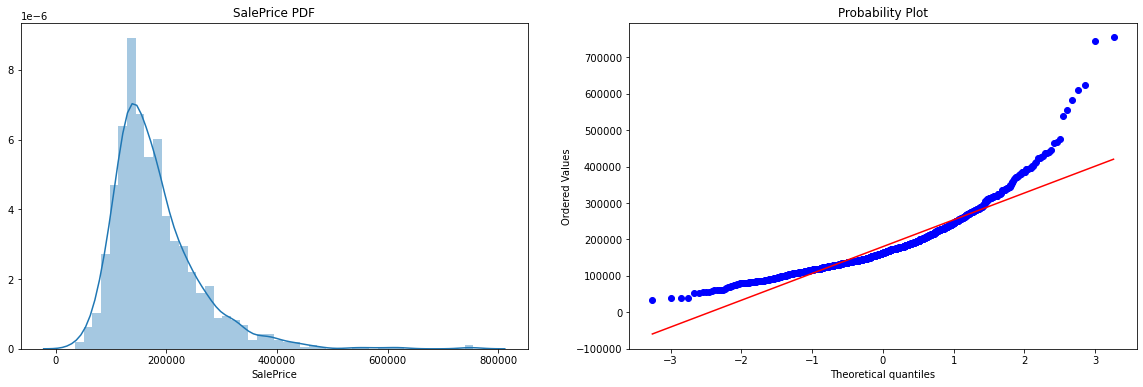

In [68]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

axs[0].set_title(target_var + ' PDF')
sns.distplot(df.loc[:, target_var], ax=axs[0])

stats.probplot(df.loc[:, target_var], plot = axs[1])

plt.show()

* The target variable seems to have an  __almost__ gaussian distribution, does appear slightly skewed to the right.

* The __QQ-Plot__ shows it isn't exactly gaussian.

#### Continous Variables

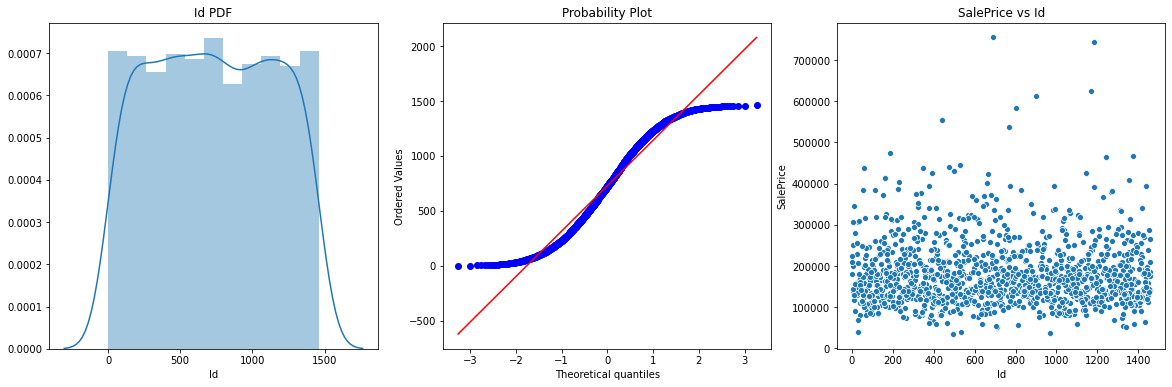

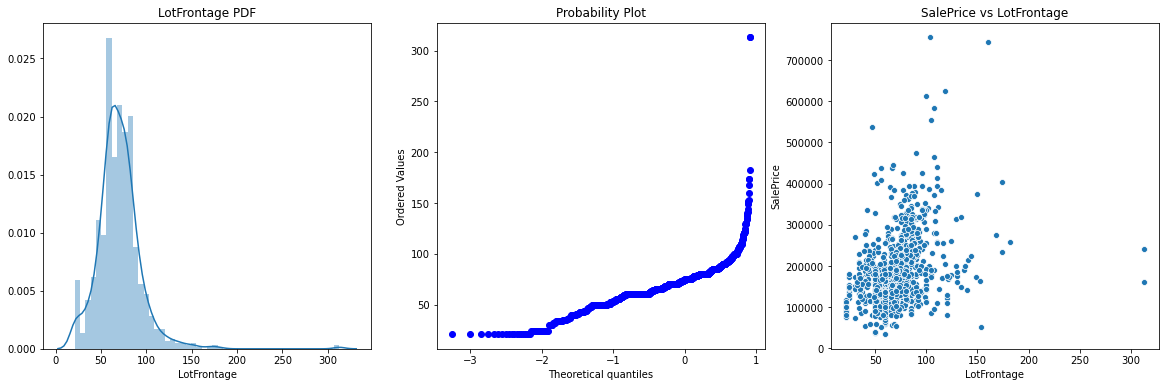

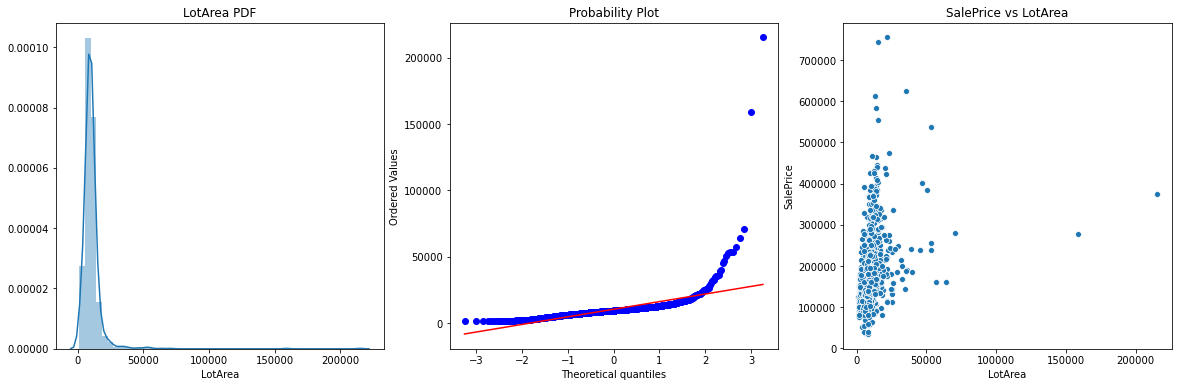

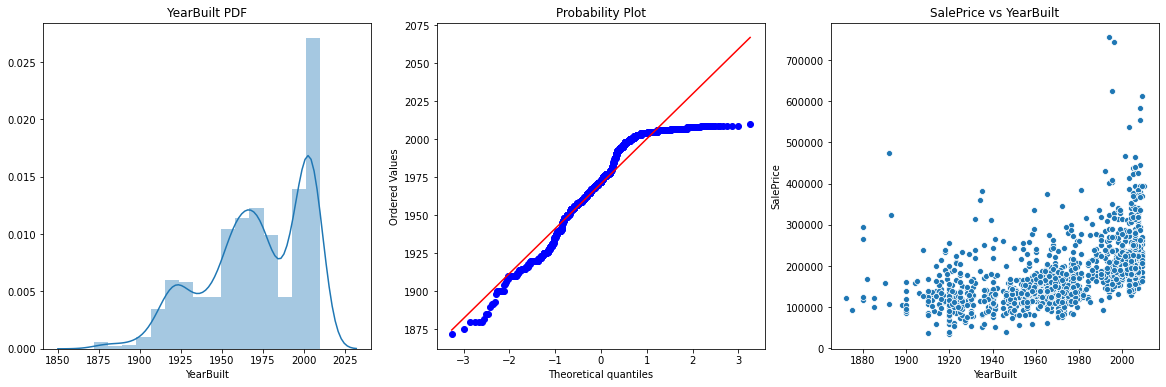

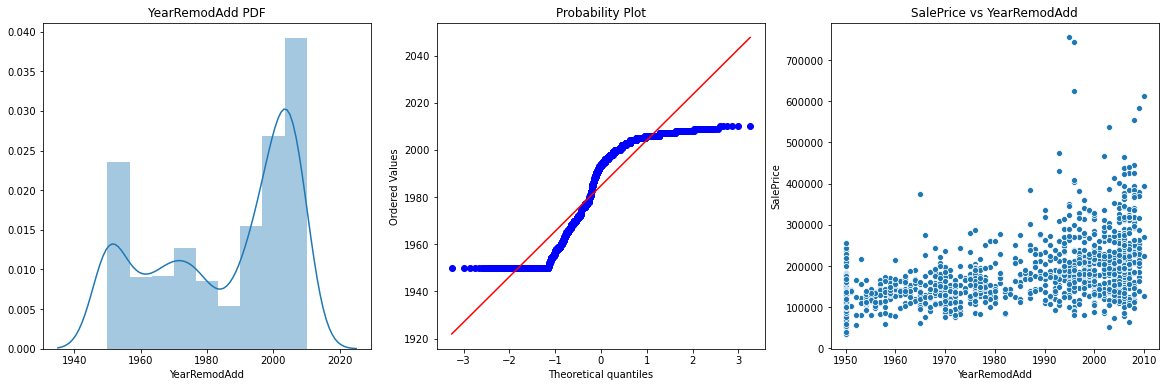

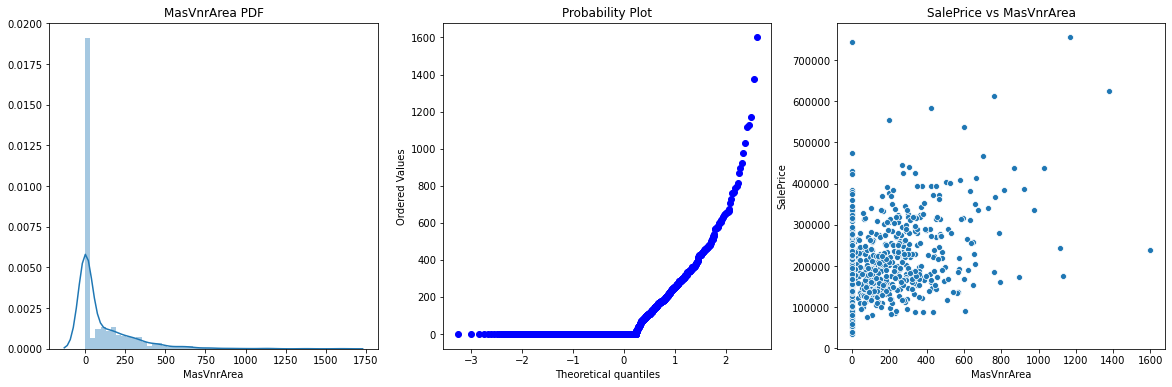

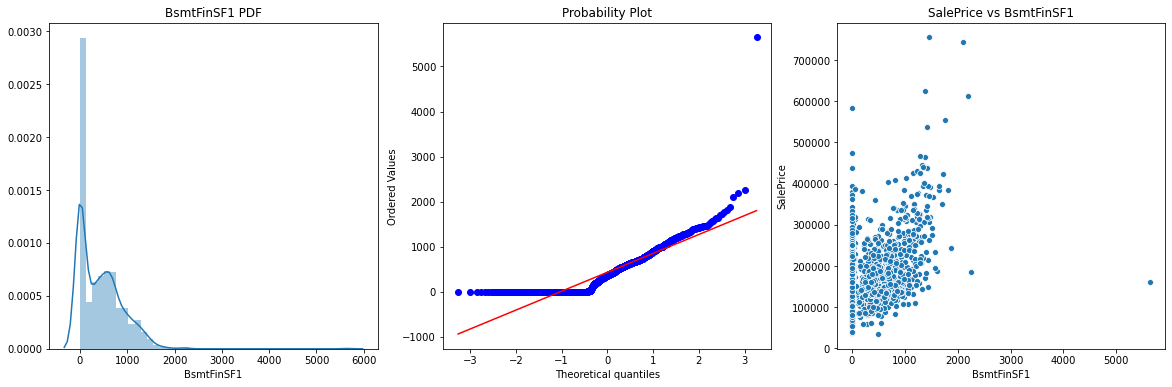

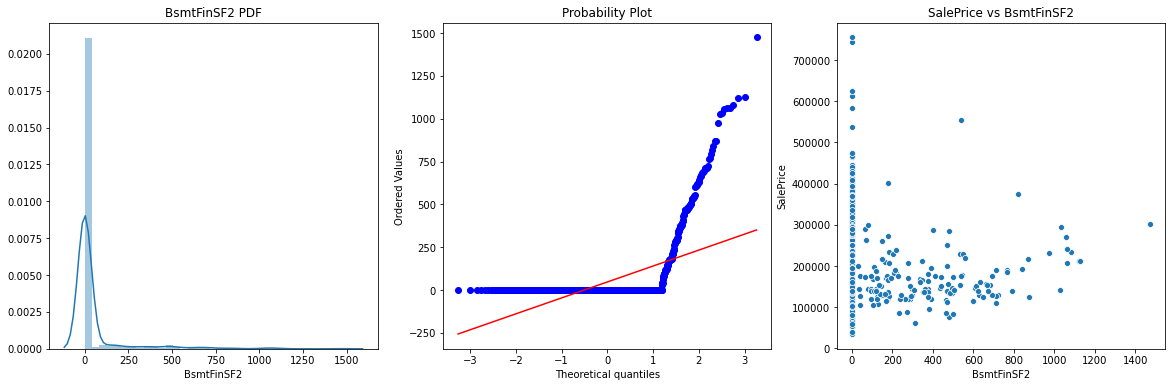

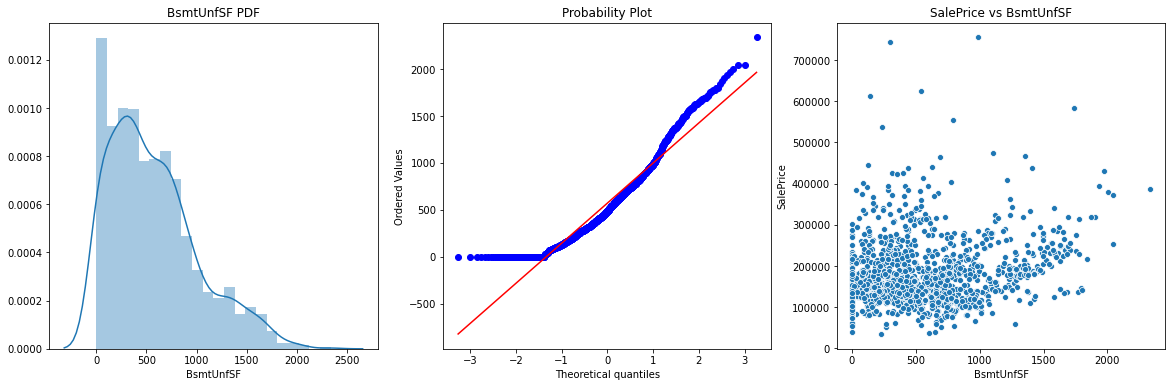

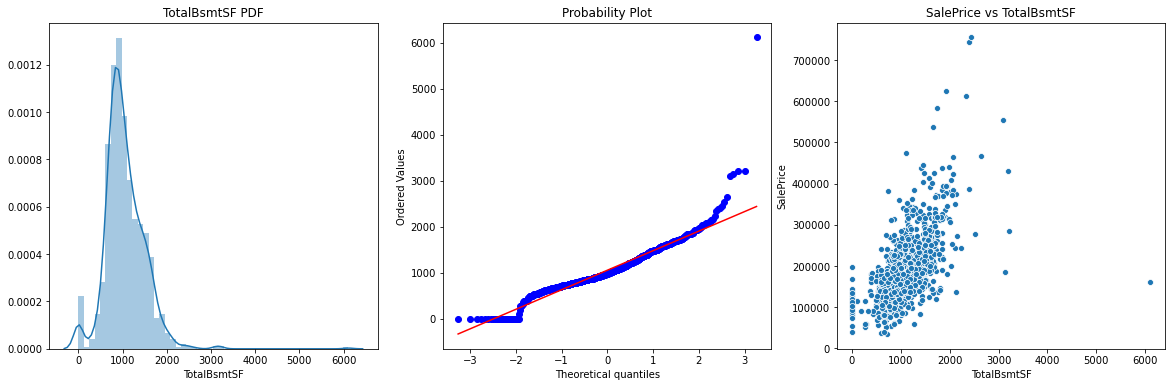

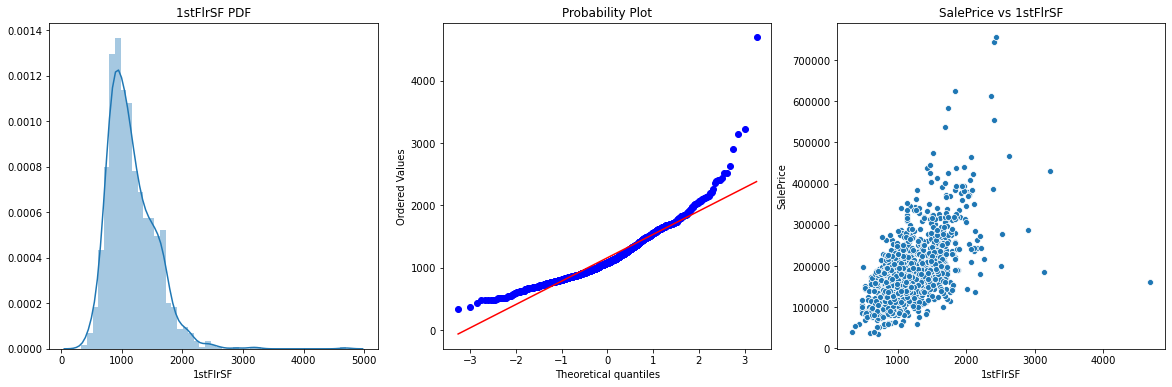

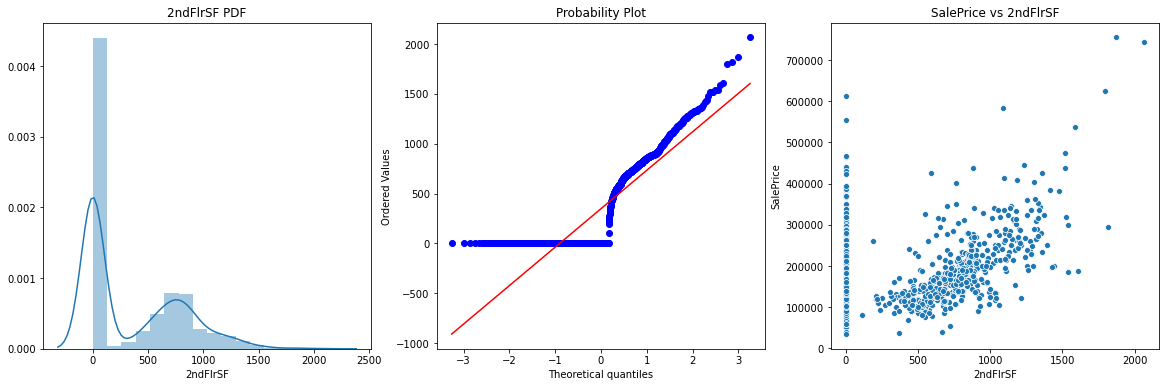

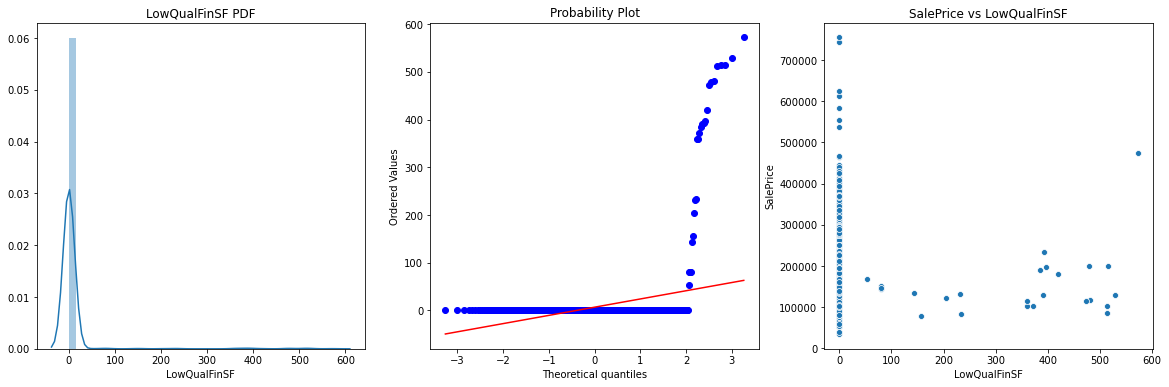

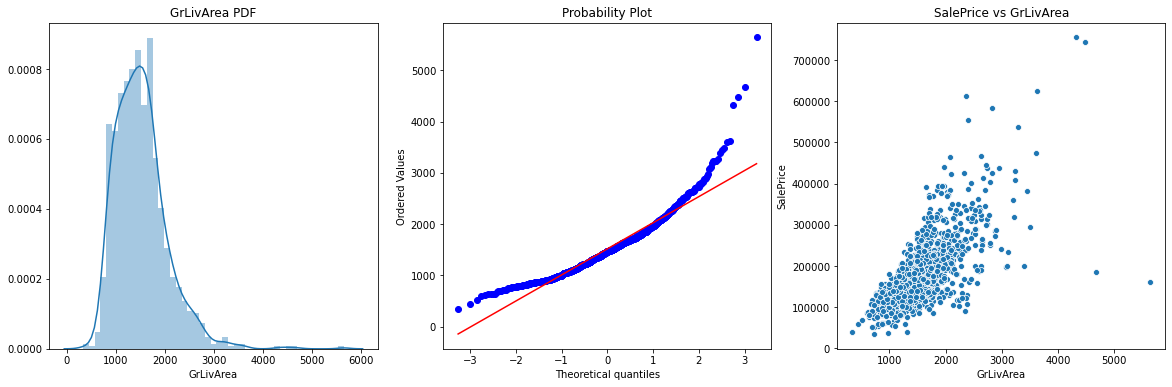

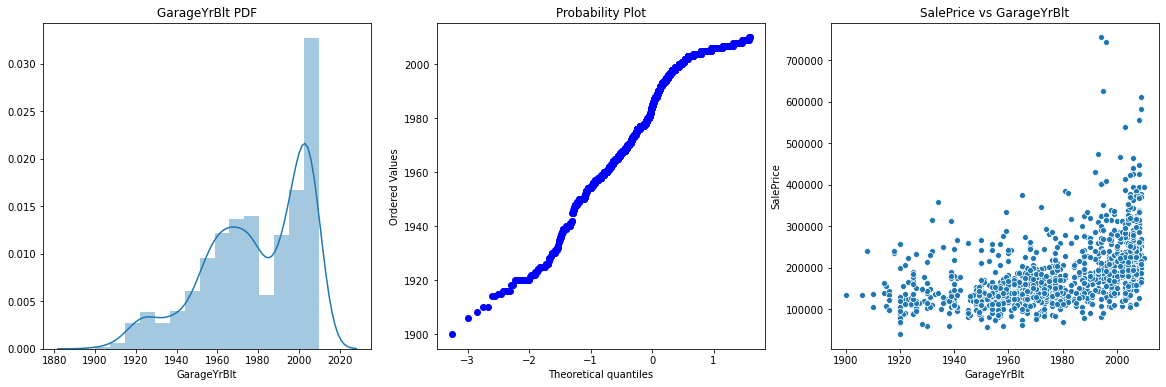

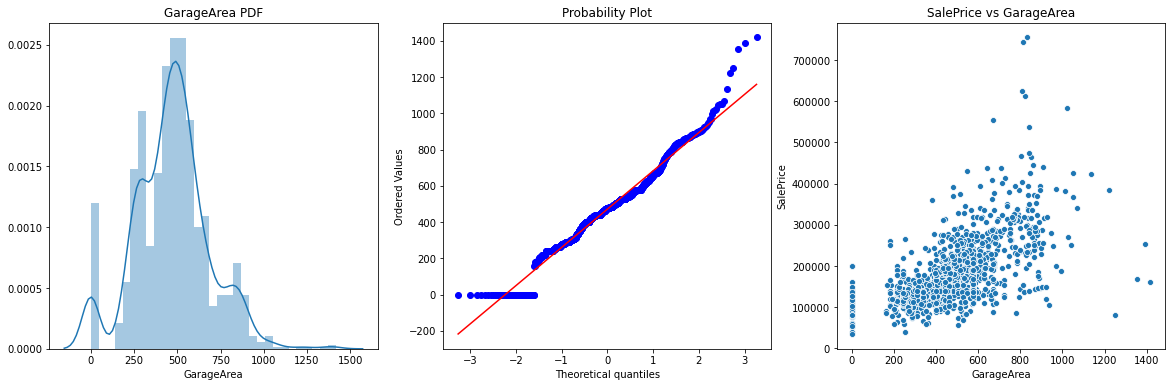

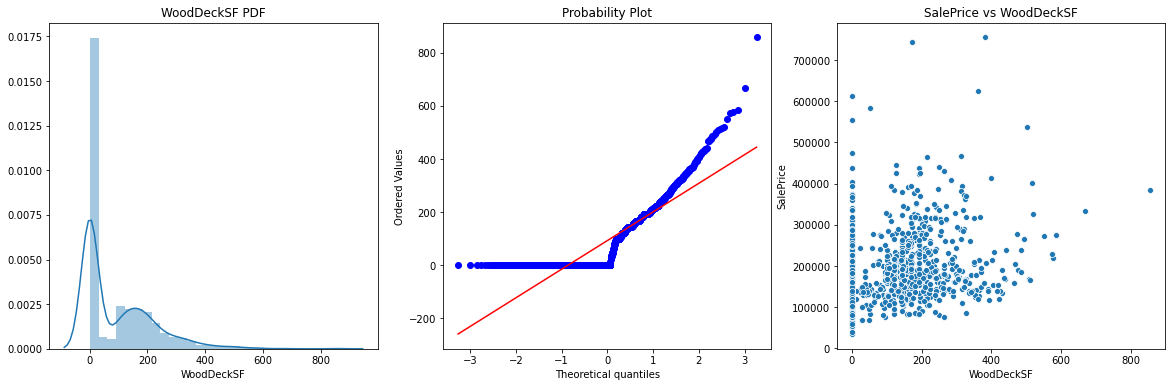

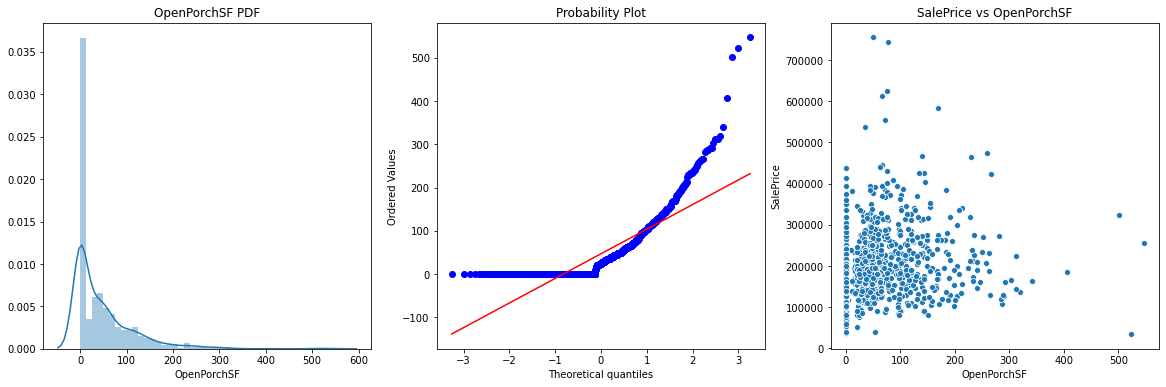

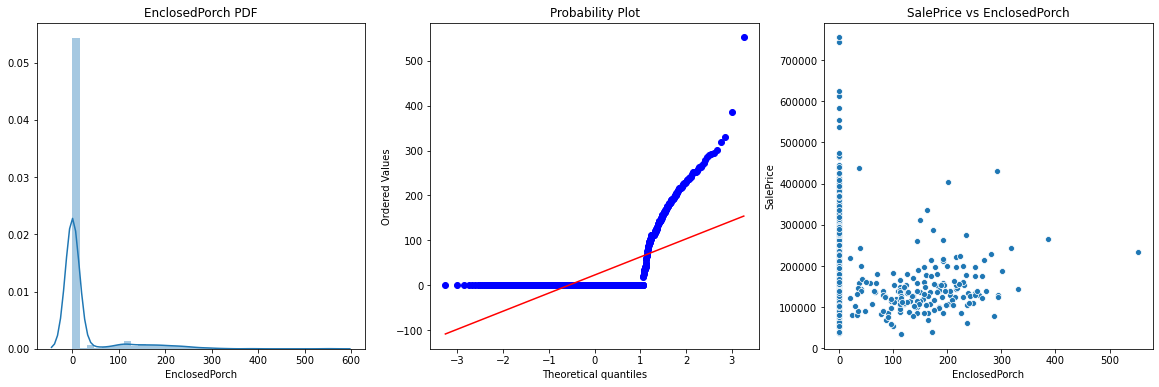

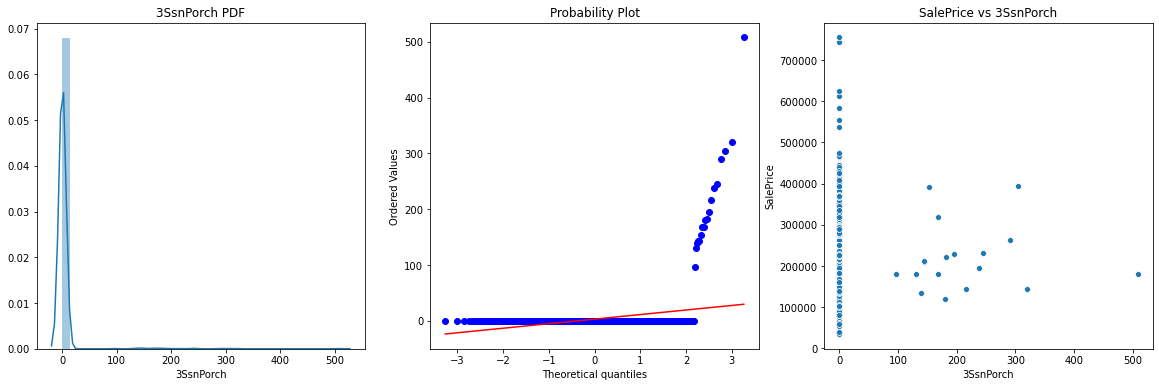

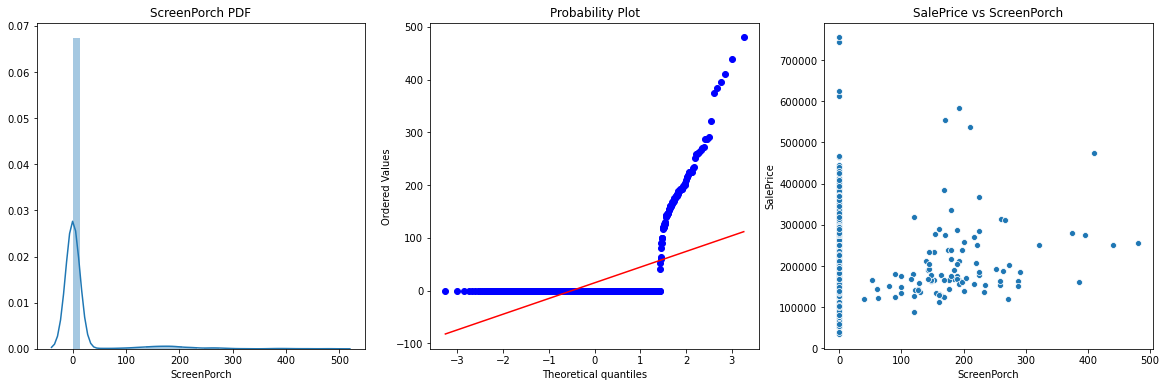

In [72]:
for col in cont_vars:
    
    fig, axs = plt.subplots(ncols = 3, figsize=(20, 6))
    
    axs[0].set_title(col + ' PDF')
    sns.distplot(df.loc[:, col], ax = axs[0])
    
    stats.probplot(df.loc[:, col], plot = axs[1])
    
    axs[2].set_title(target_var + ' vs ' + col)
    sns.scatterplot(x = col, y = target_var, data = df, ax = axs[2])
    
    plt.show()

* All variables are mostly positively correlated to the target feature.

* Variables like __'LotFrontage', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea'__ show strong positive correlation with the target.

* Some variables exhibit almost gaussian distributions, while most variables appear to be skewed.

#### Discrete Variables

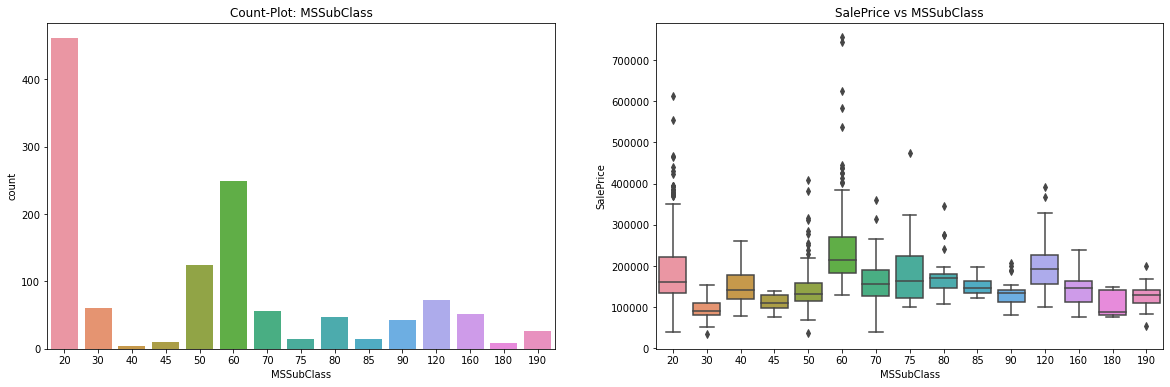

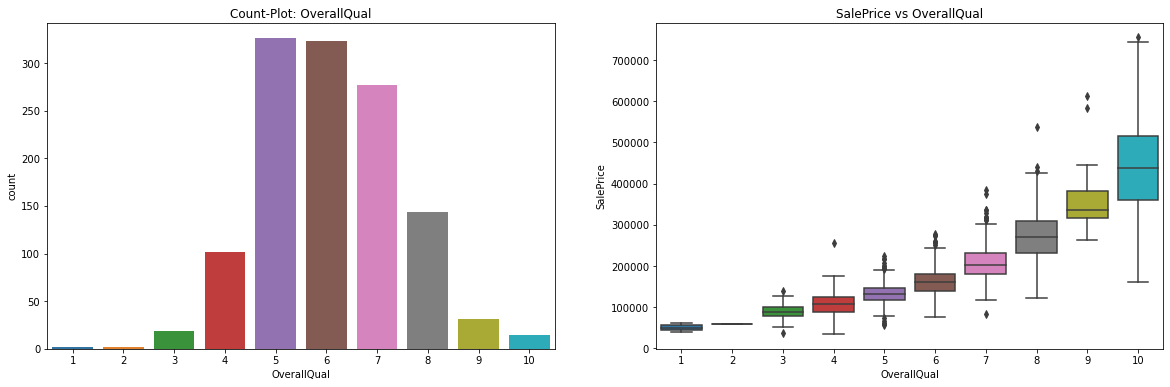

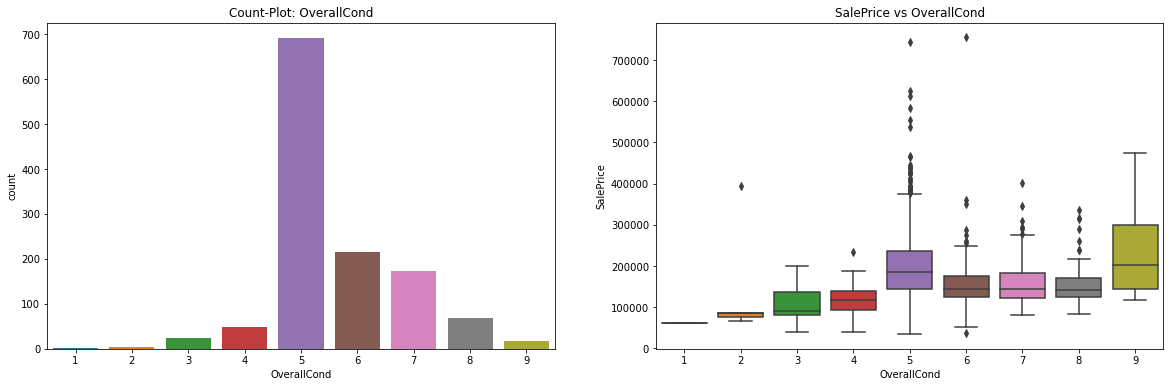

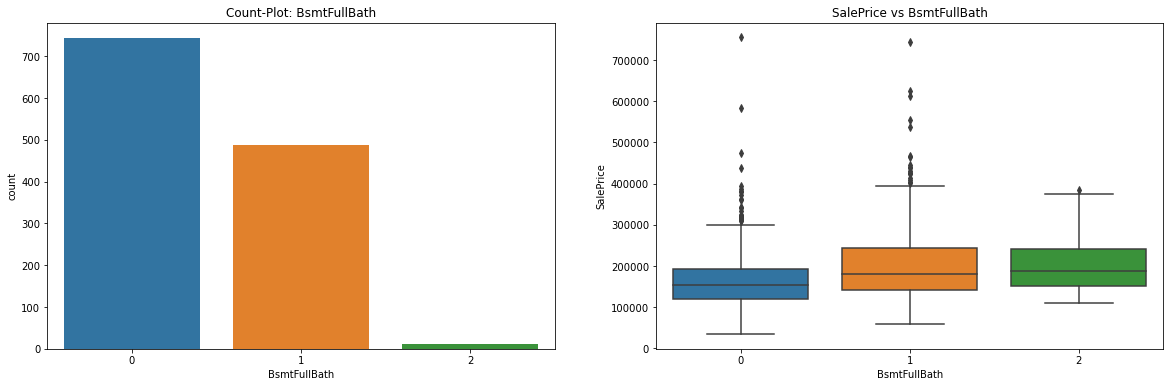

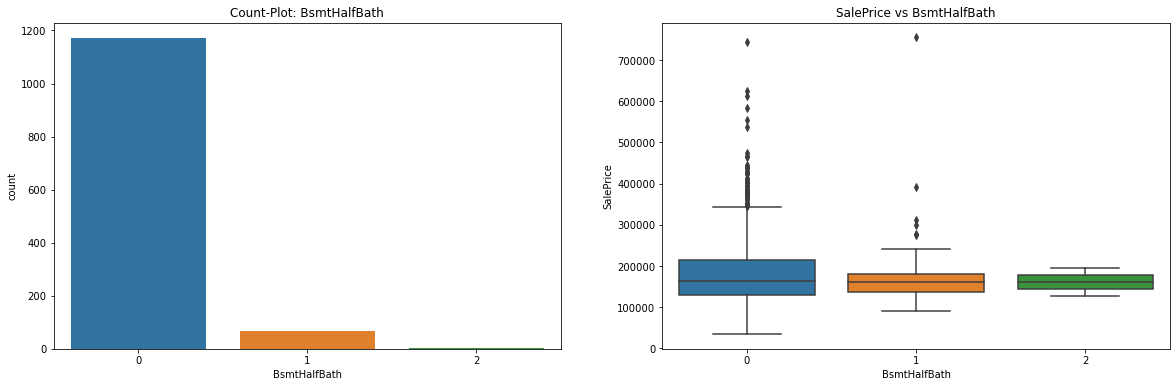

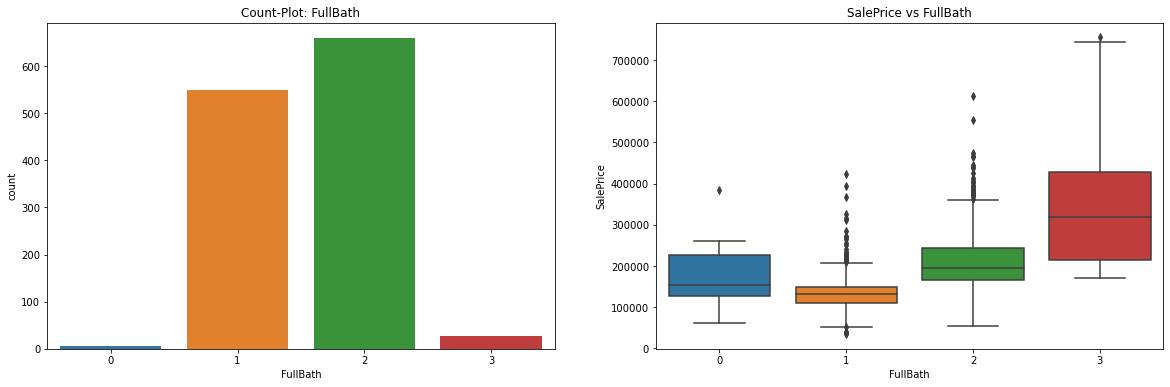

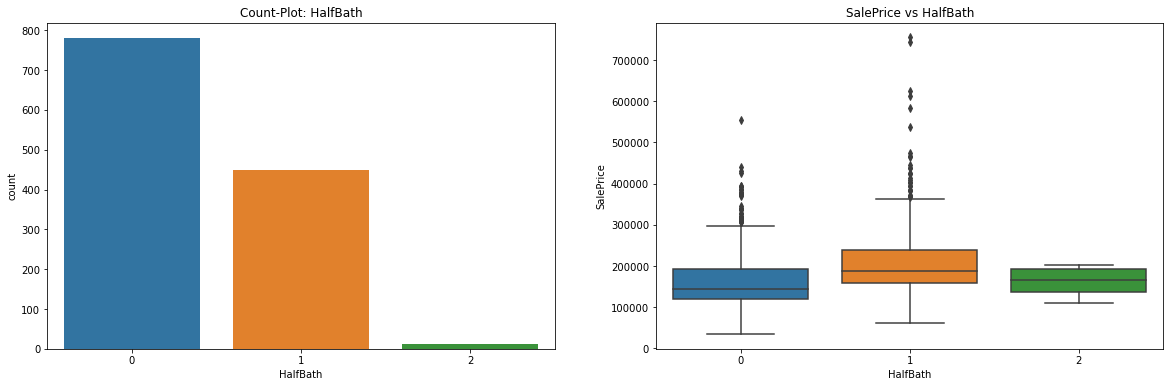

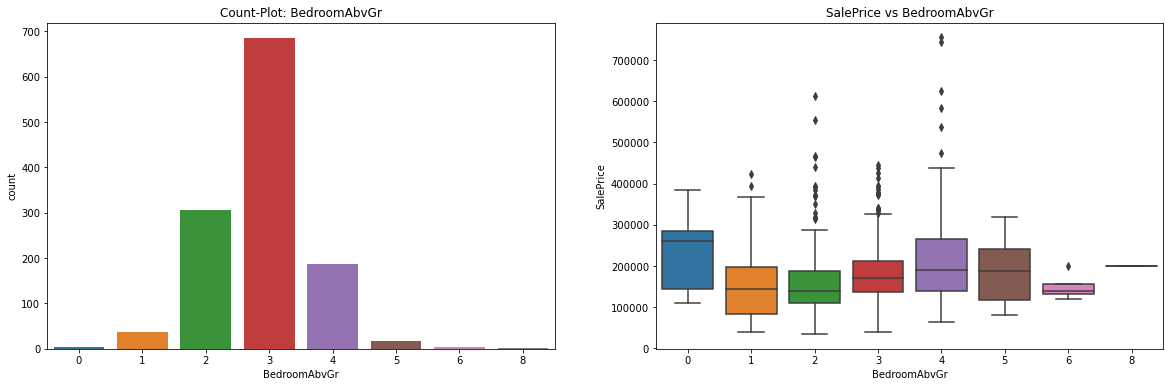

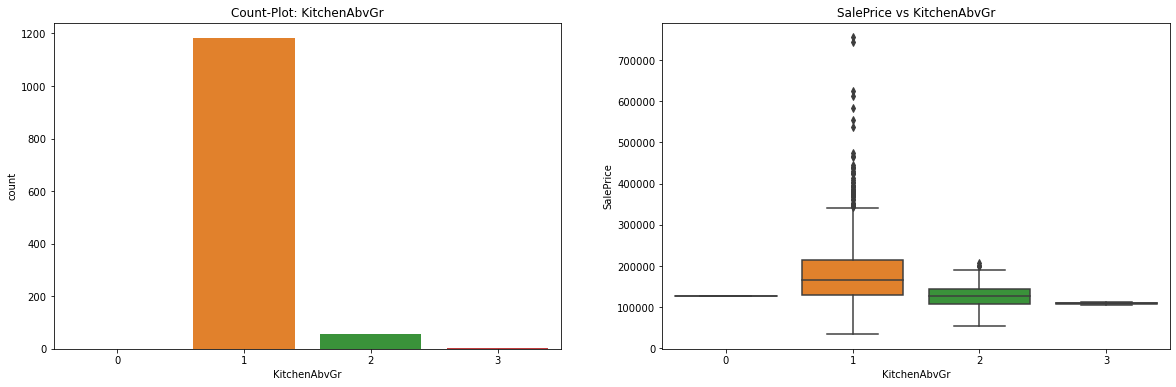

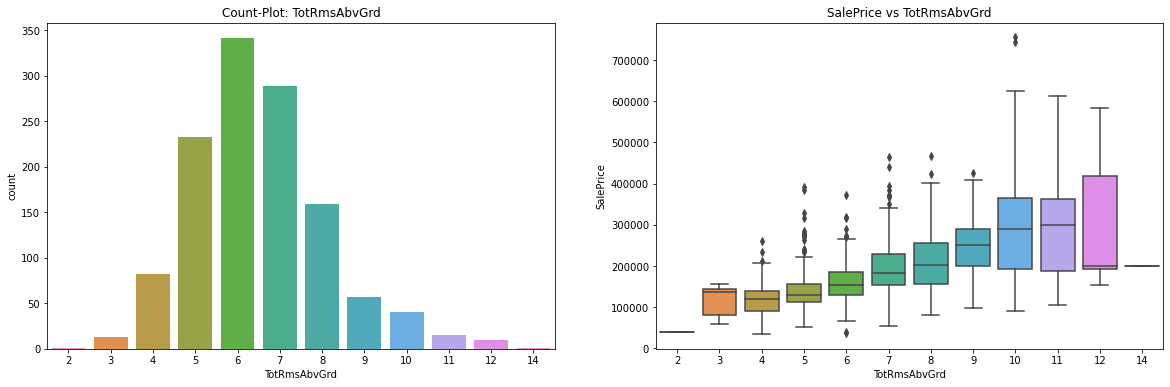

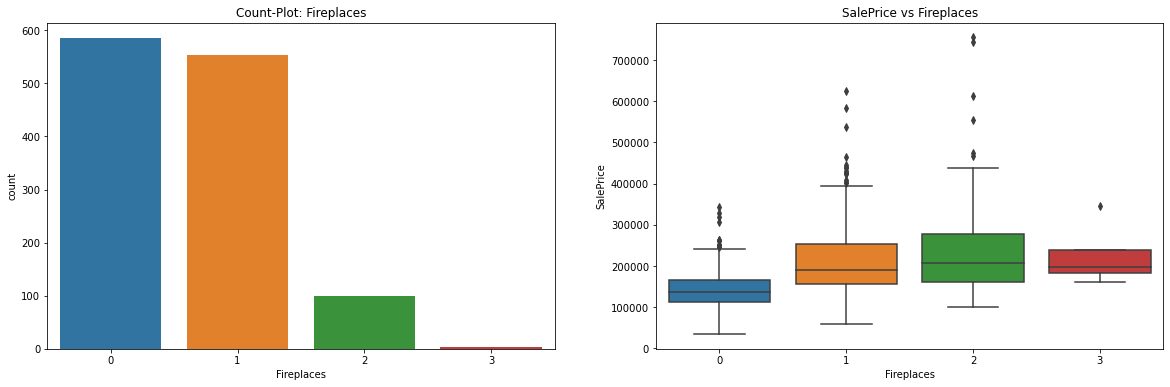

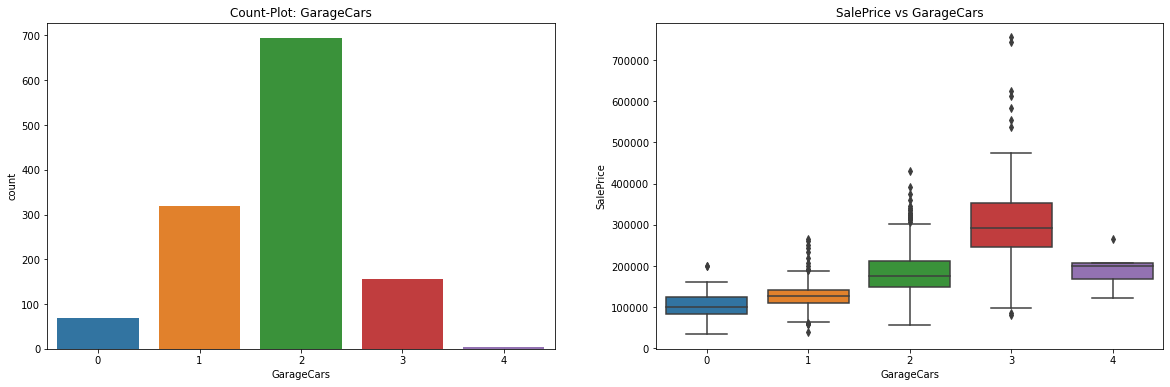

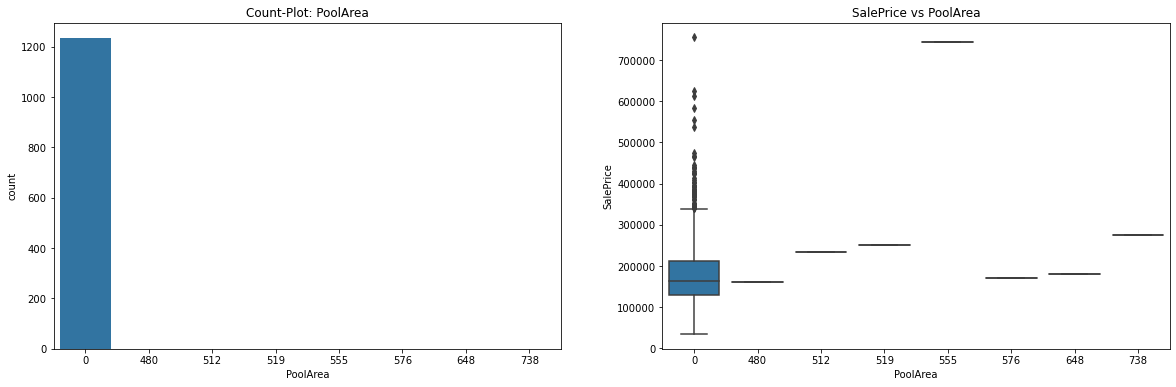

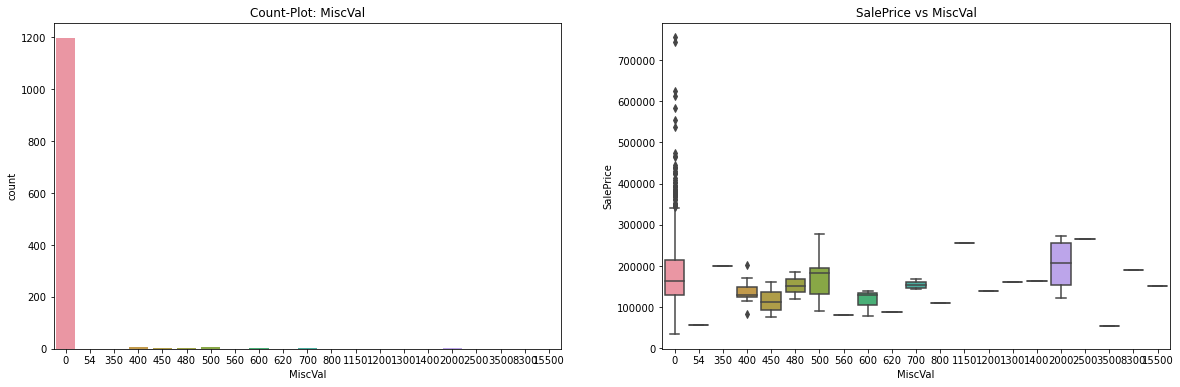

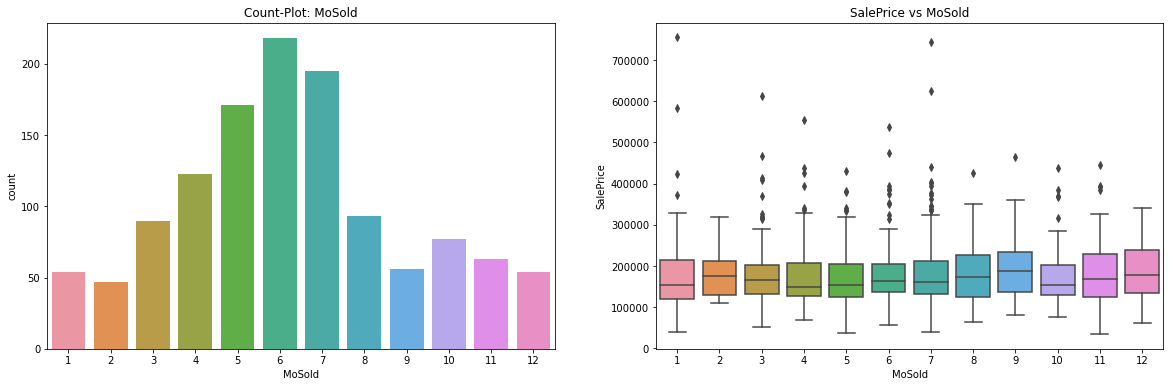

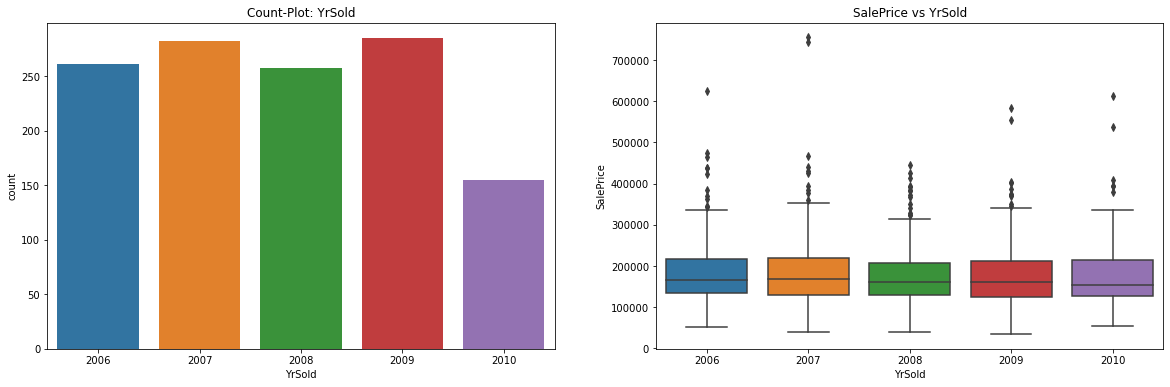

In [79]:
for col in disc_vars:
    
    fig, axs = plt.subplots(ncols = 2, figsize=(20, 6))
    
    axs[0].set_title('Count-Plot: ' + col)
    sns.countplot(x = col, data = df, ax = axs[0])
    
    axs[1].set_title(target_var + ' vs ' + col)
    sns.boxplot(x = col, y = target_var, data = df, ax = axs[1])
    
    plt.show()

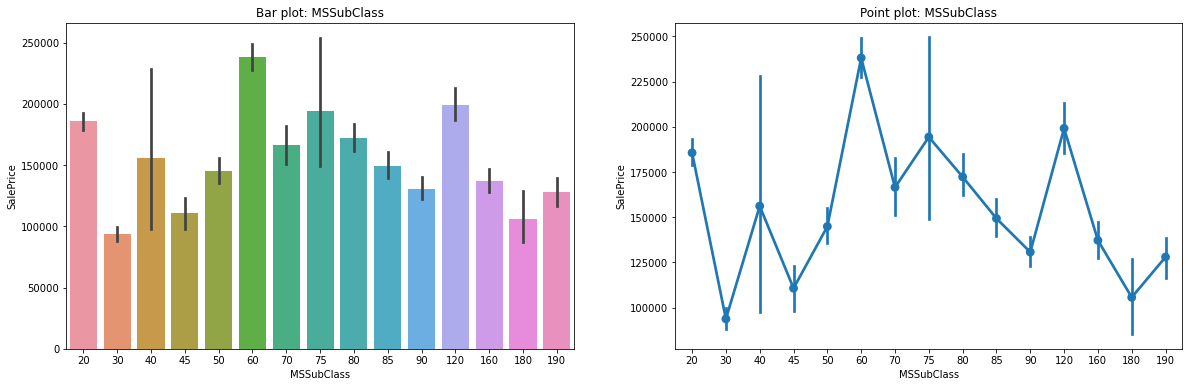

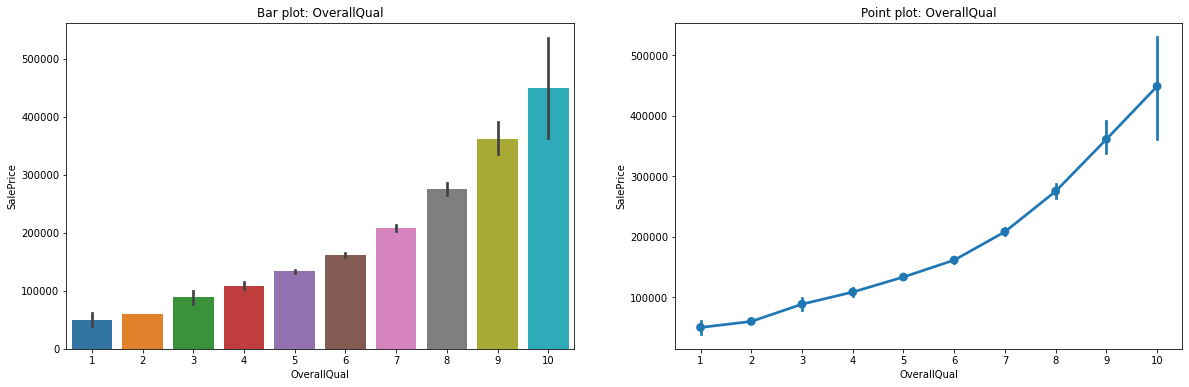

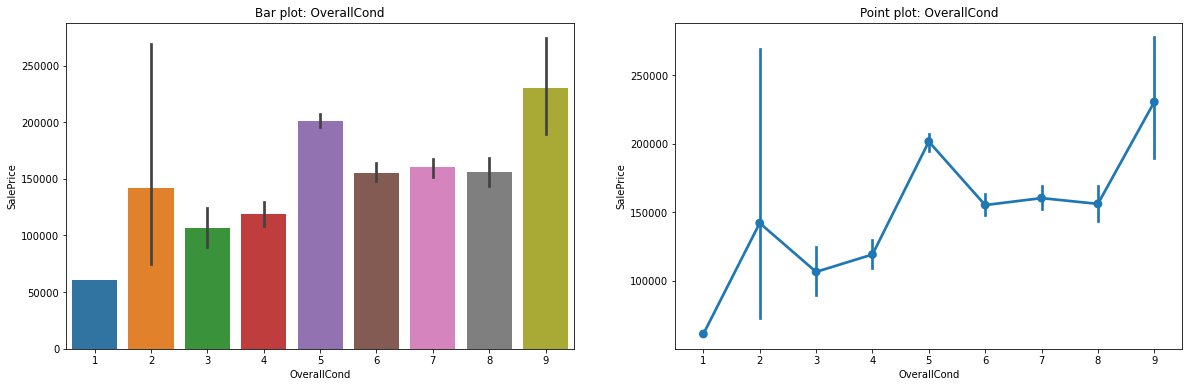

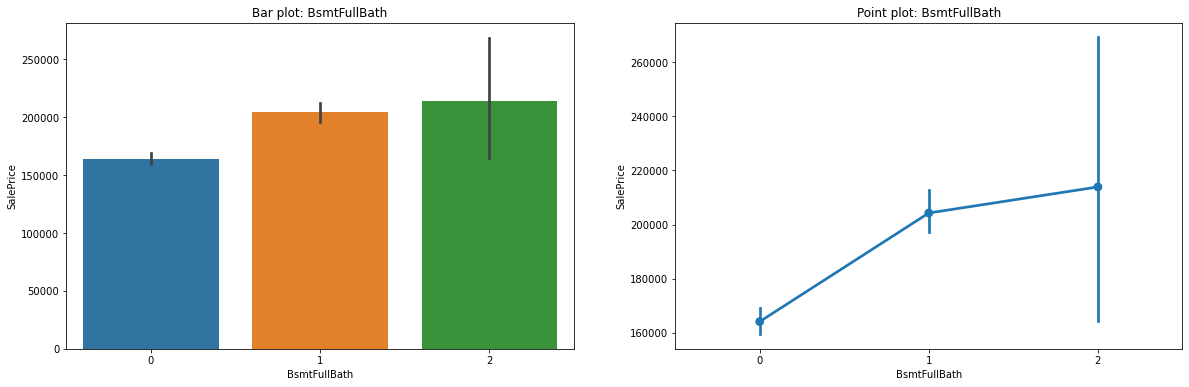

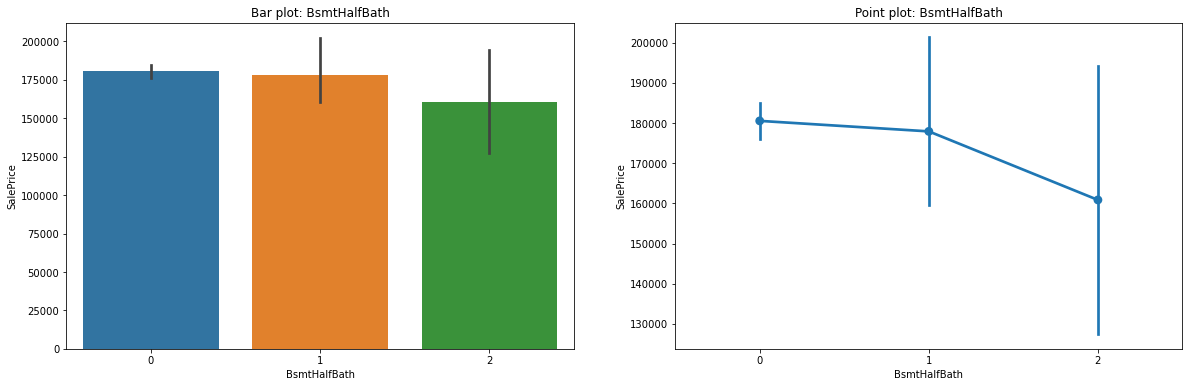

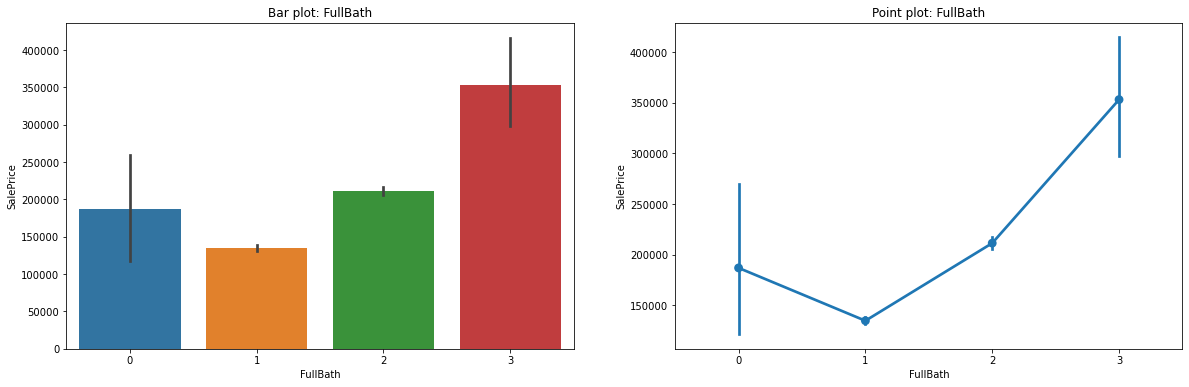

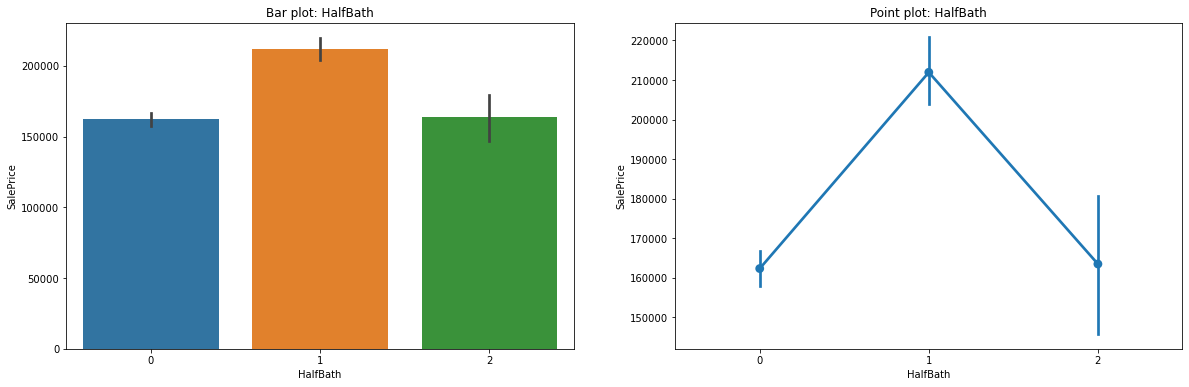

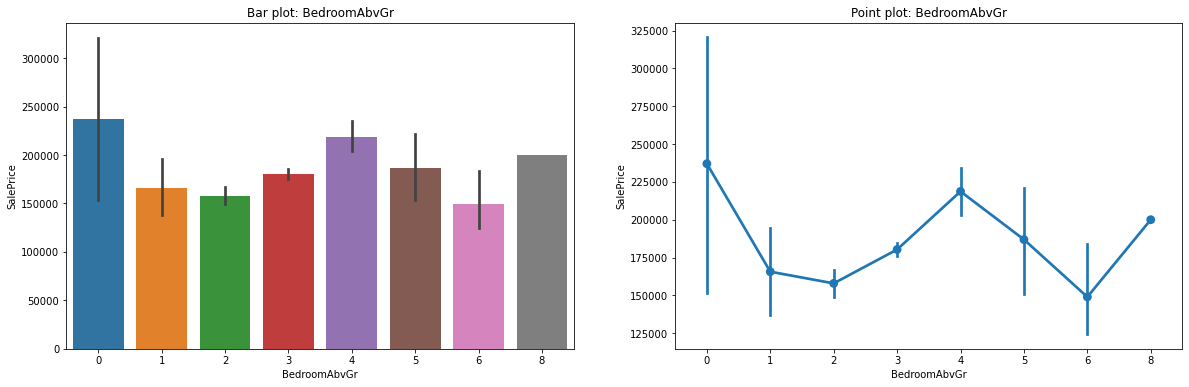

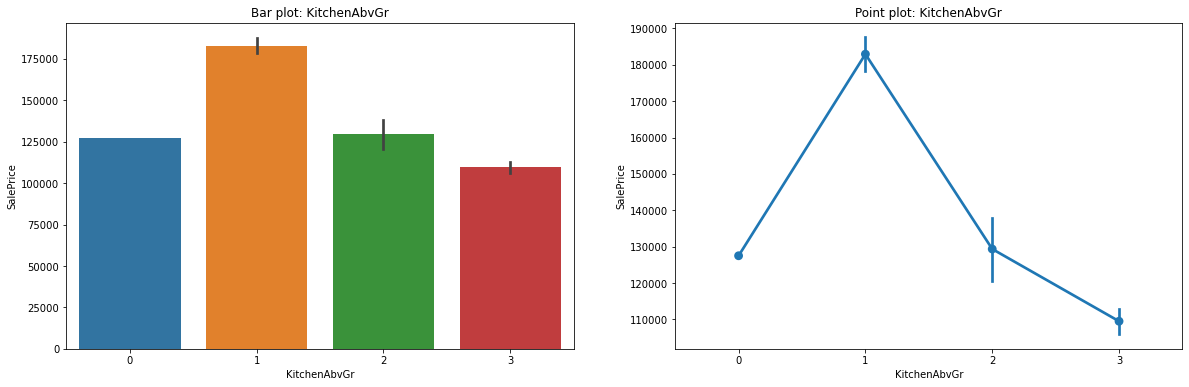

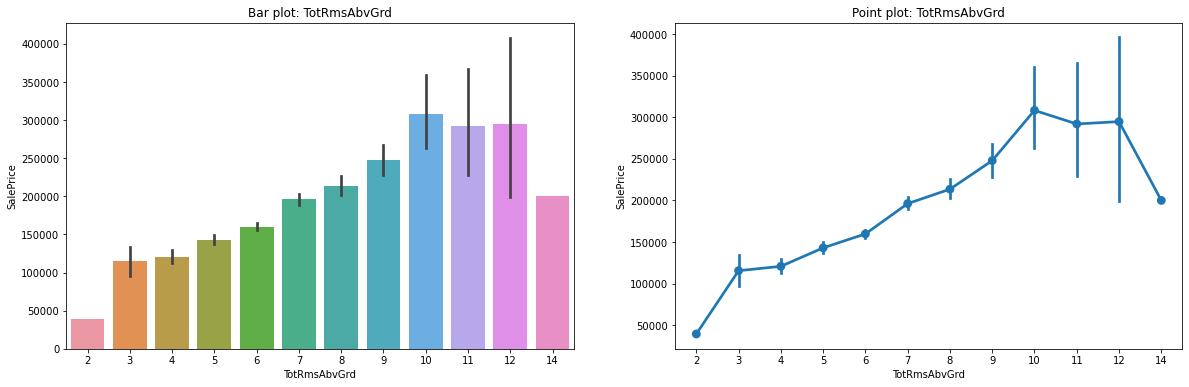

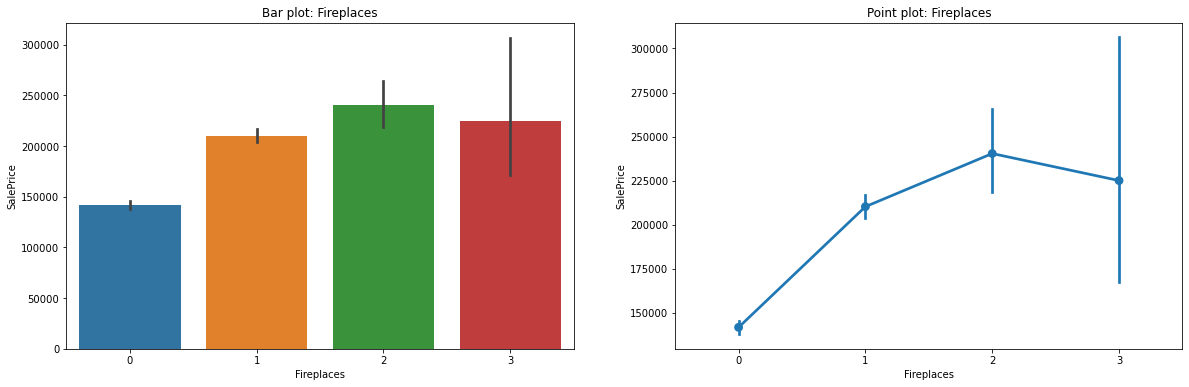

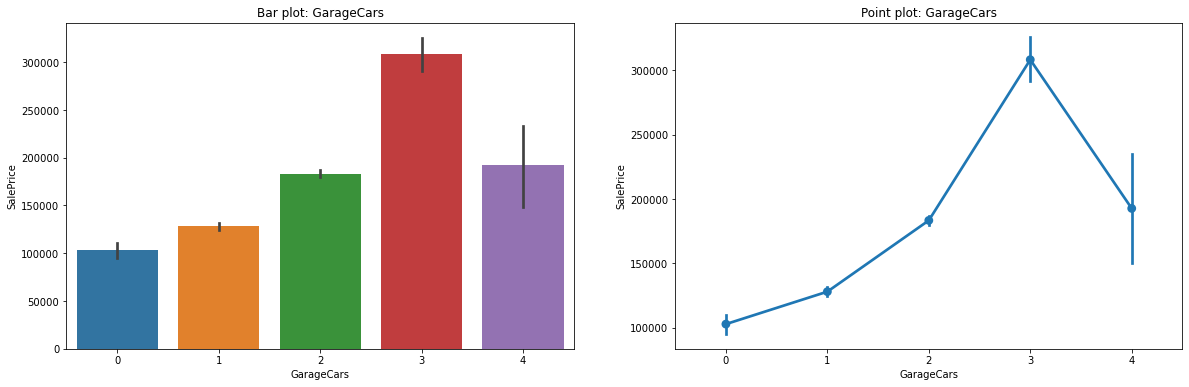

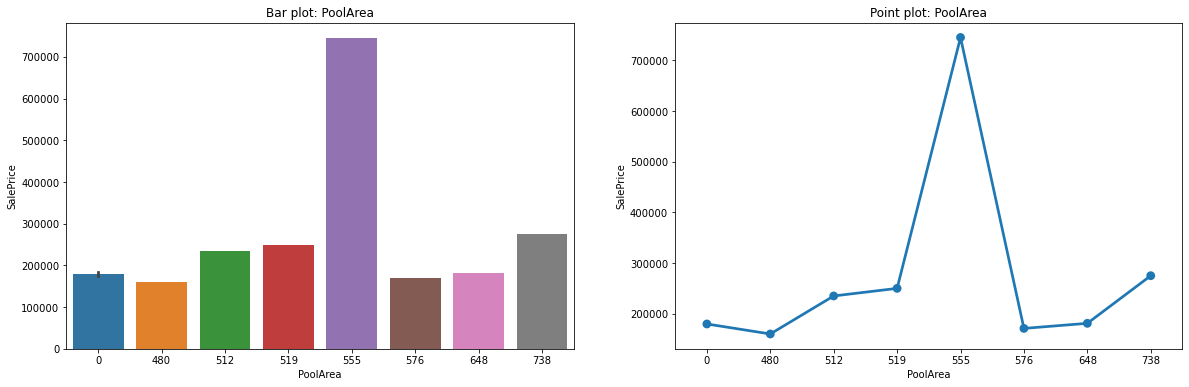

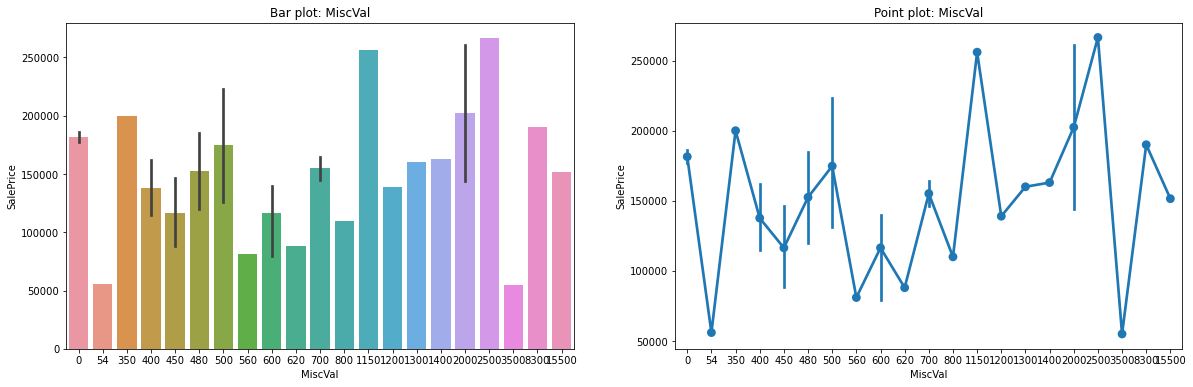

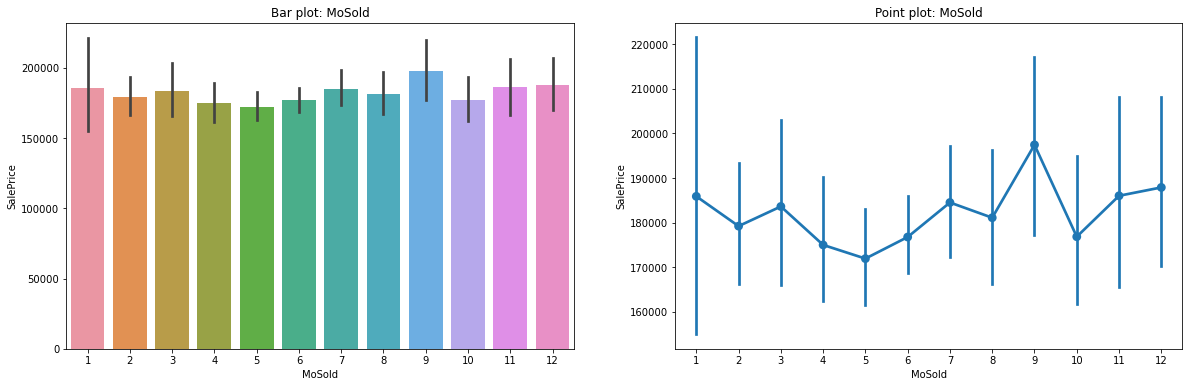

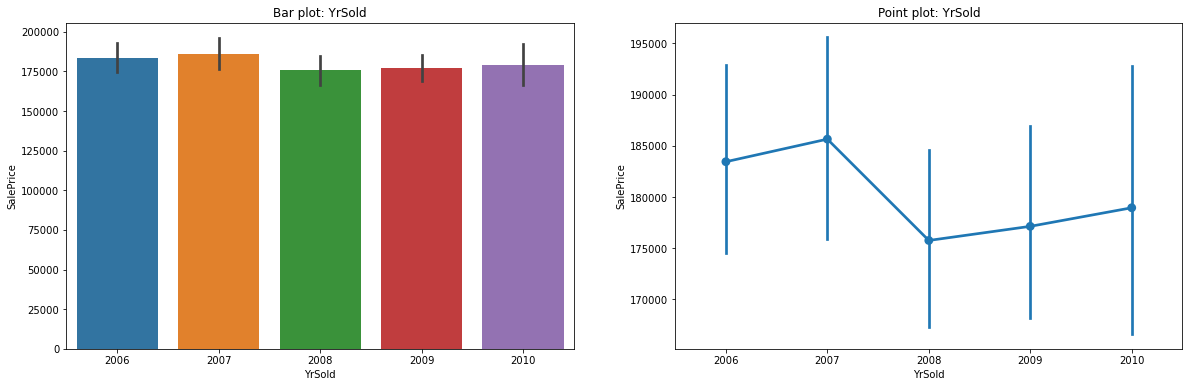

In [7]:
for col in disc_vars:
    
    fig, axs = plt.subplots(ncols = 2, figsize=(20, 6))
    
    axs[0].set_title('Bar plot: ' + col)
    sns.barplot(x = col, y = target_var, data = df, ax = axs[0])
    
    axs[1].set_title('Point plot: ' + col)
    sns.pointplot(x = col, y = target_var, data = df, ax = axs[1], dodge = True)
    
    plt.show()

* The variables __'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'Fireplaces'__ show fairly strong positive relationship with the target variable.

* There appear to be houses with variables __'FullBath'__ and __'HalfBath'__ having values __zero__. Could indicate missing values?

#### Non-numeric Variables

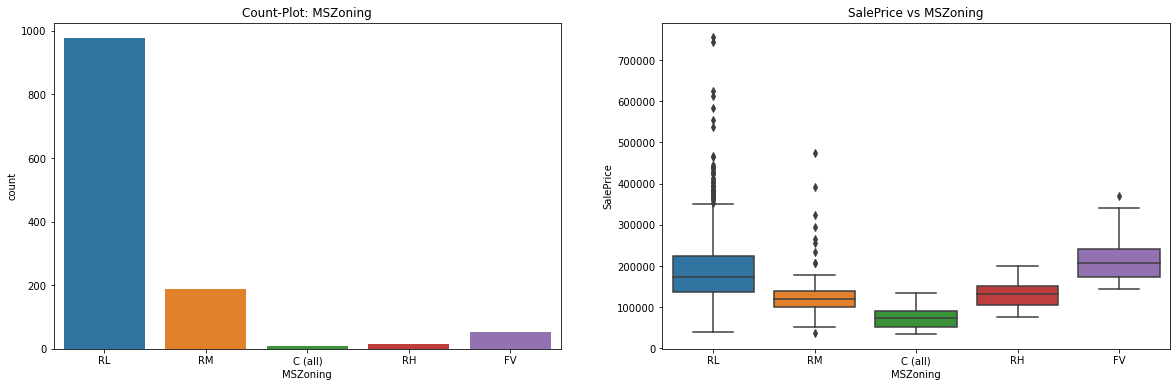

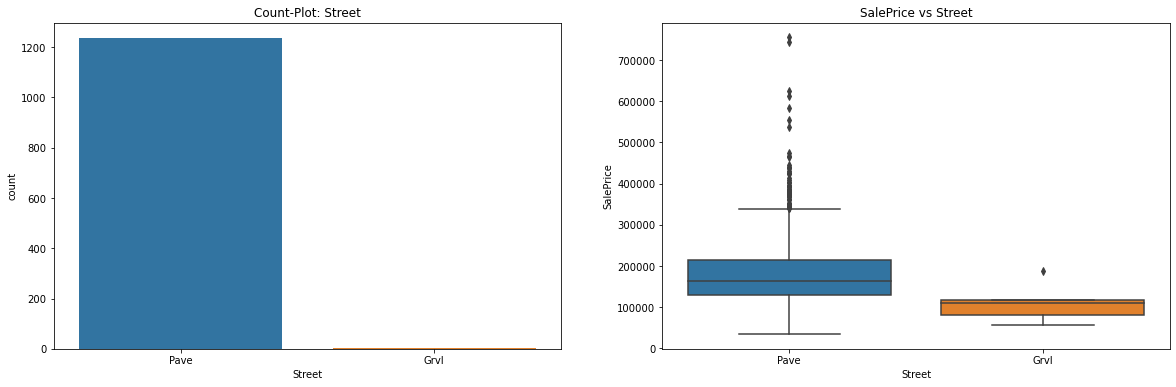

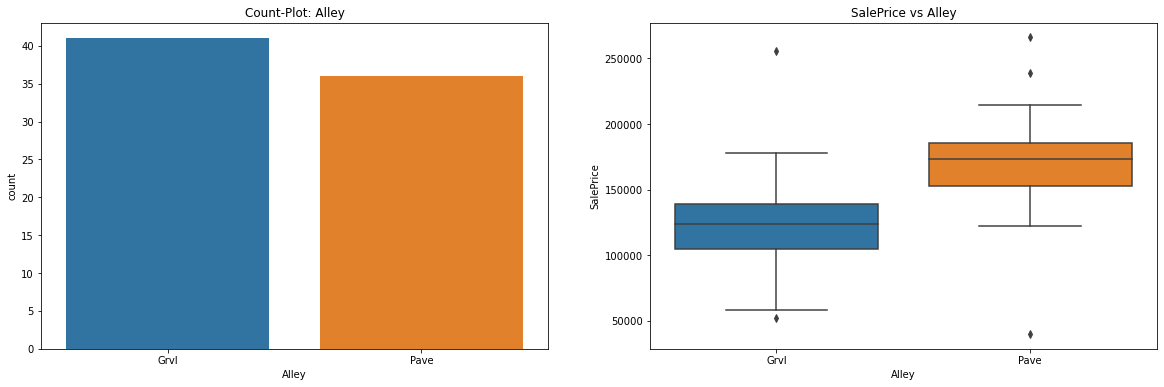

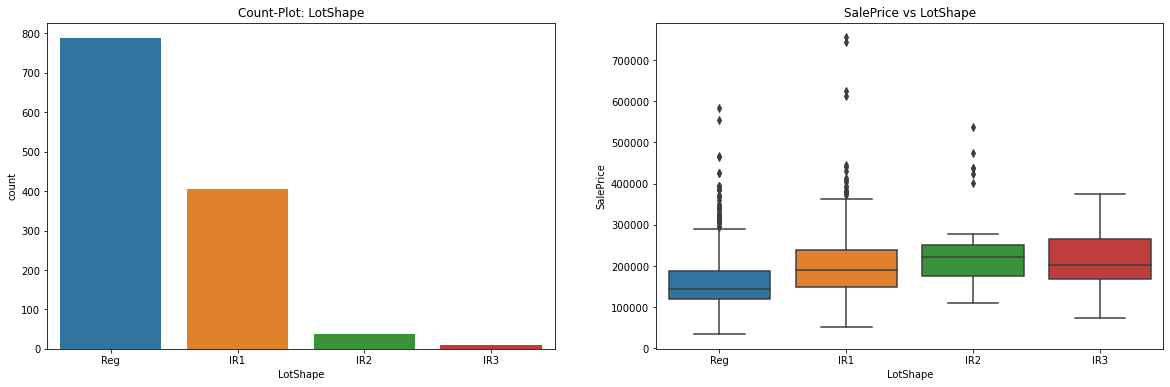

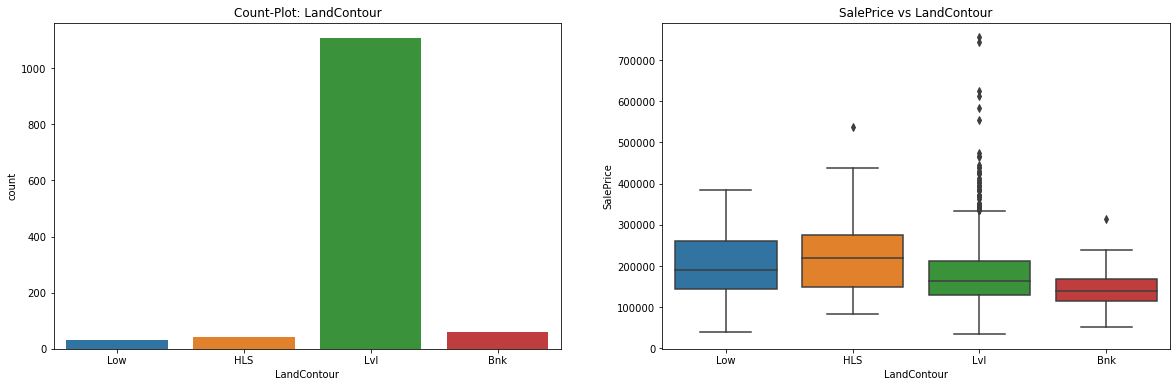

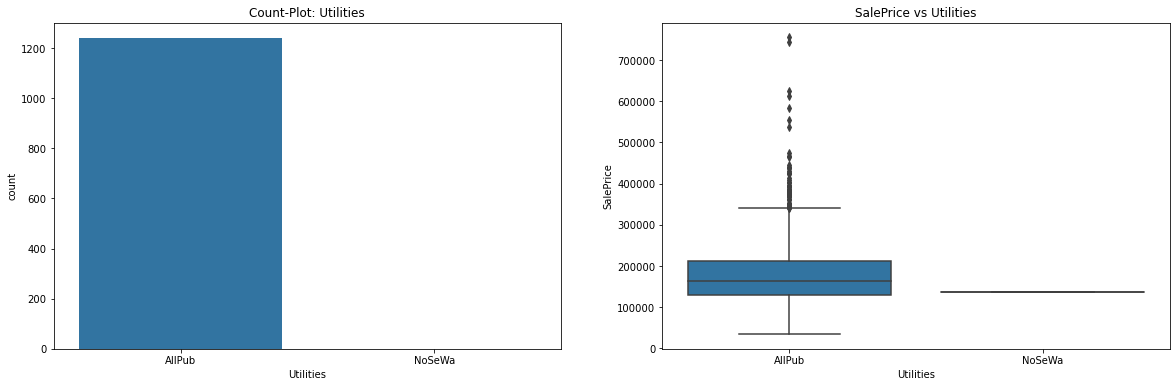

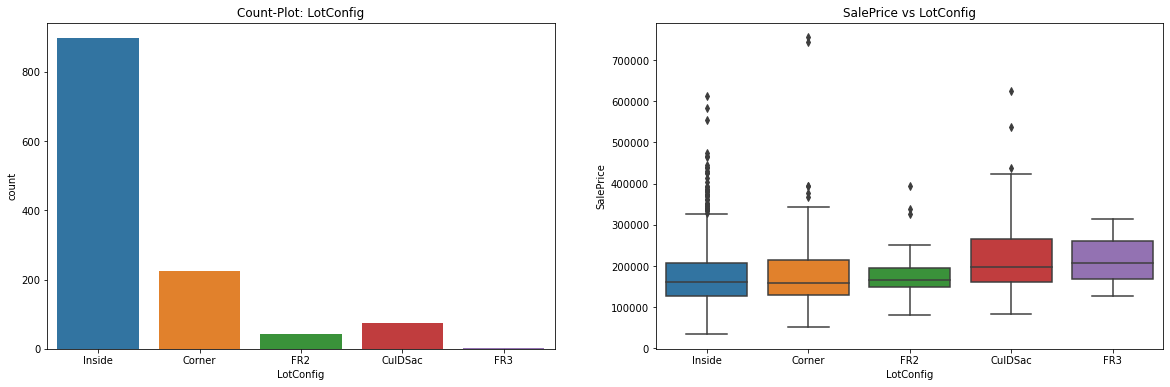

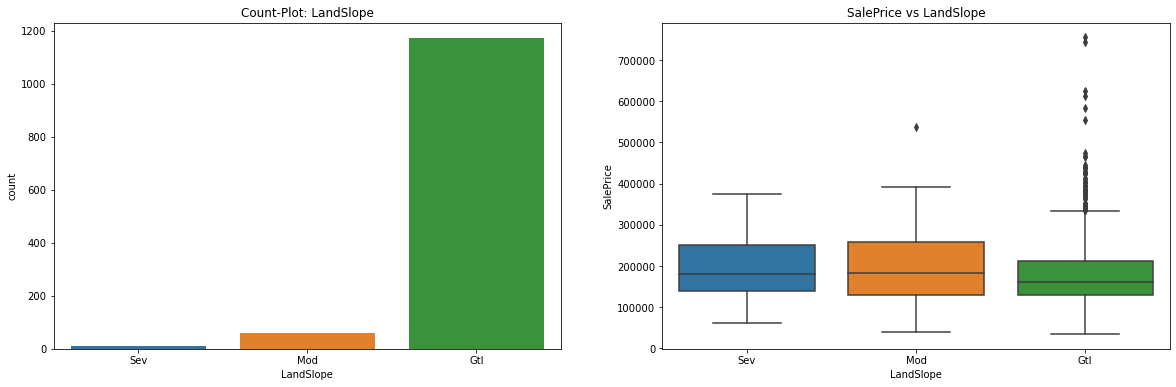

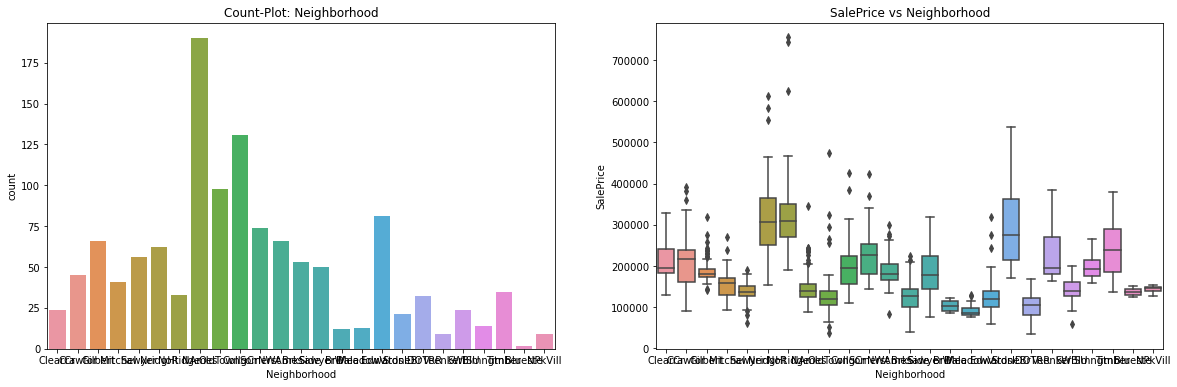

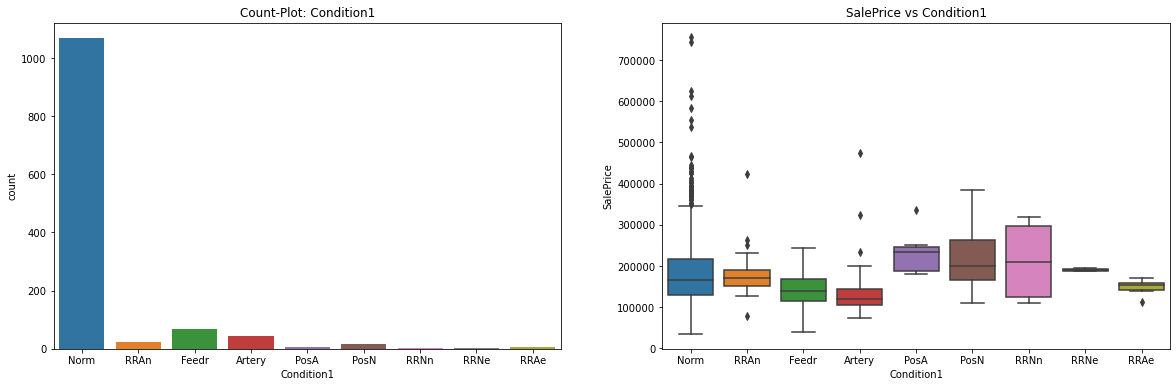

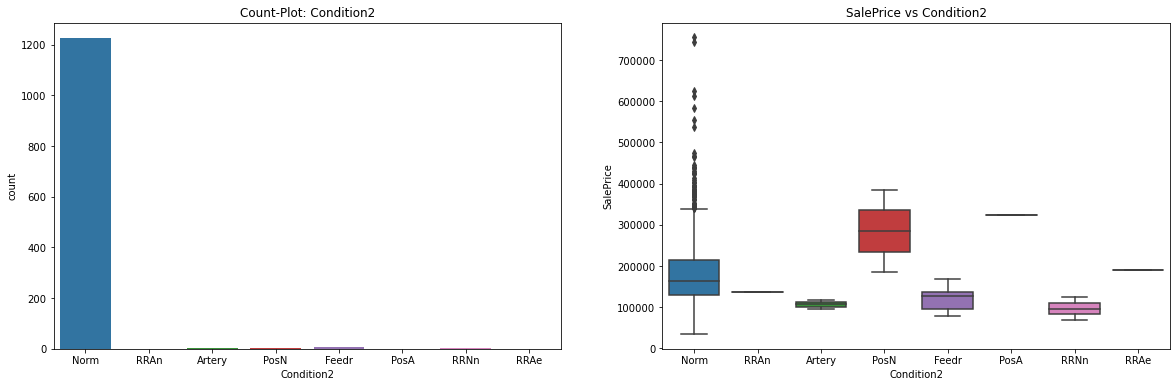

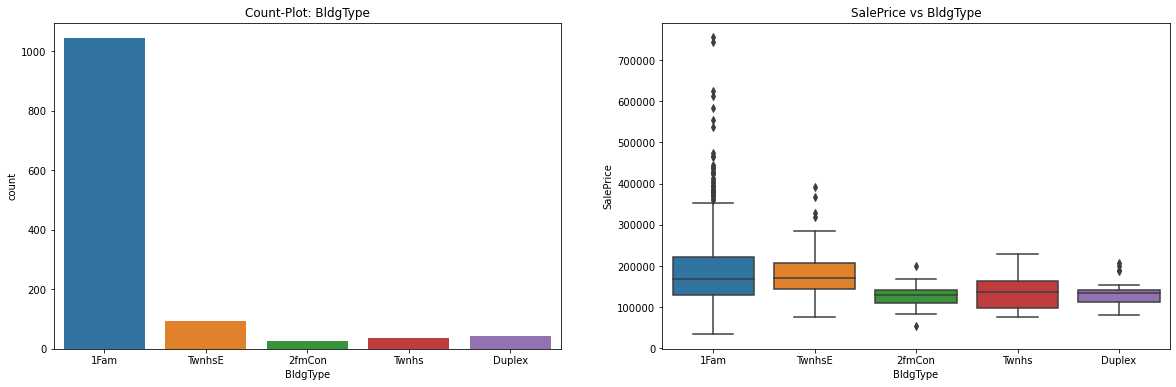

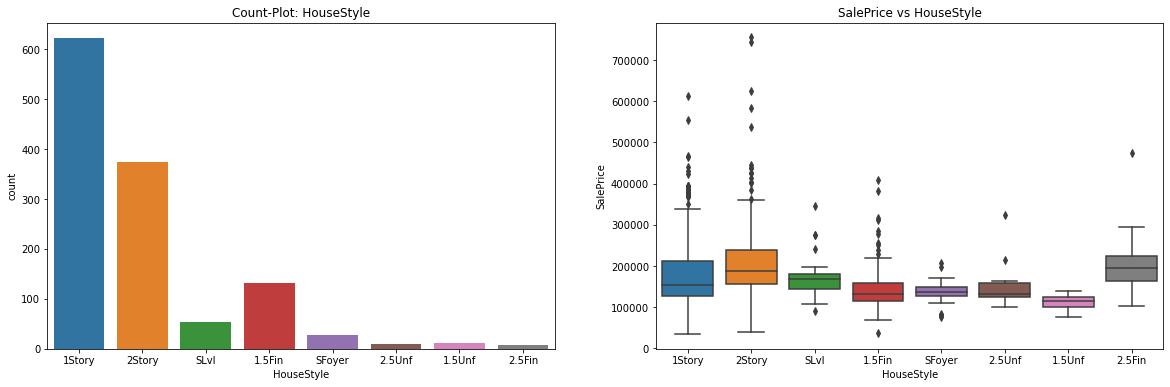

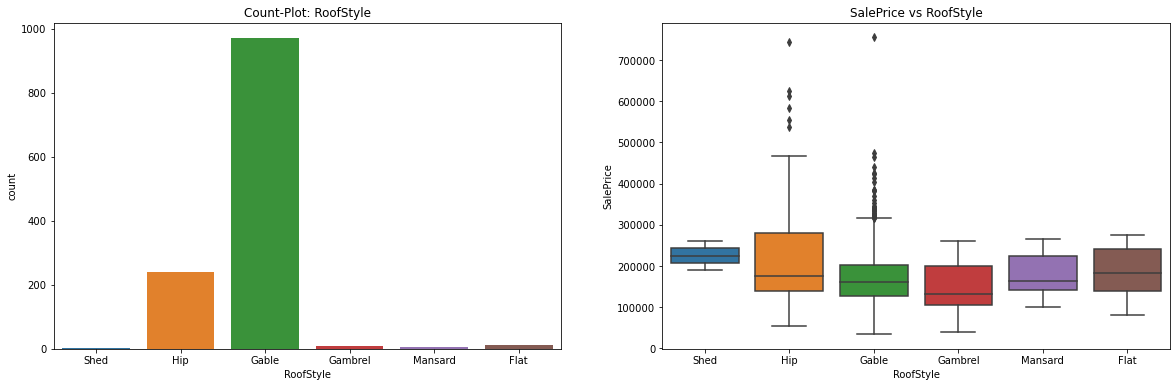

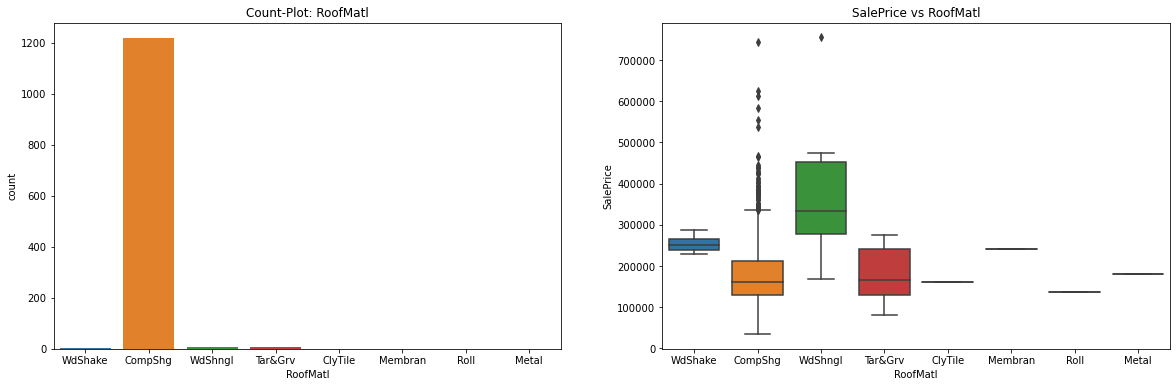

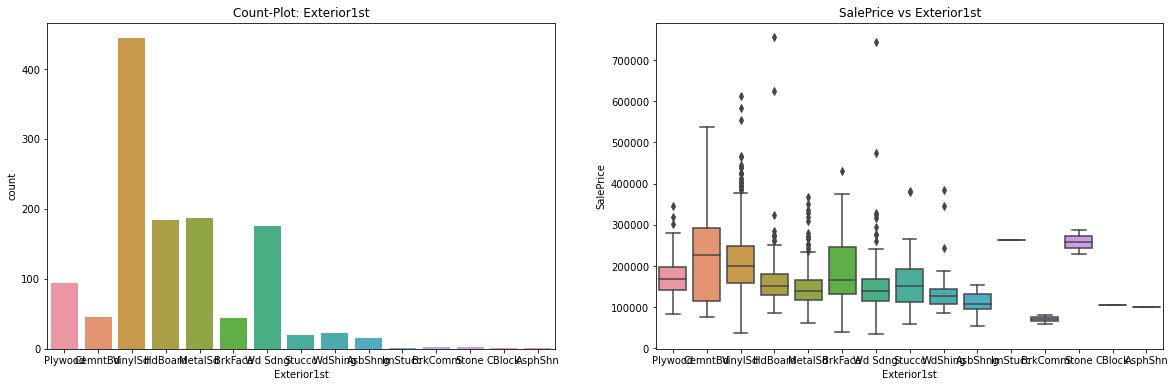

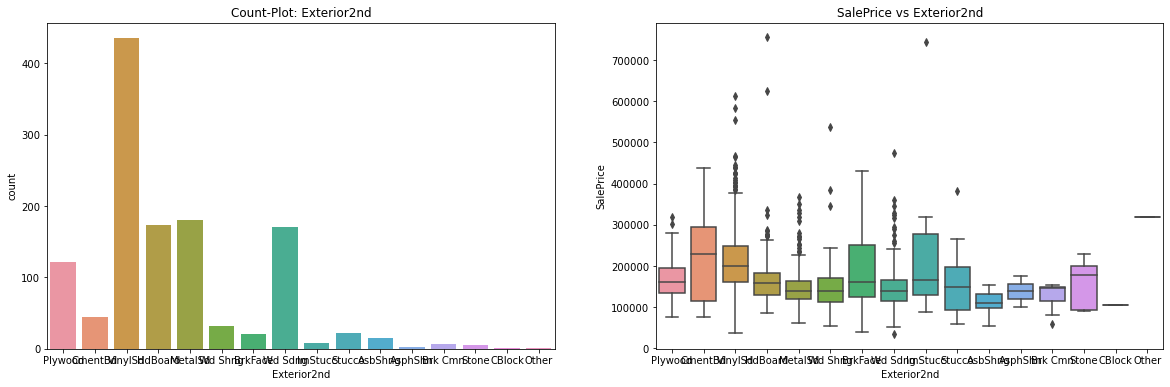

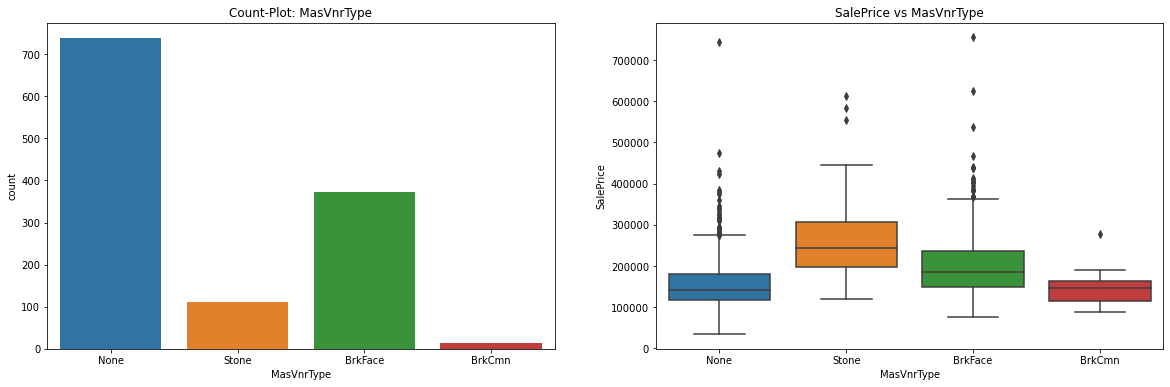

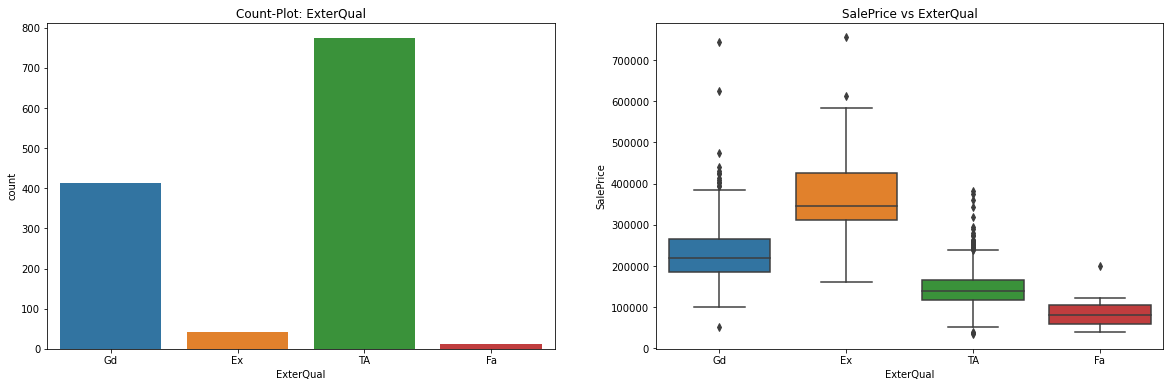

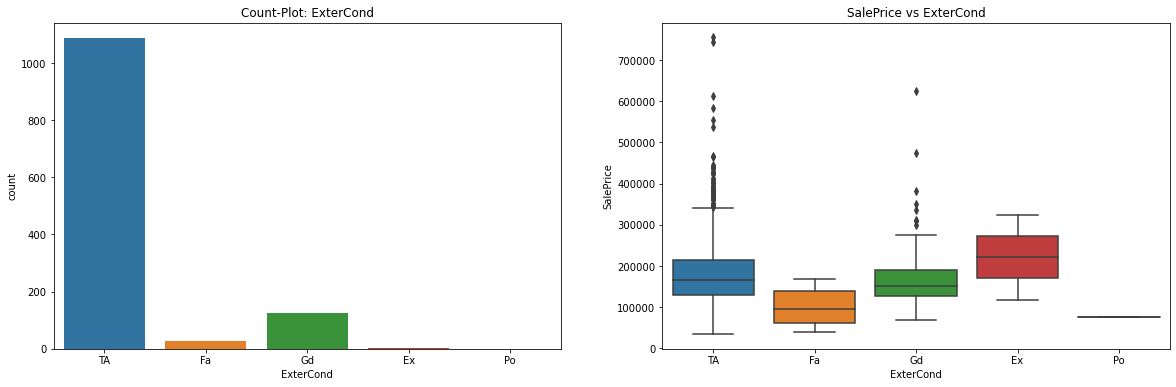

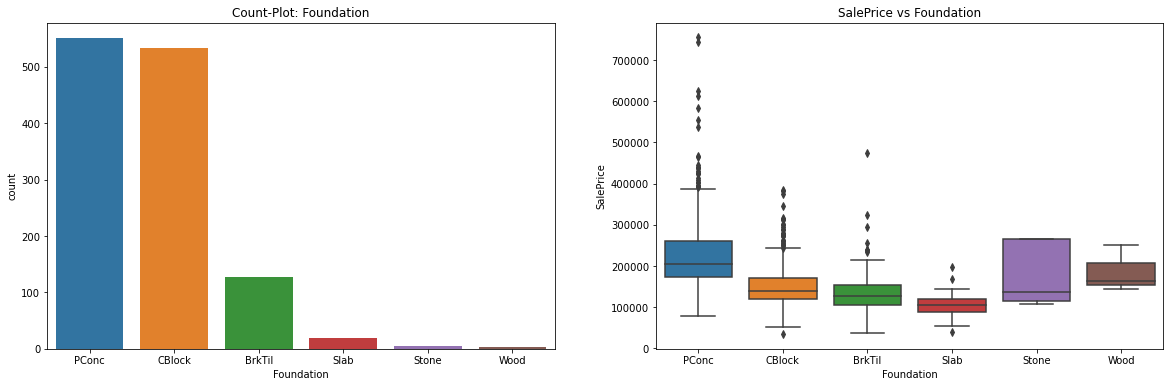

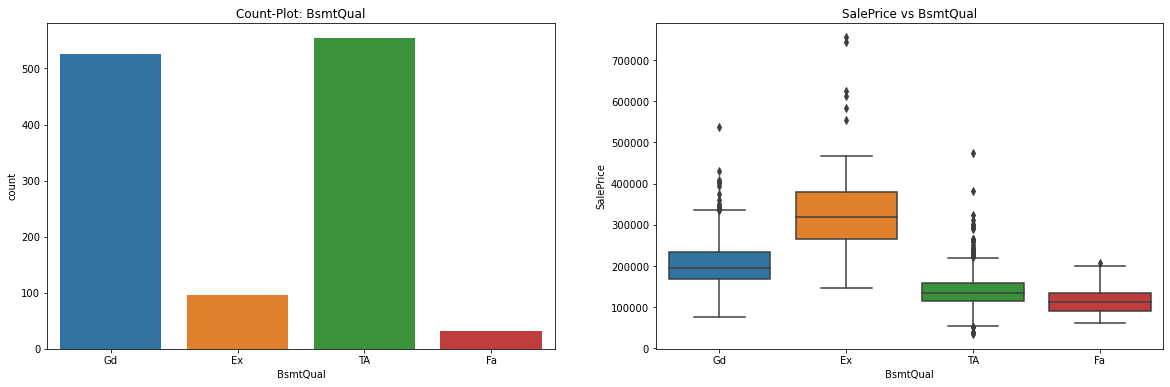

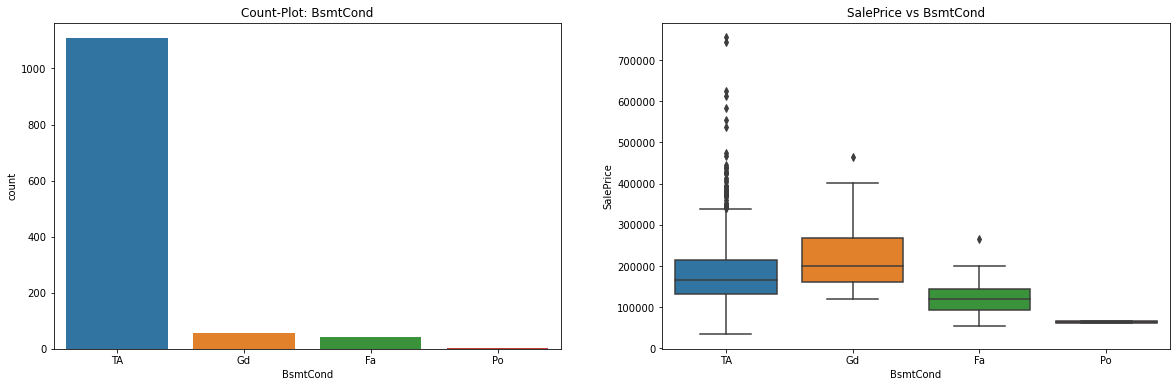

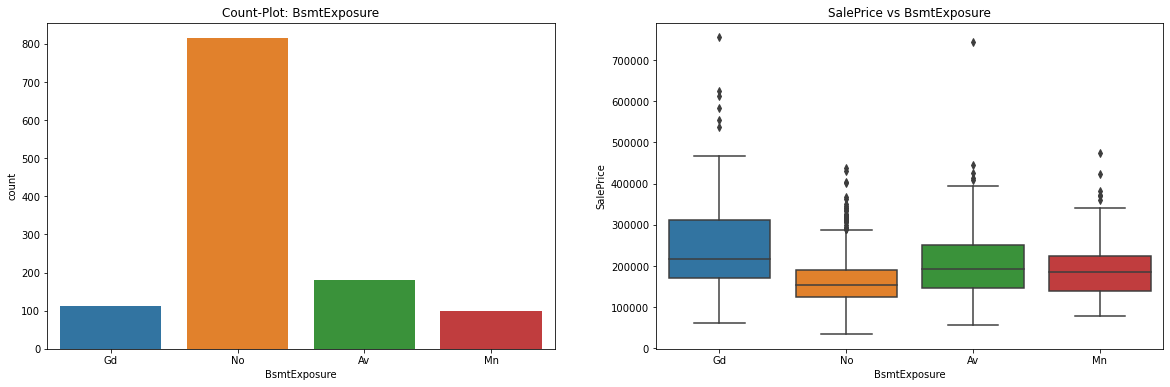

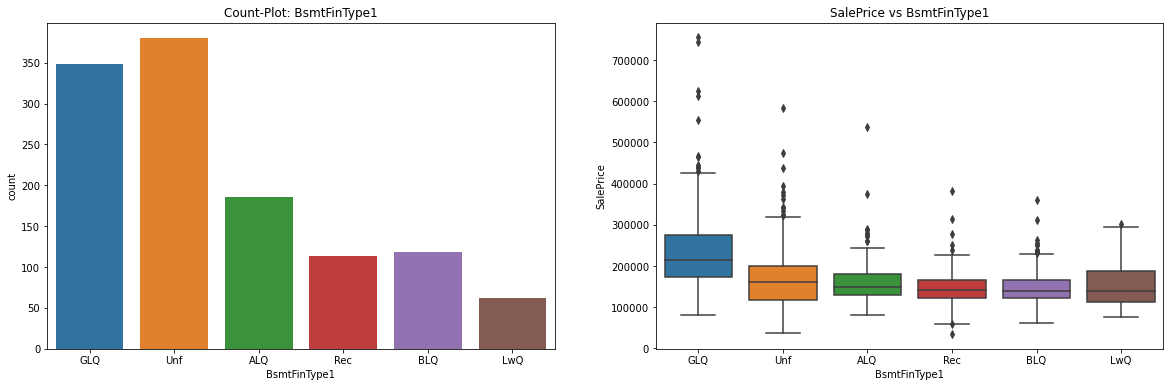

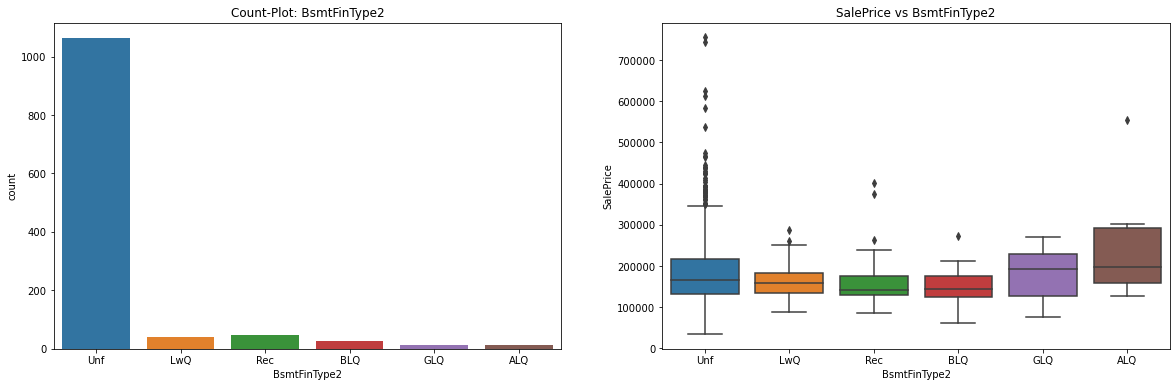

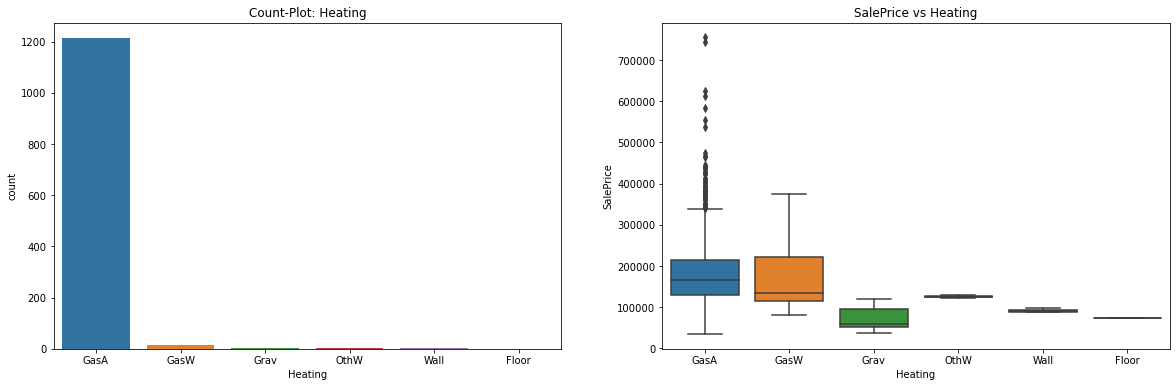

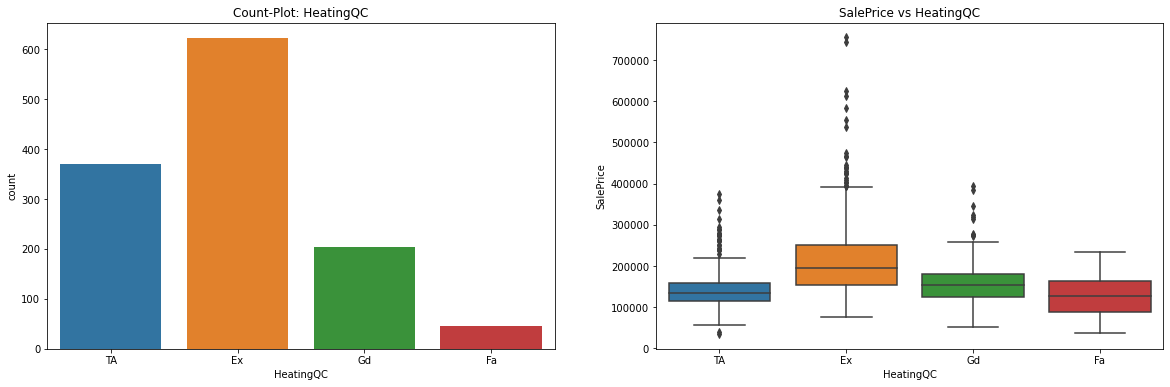

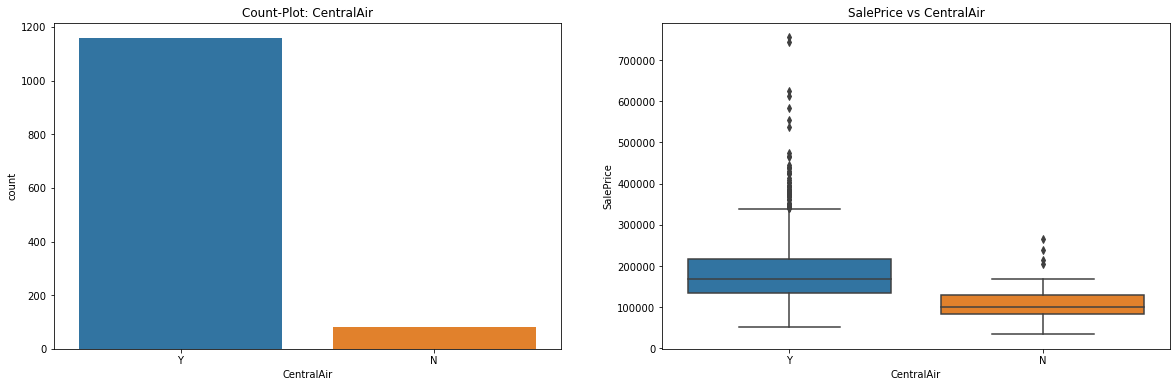

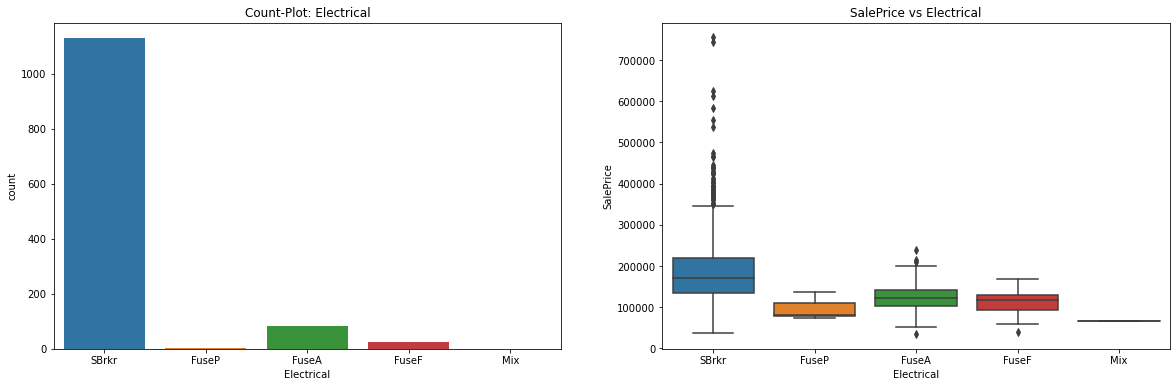

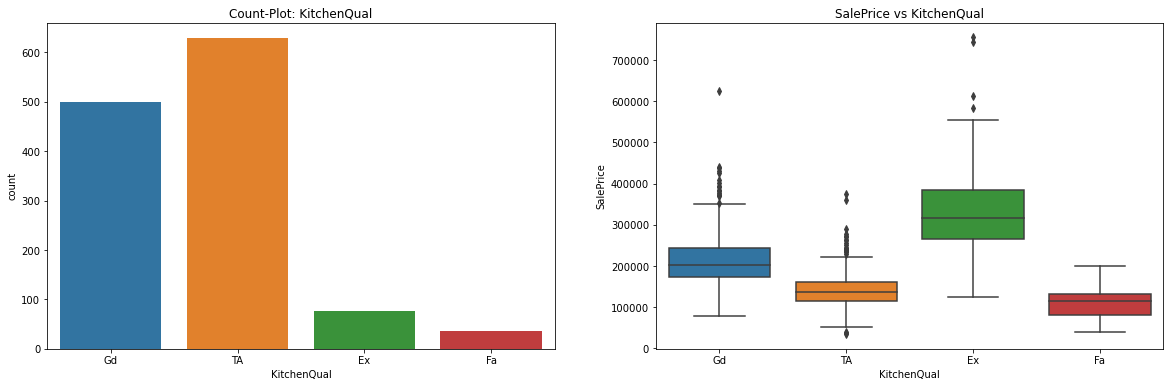

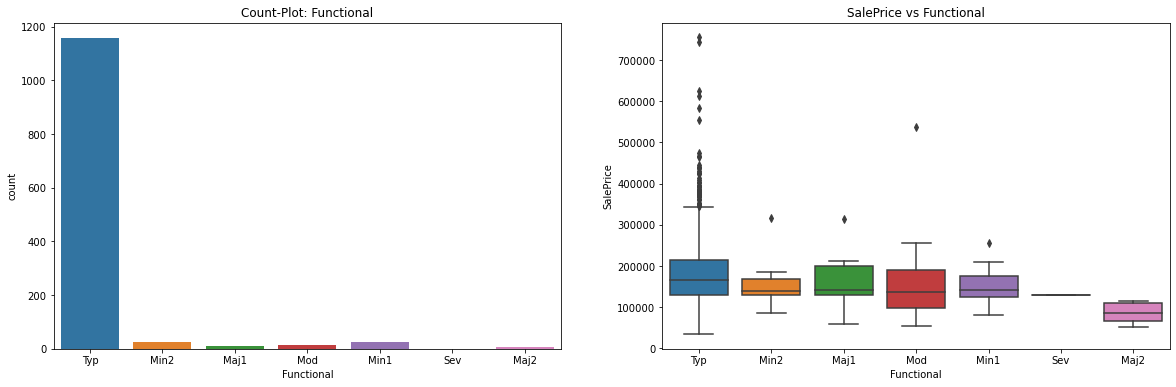

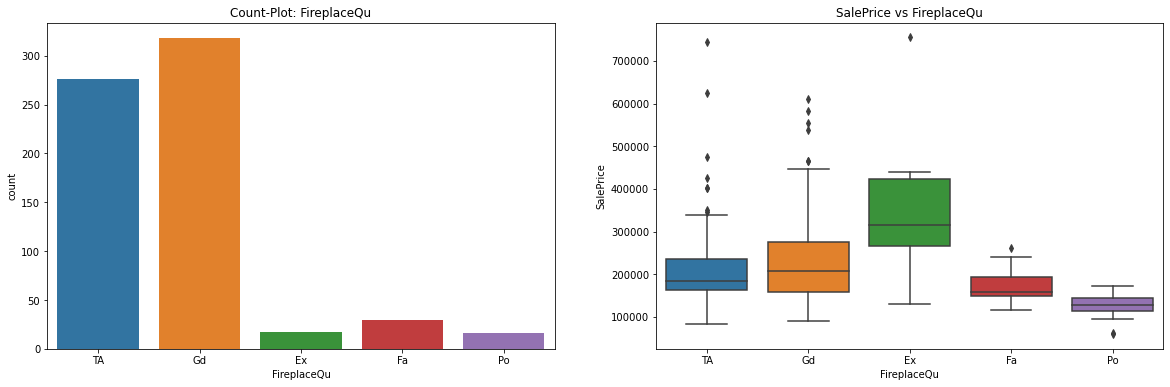

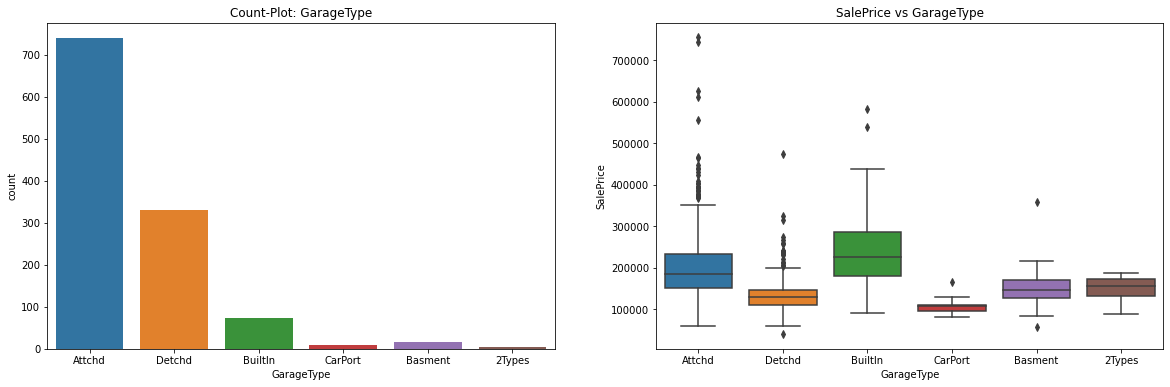

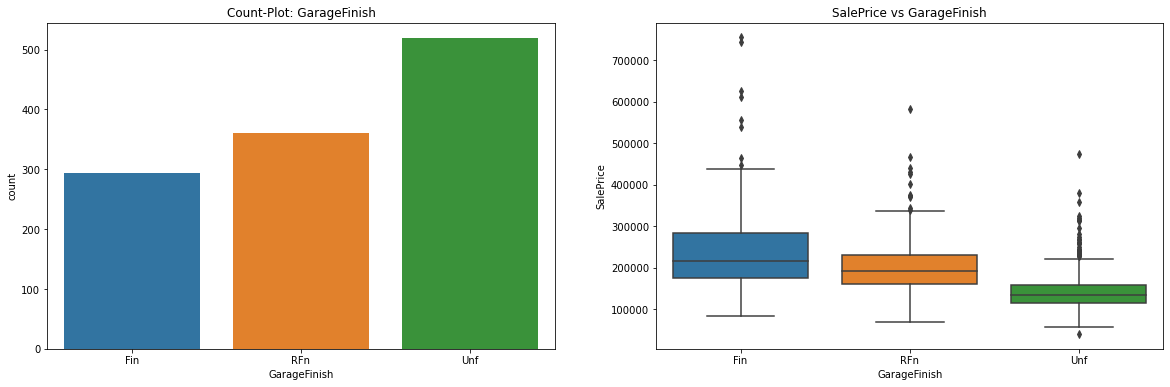

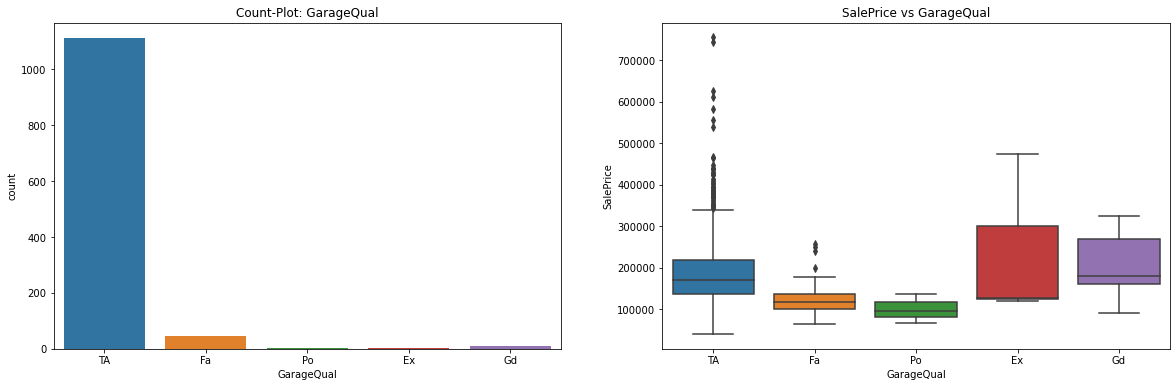

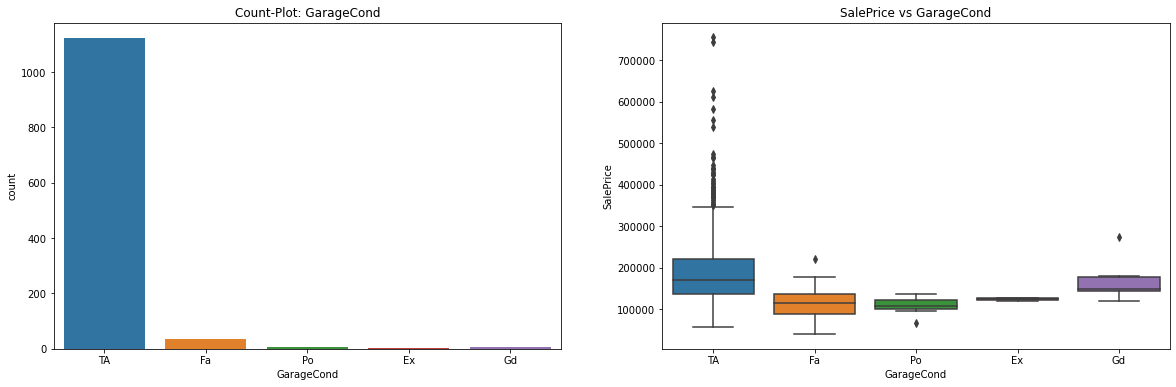

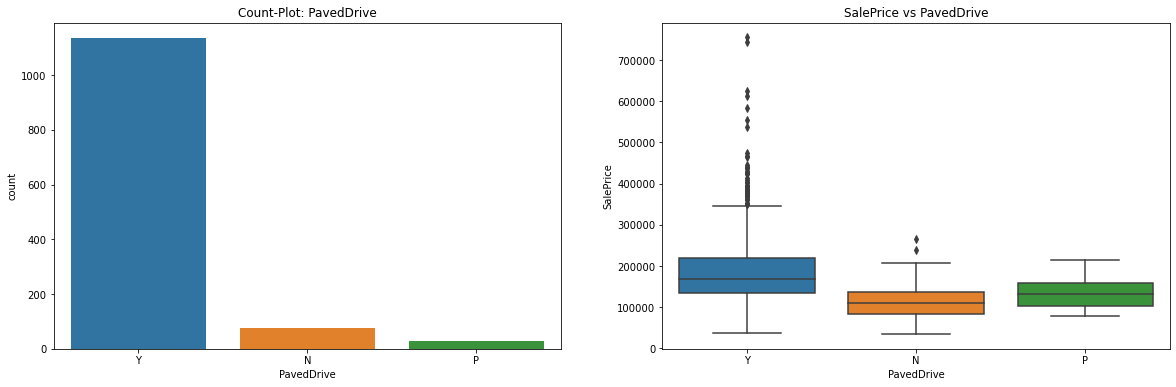

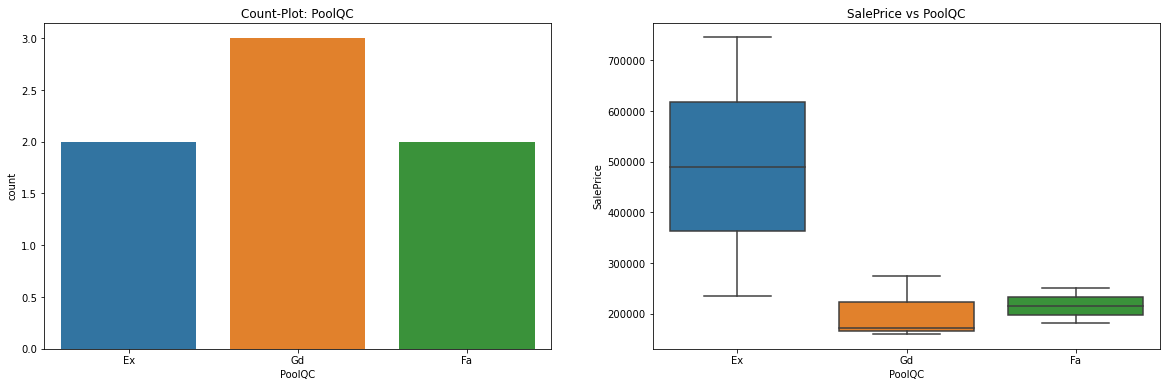

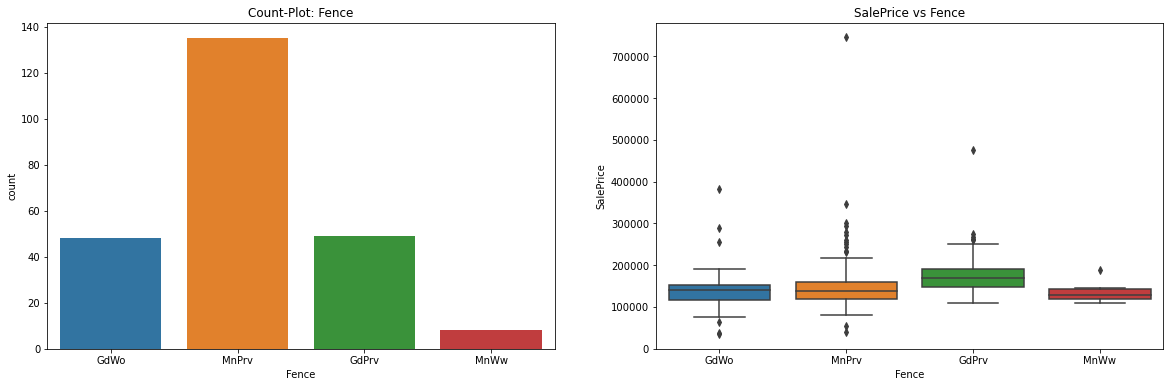

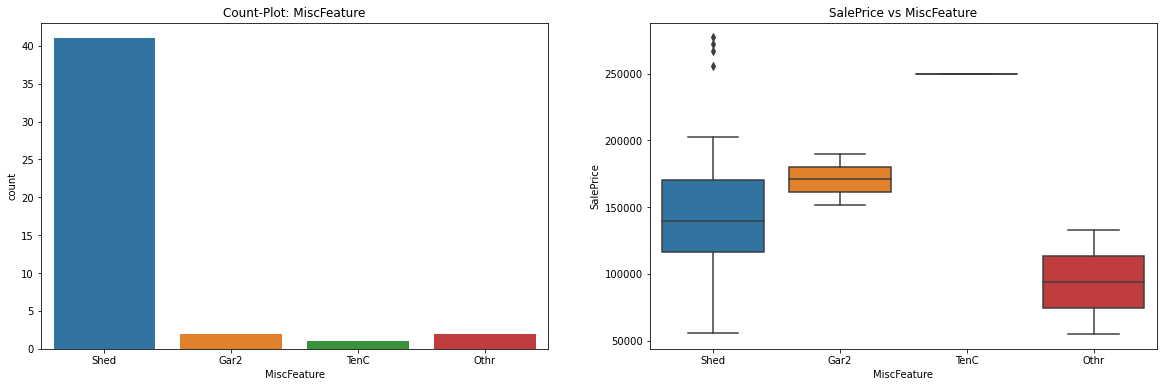

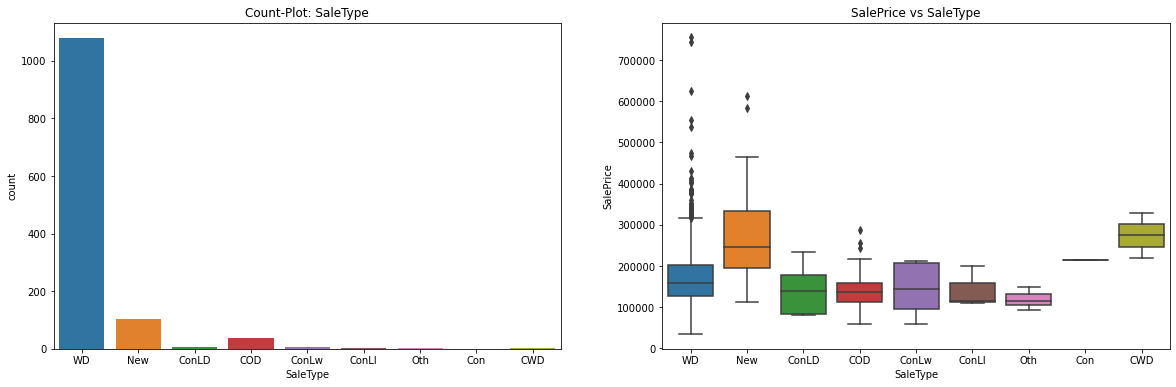

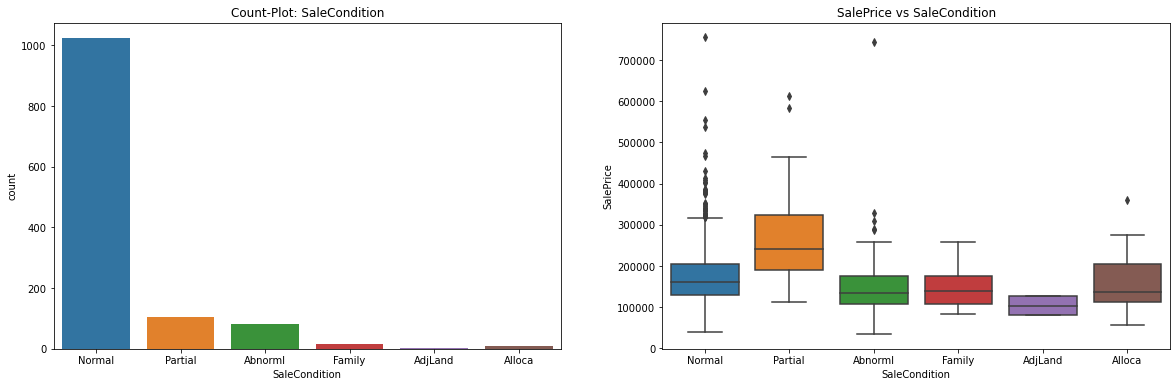

In [80]:
for col in cat_vars:
    
    fig, axs = plt.subplots(ncols = 2, figsize=(20, 6))
    
    axs[0].set_title('Count-Plot: ' + col)
    sns.countplot(x = col, data = df, ax = axs[0])
    
    axs[1].set_title(target_var + ' vs ' + col)
    sns.boxplot(x = col, y = target_var, data = df, ax = axs[1])
    
    plt.show()

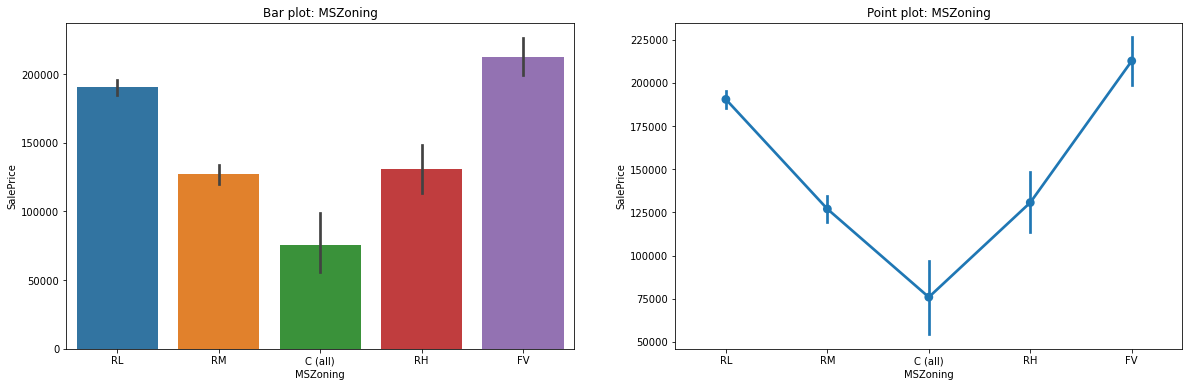

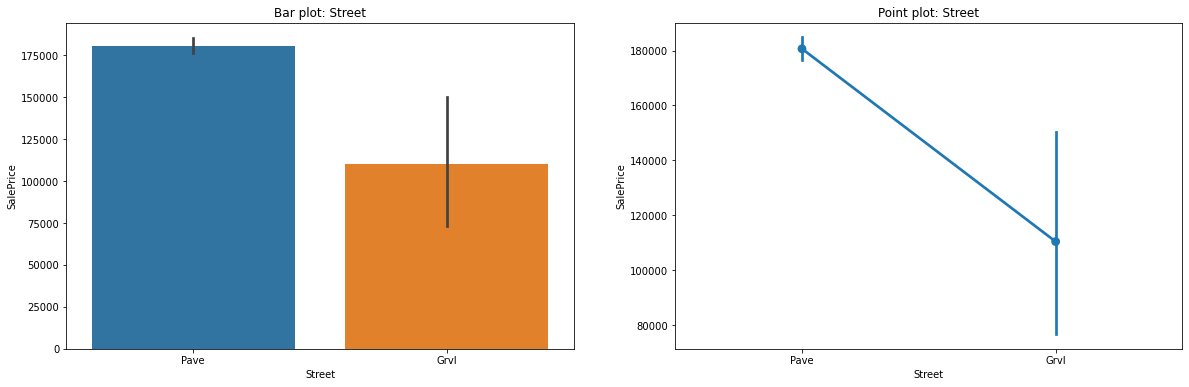

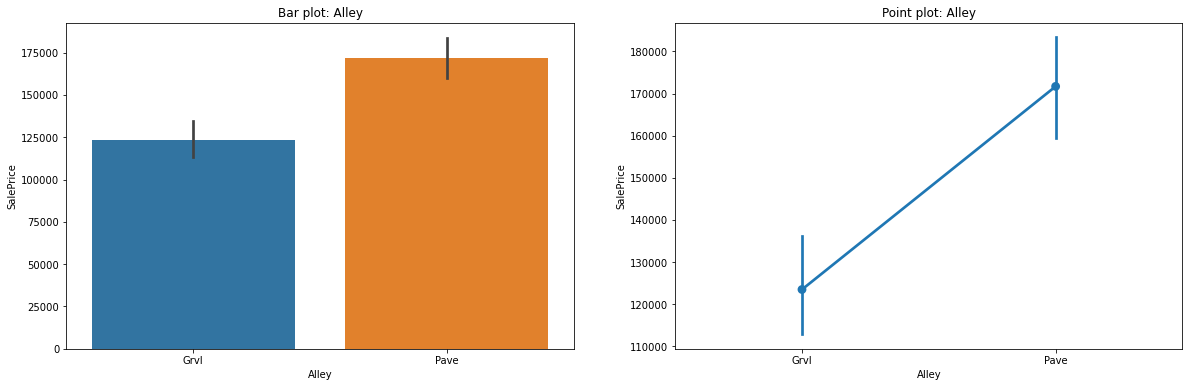

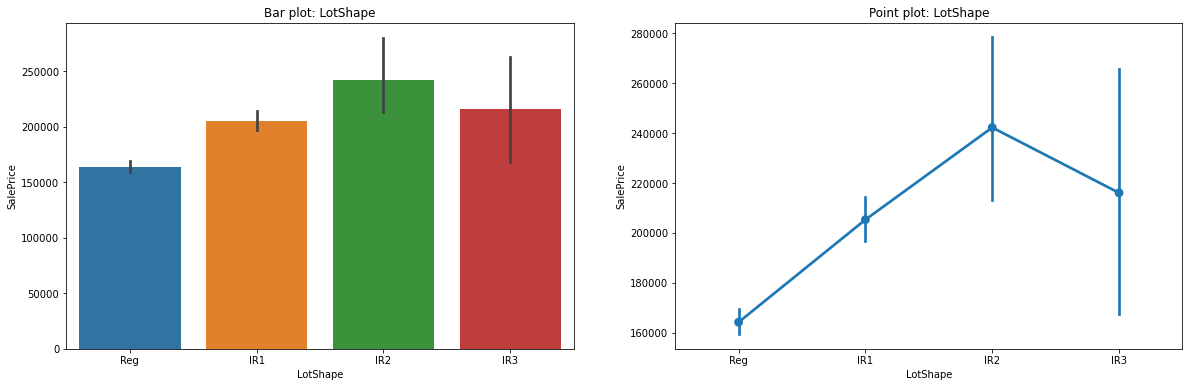

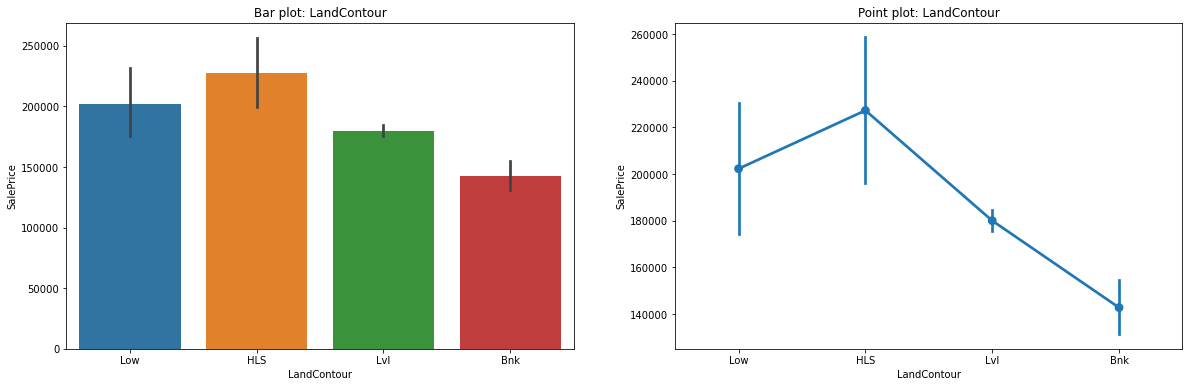

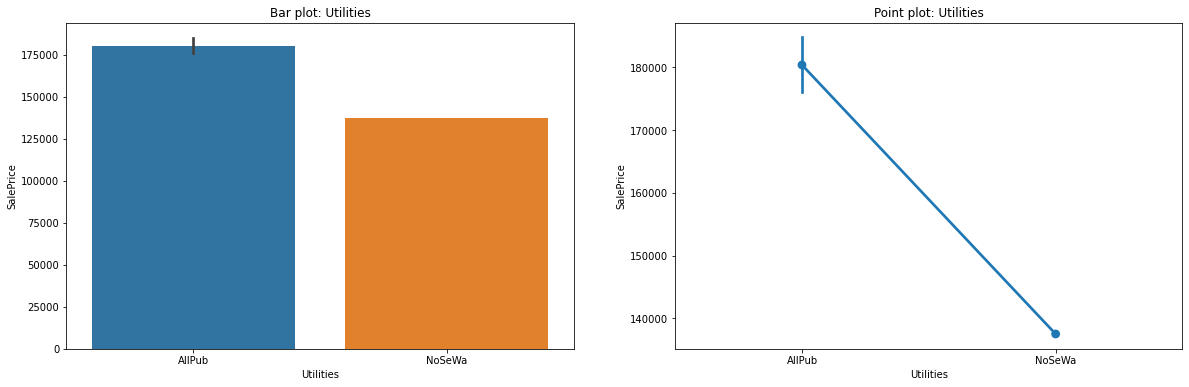

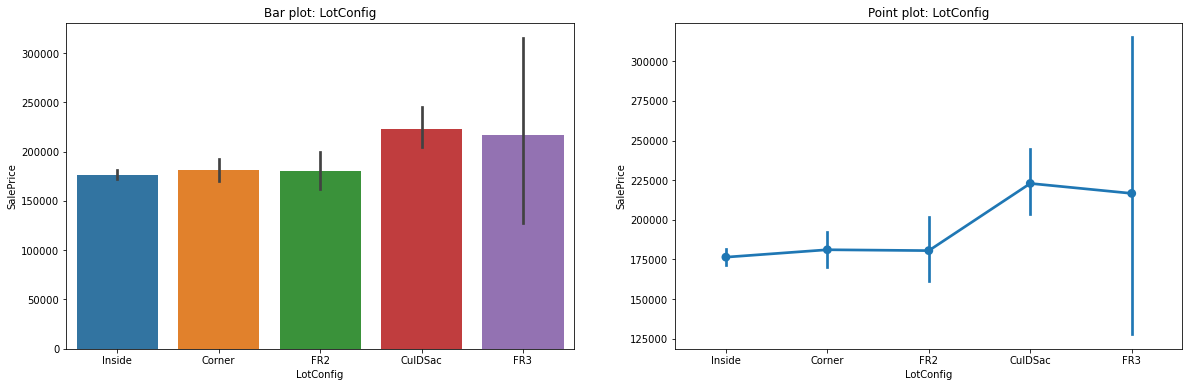

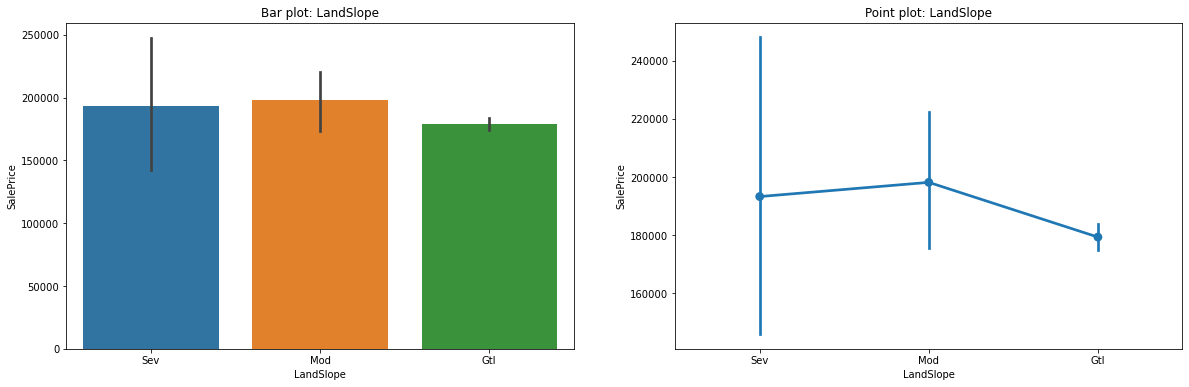

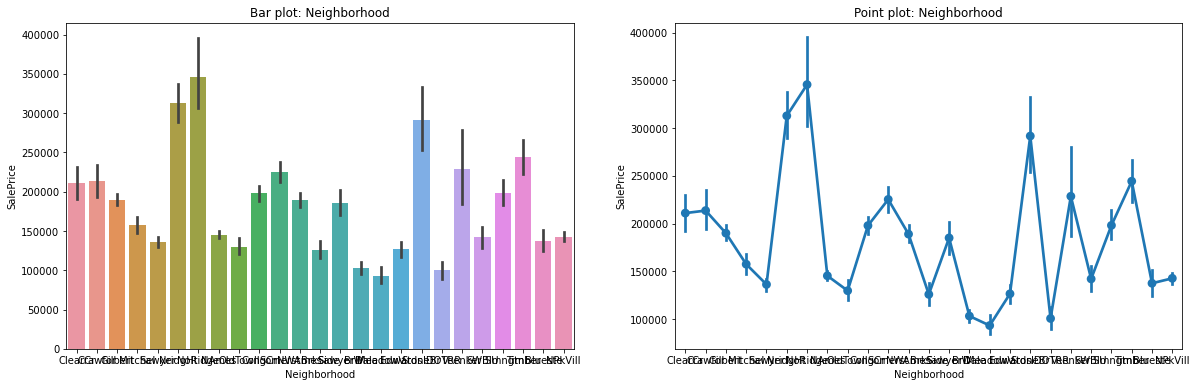

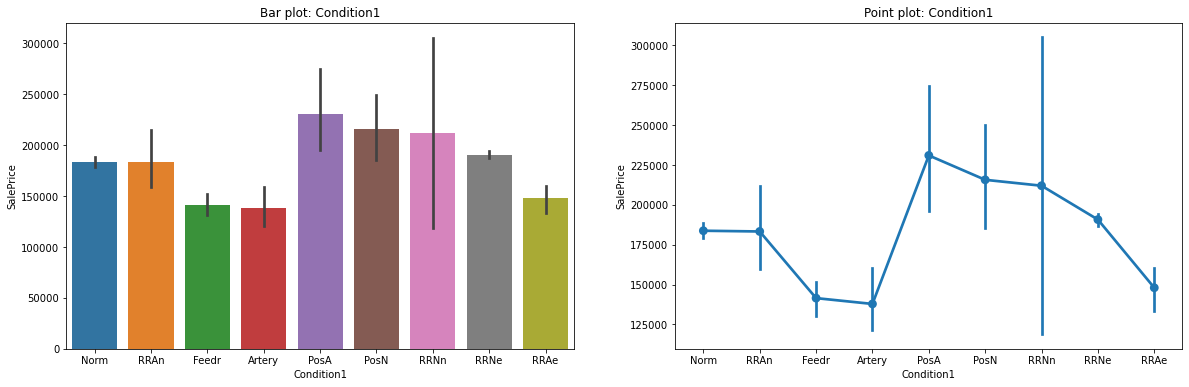

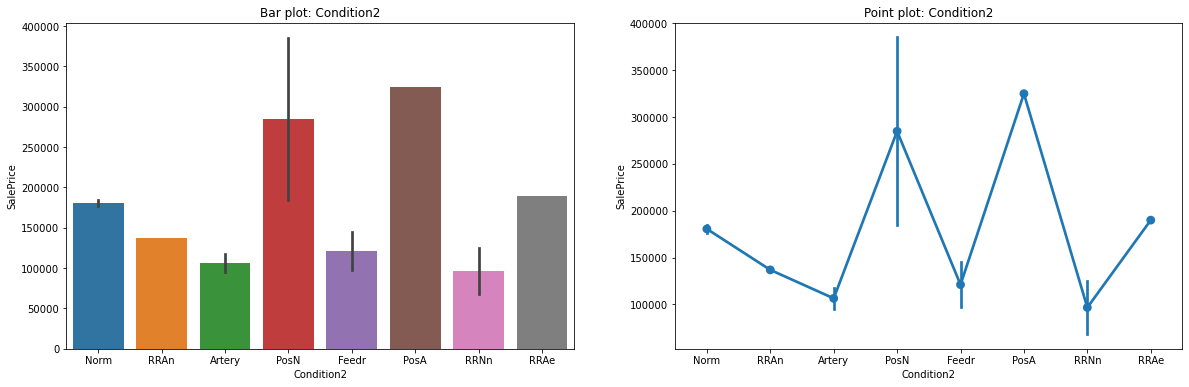

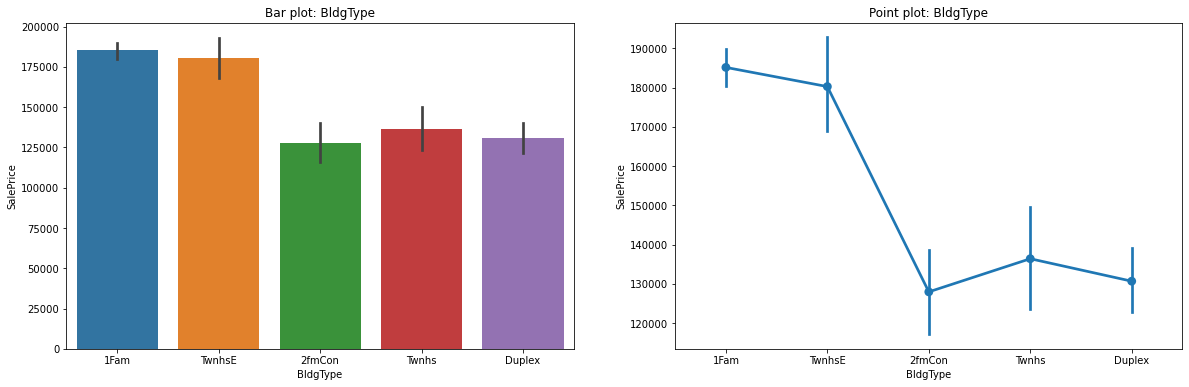

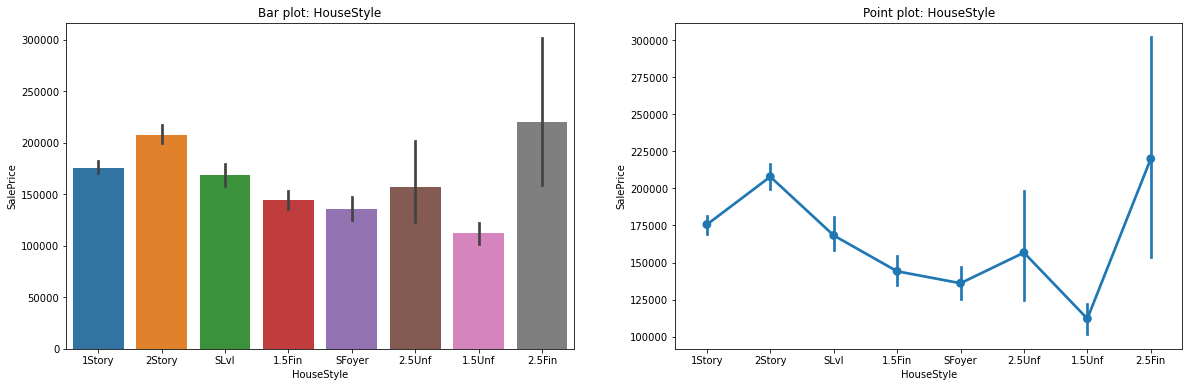

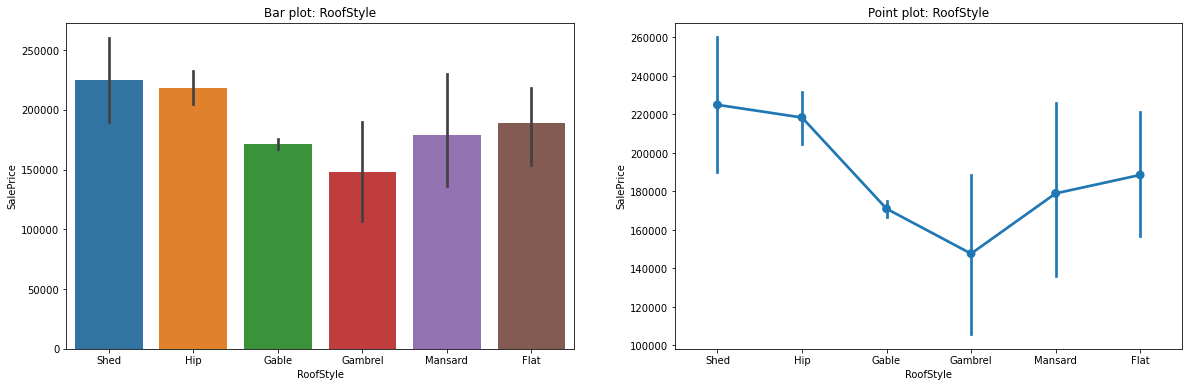

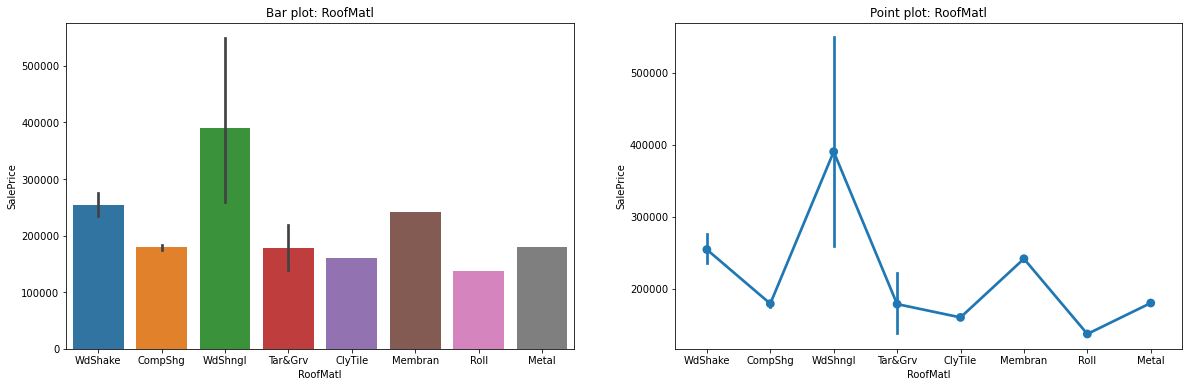

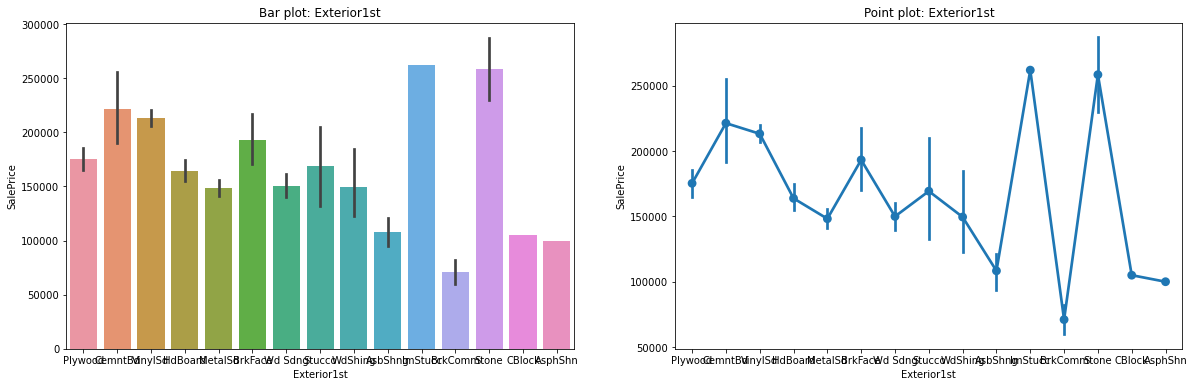

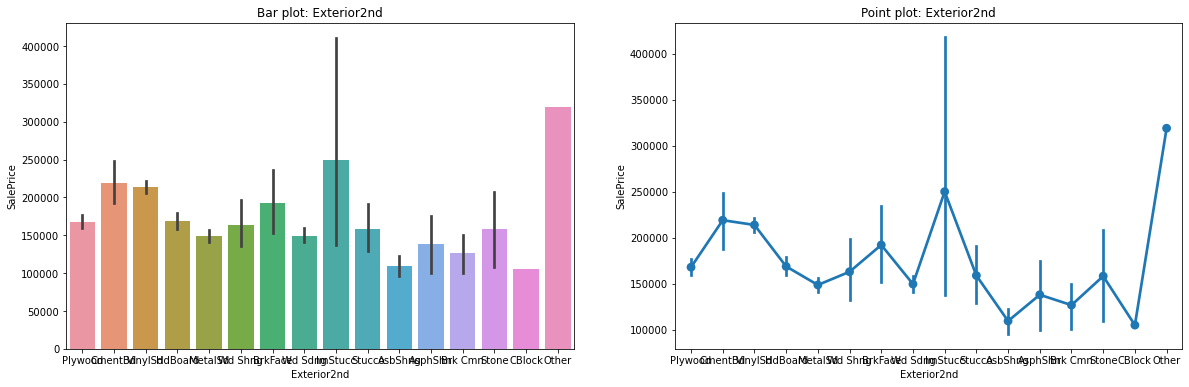

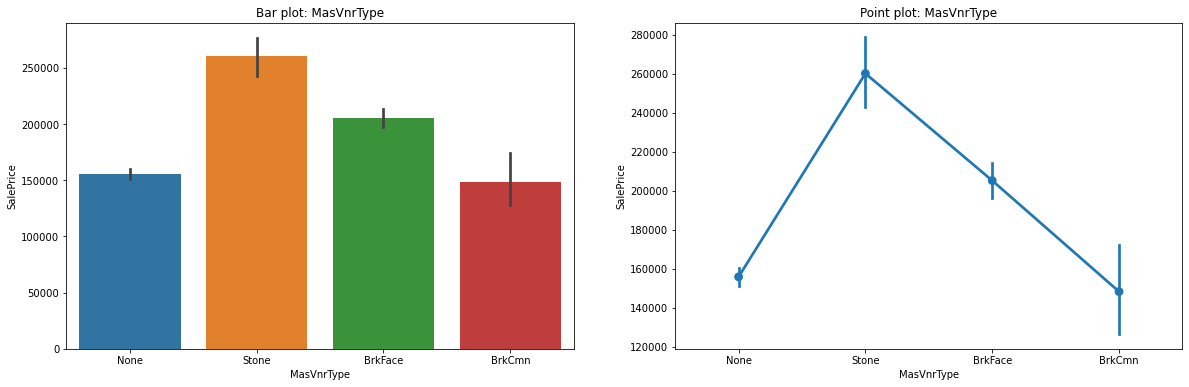

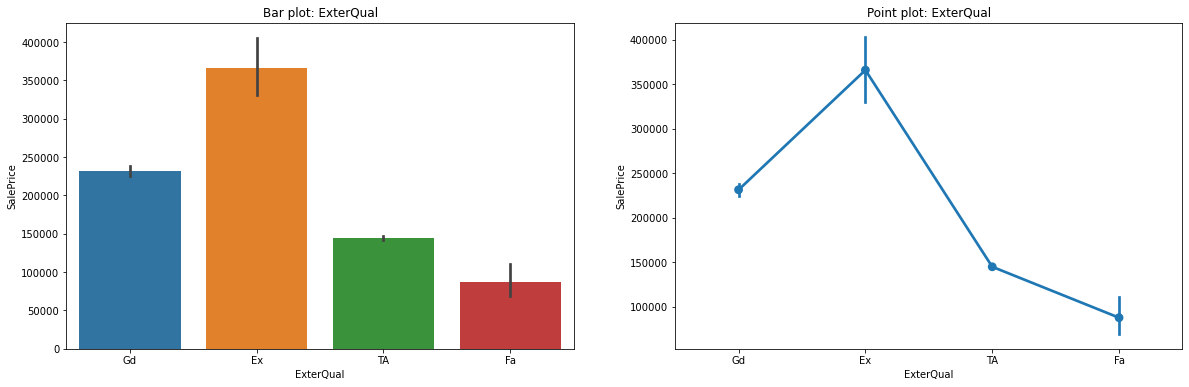

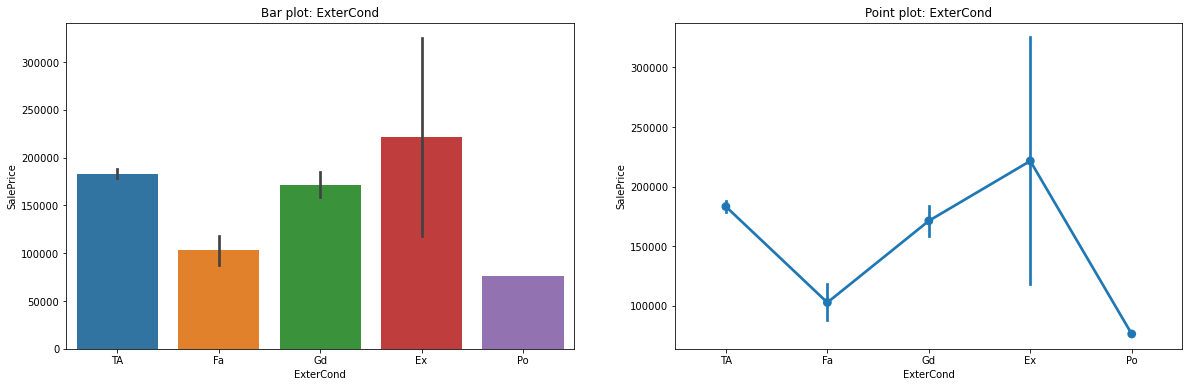

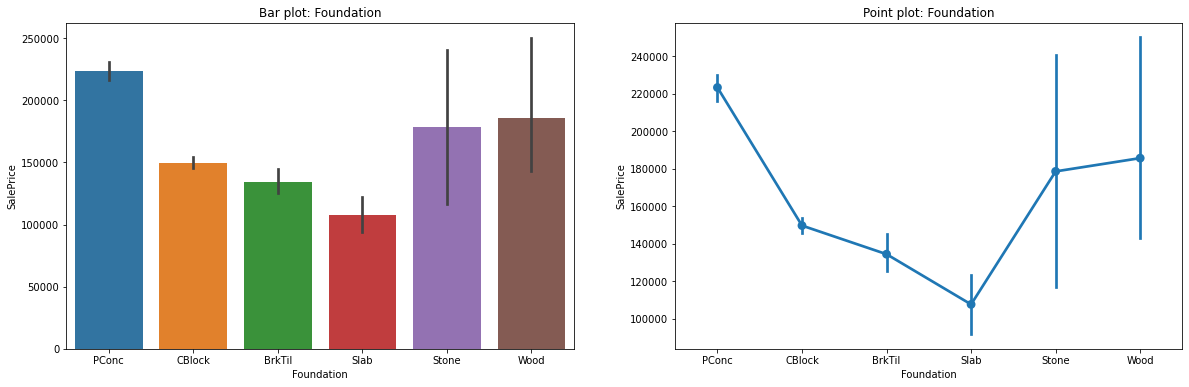

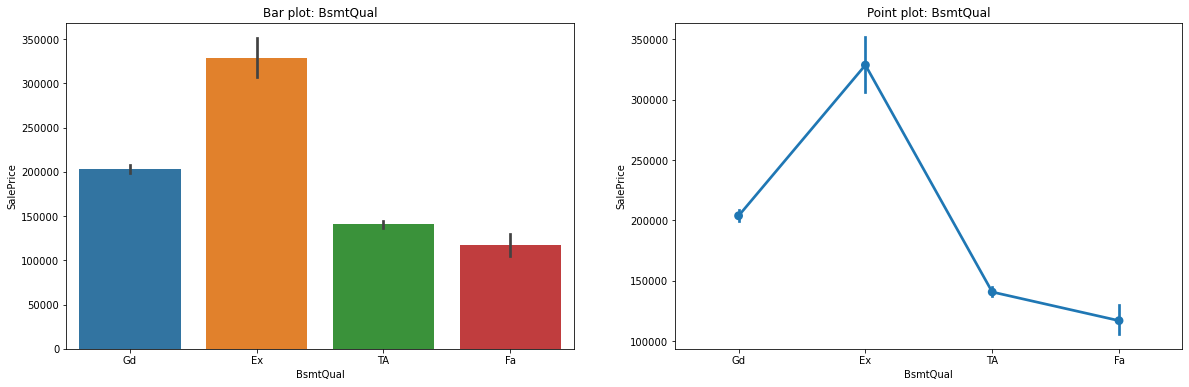

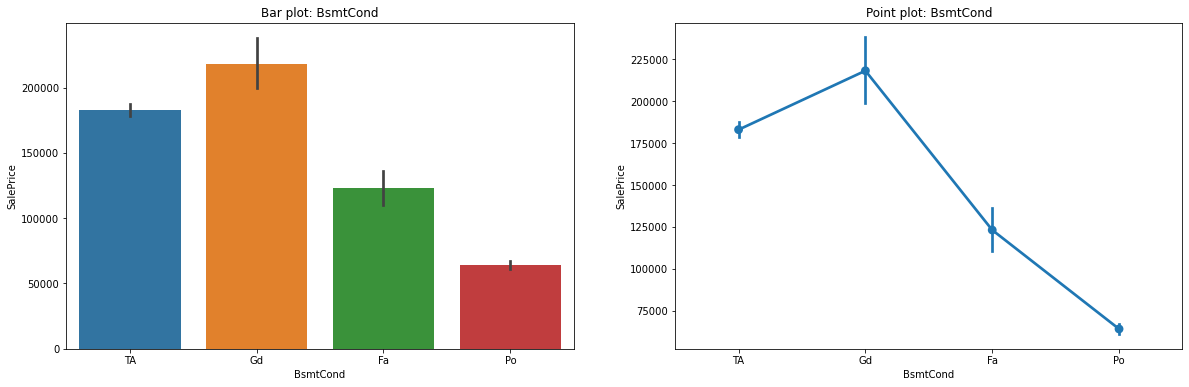

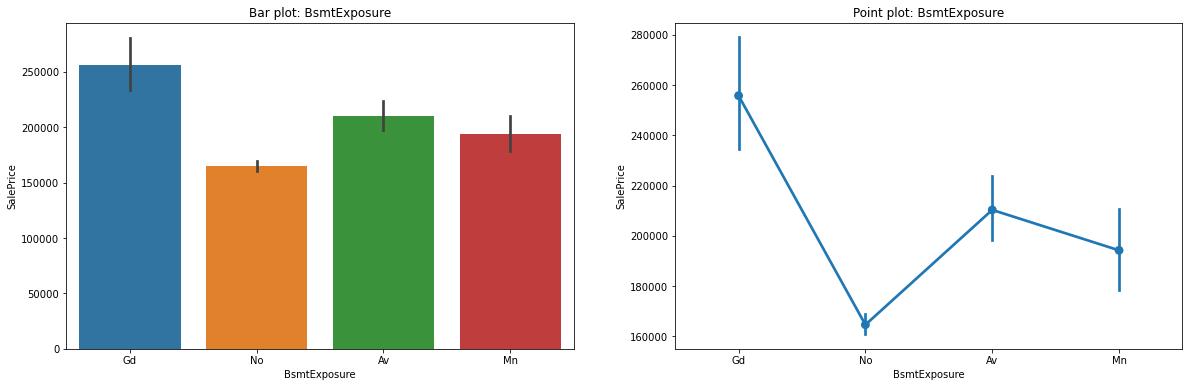

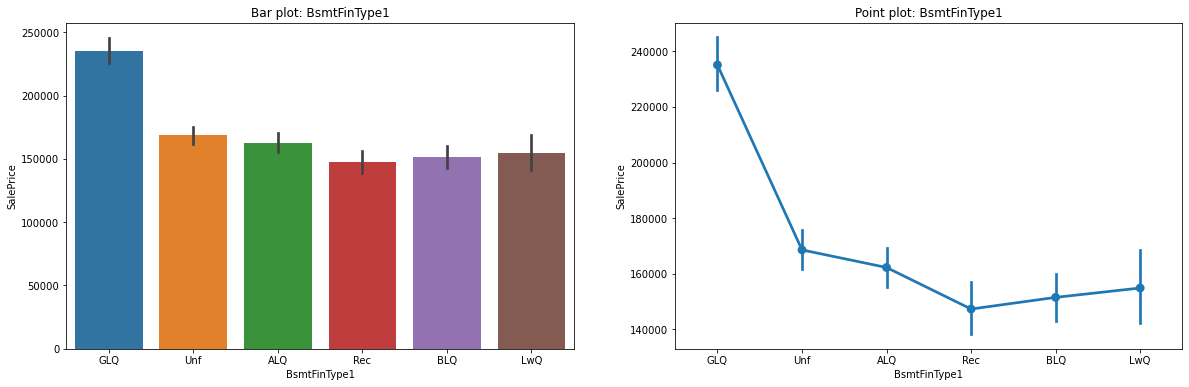

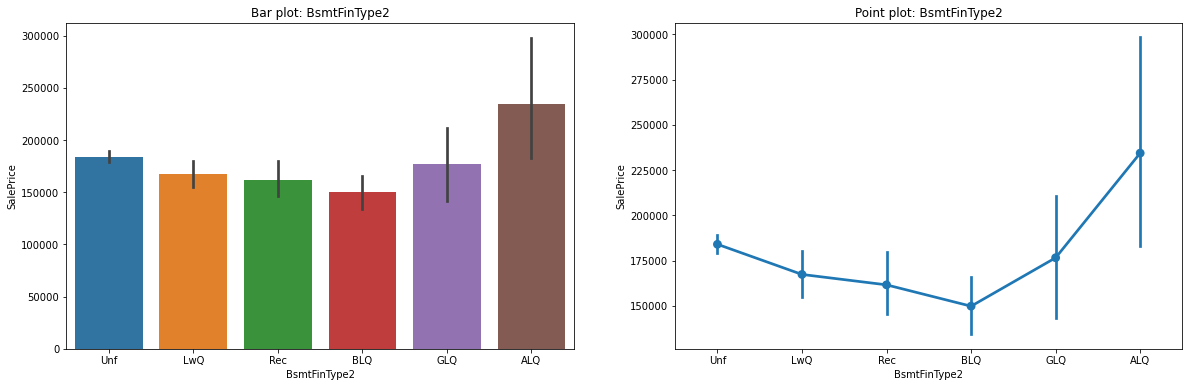

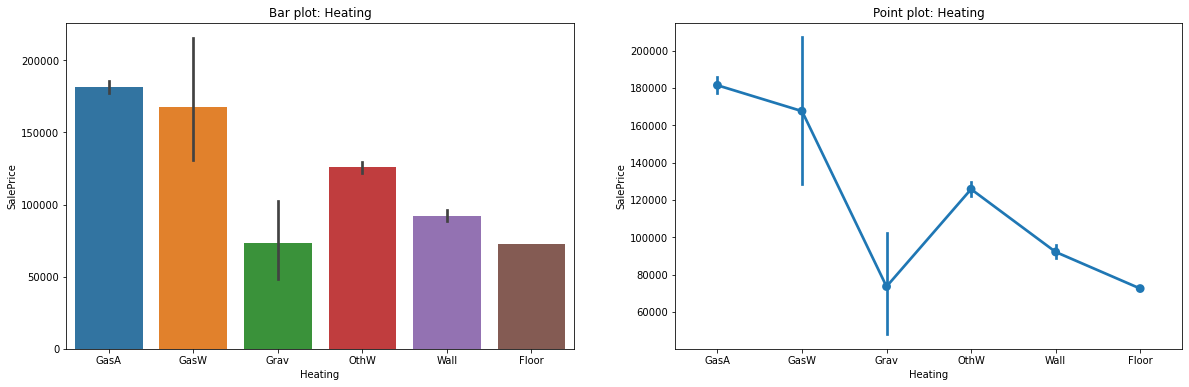

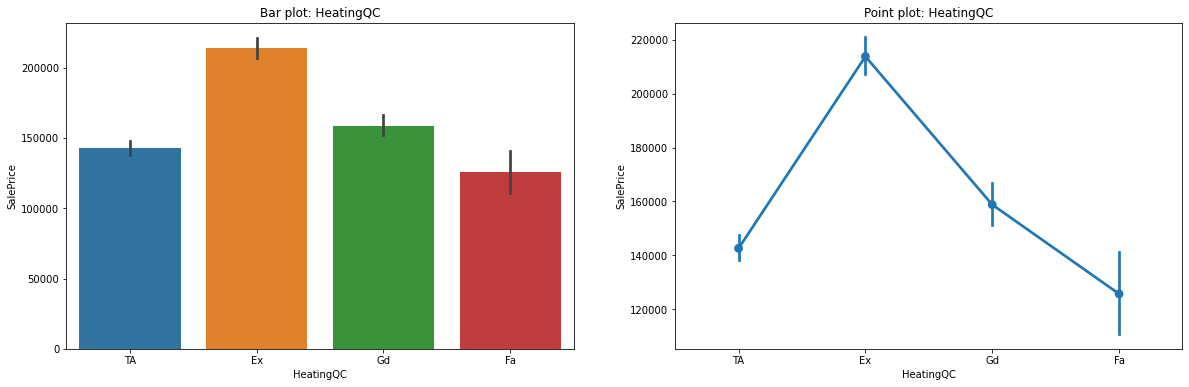

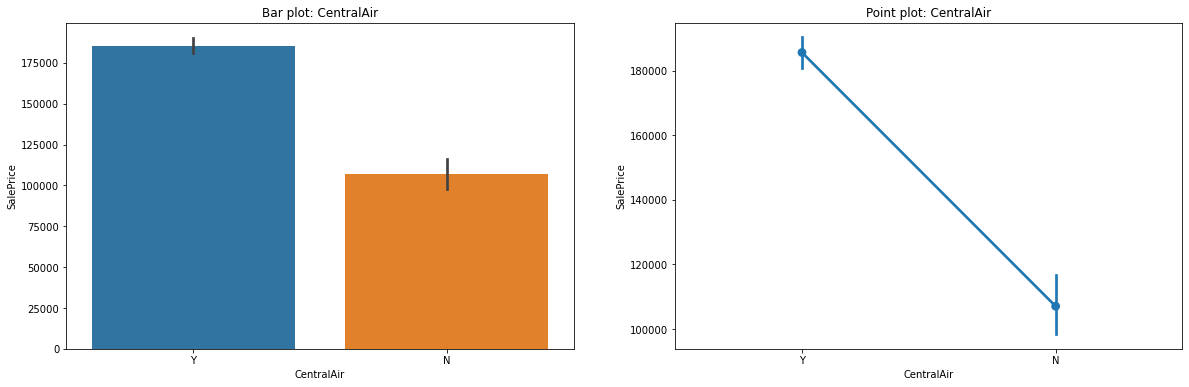

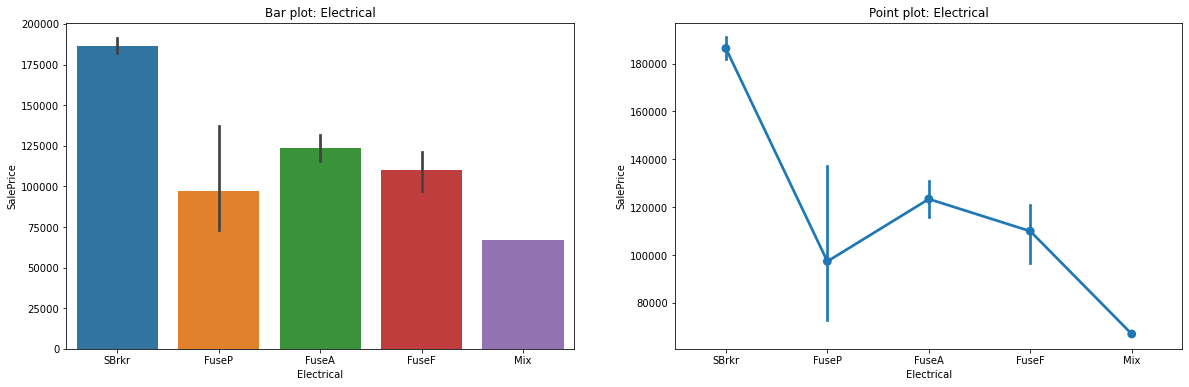

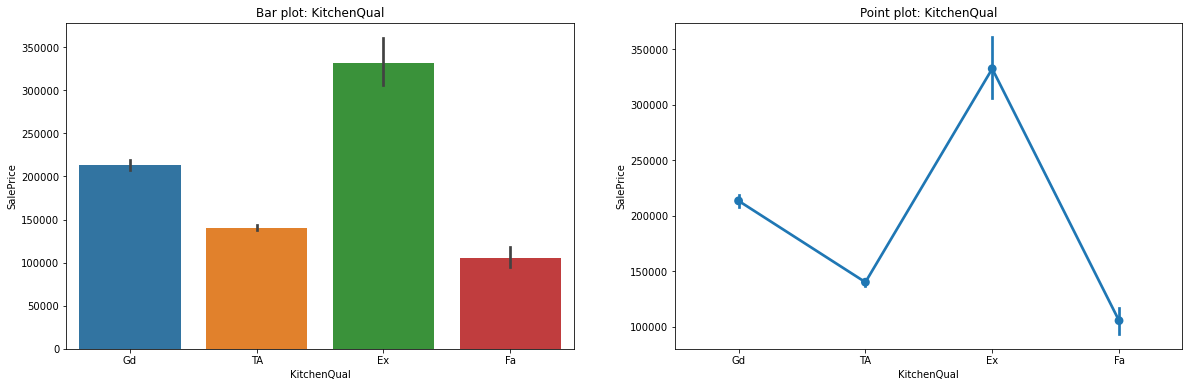

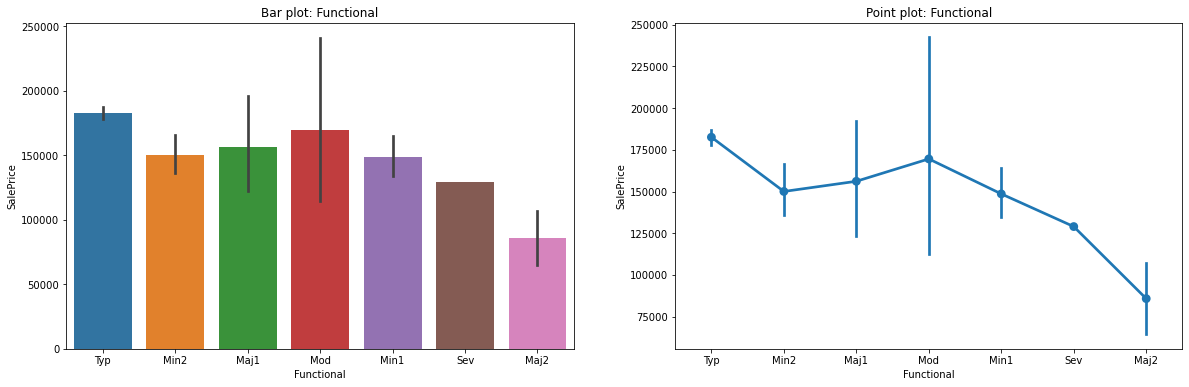

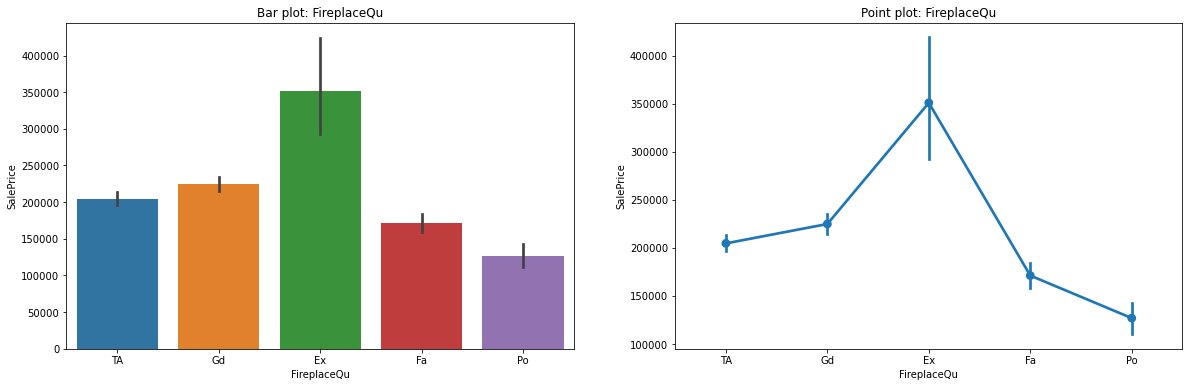

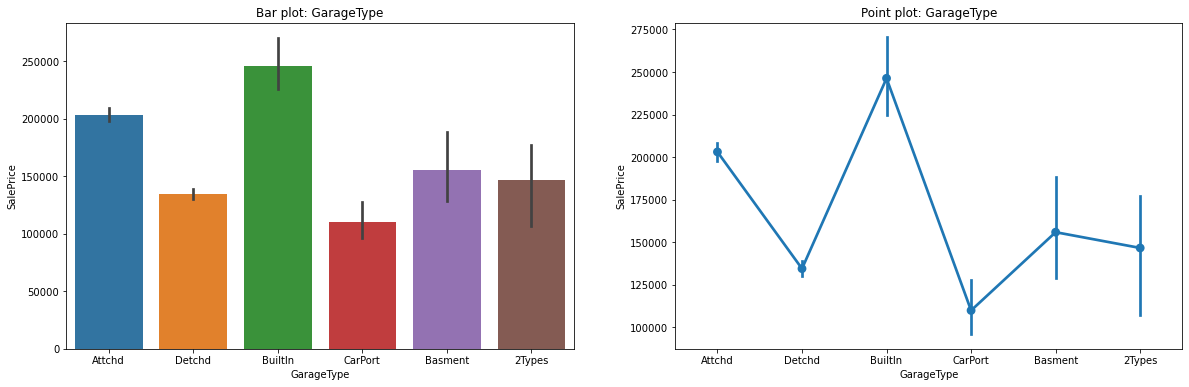

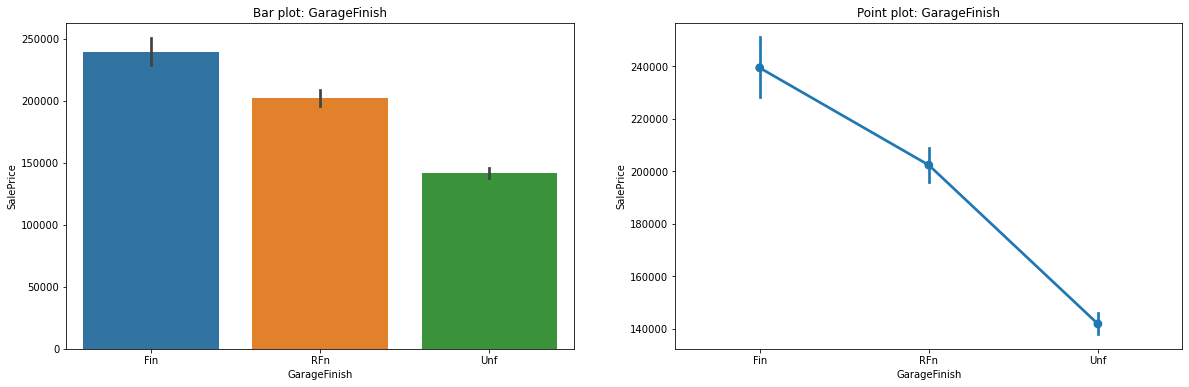

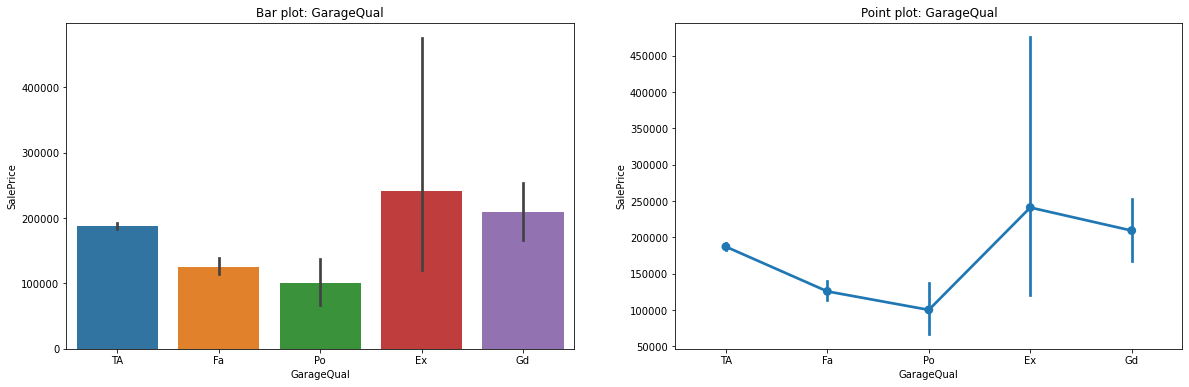

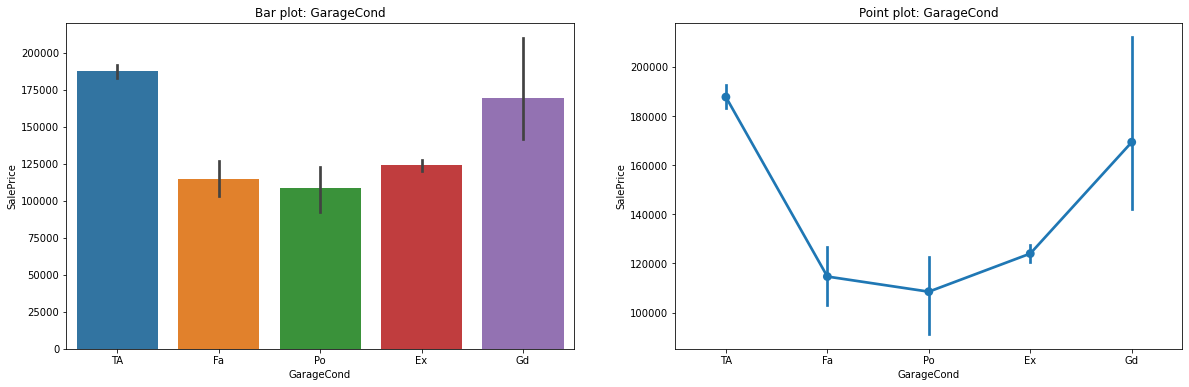

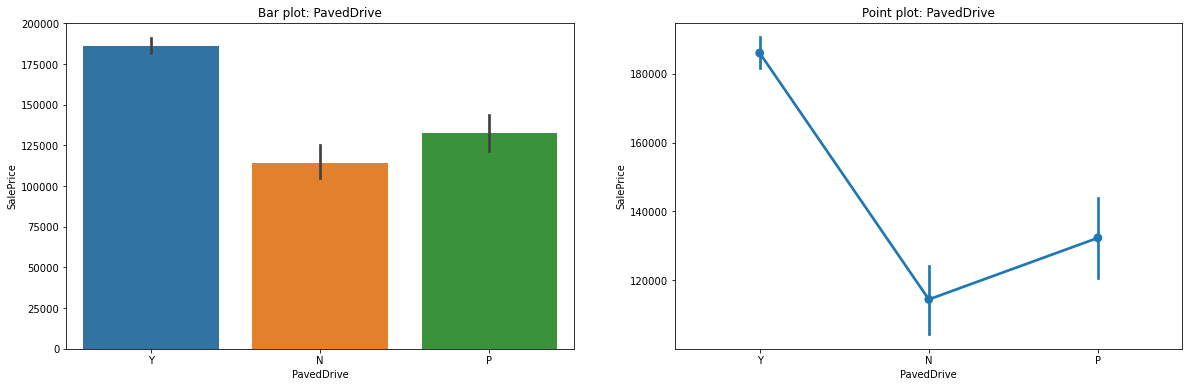

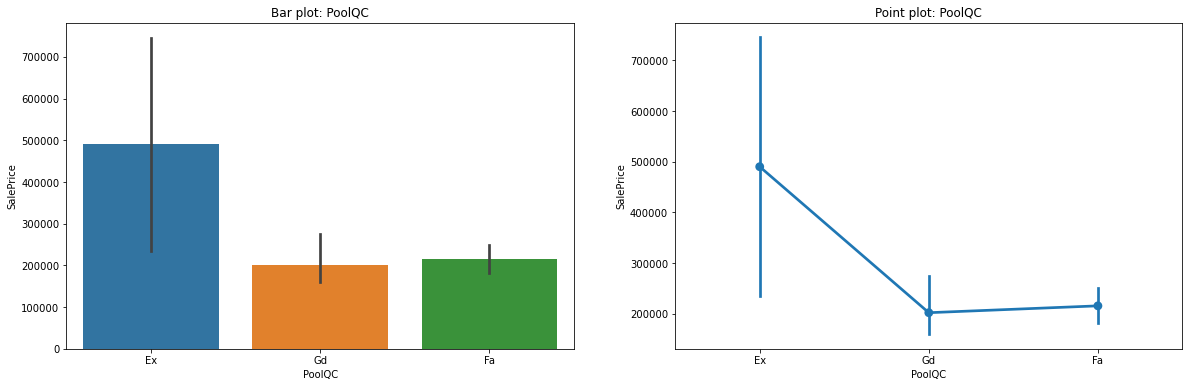

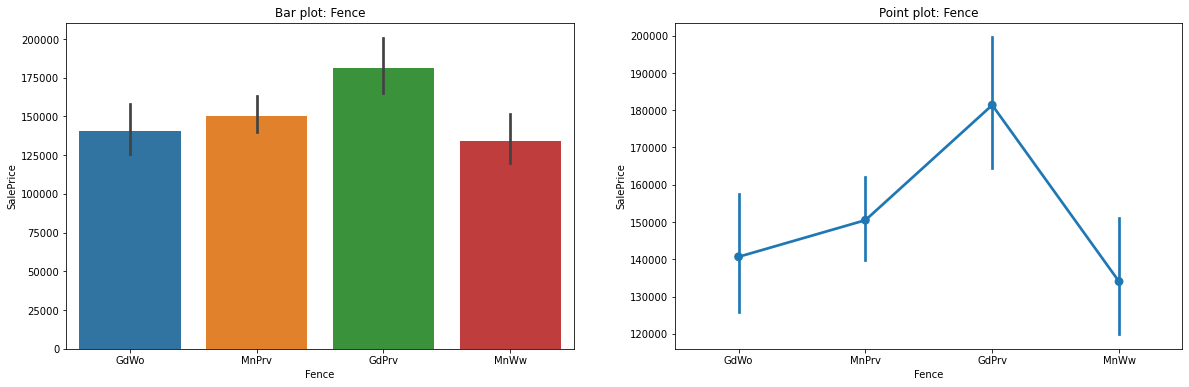

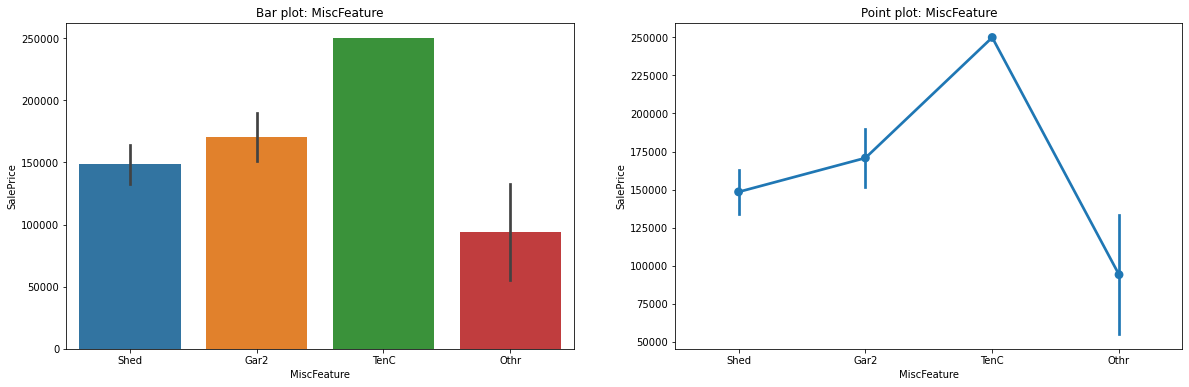

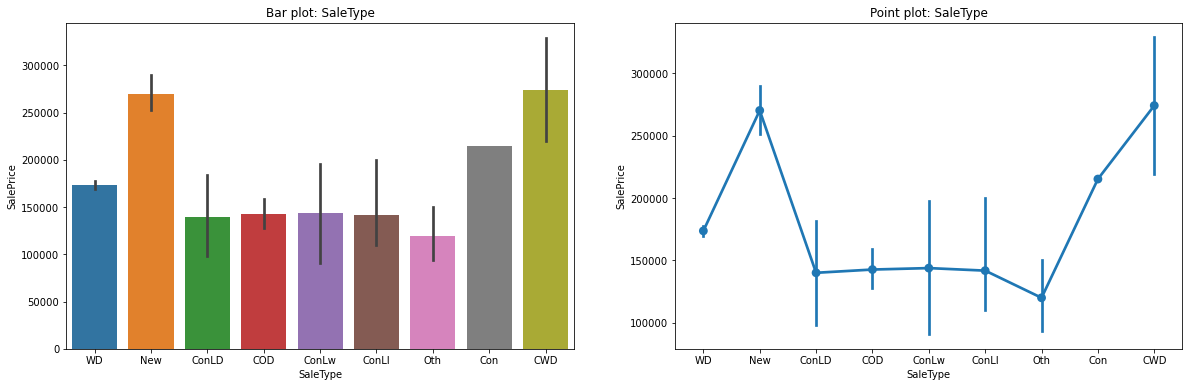

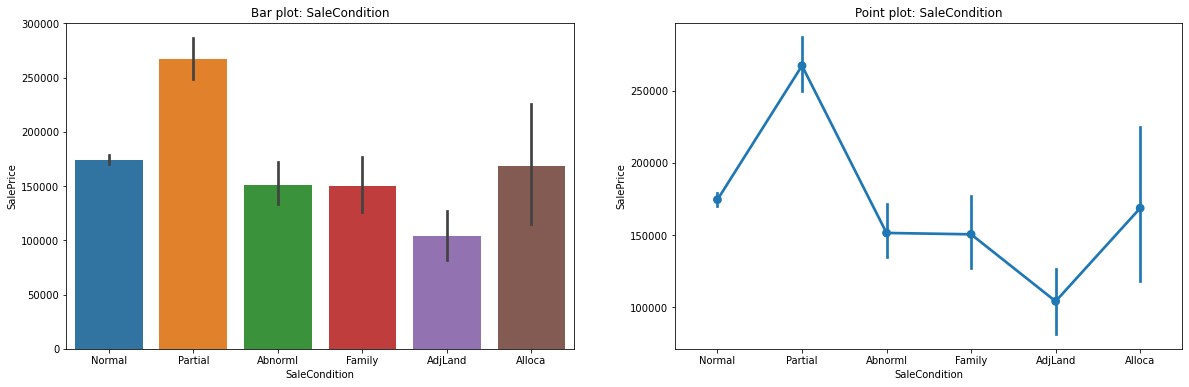

In [8]:
for col in cat_vars:
    
    fig, axs = plt.subplots(ncols = 2, figsize=(20, 6))
    
    axs[0].set_title('Bar plot: ' + col)
    sns.barplot(x = col, y = target_var, data = df, ax = axs[0])
    
    axs[1].set_title('Point plot: ' + col)
    sns.pointplot(x = col, y = target_var, data = df, ax = axs[1], dodge = True)
    
    plt.show()

* Variables __'Neighborhood' , _'ExterQual'_ , _'HeatingQC'_ , _'BsmtFinType1'_ , _'KitchenQual'_ , _'GarageFinish'_ , _'MasVnrType'___ show good variation with respect to the target variable.

* Variables __'SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical', 'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'RoofStyle', 'BldgType', 'Condition2', 'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street', 'MSZoning'__ seem to have very less variance among their classes.

* Variables __'MiscFeature', 'Fence', 'PoolQC', 'Alley'__ have far too many missing values(close to the length of data).

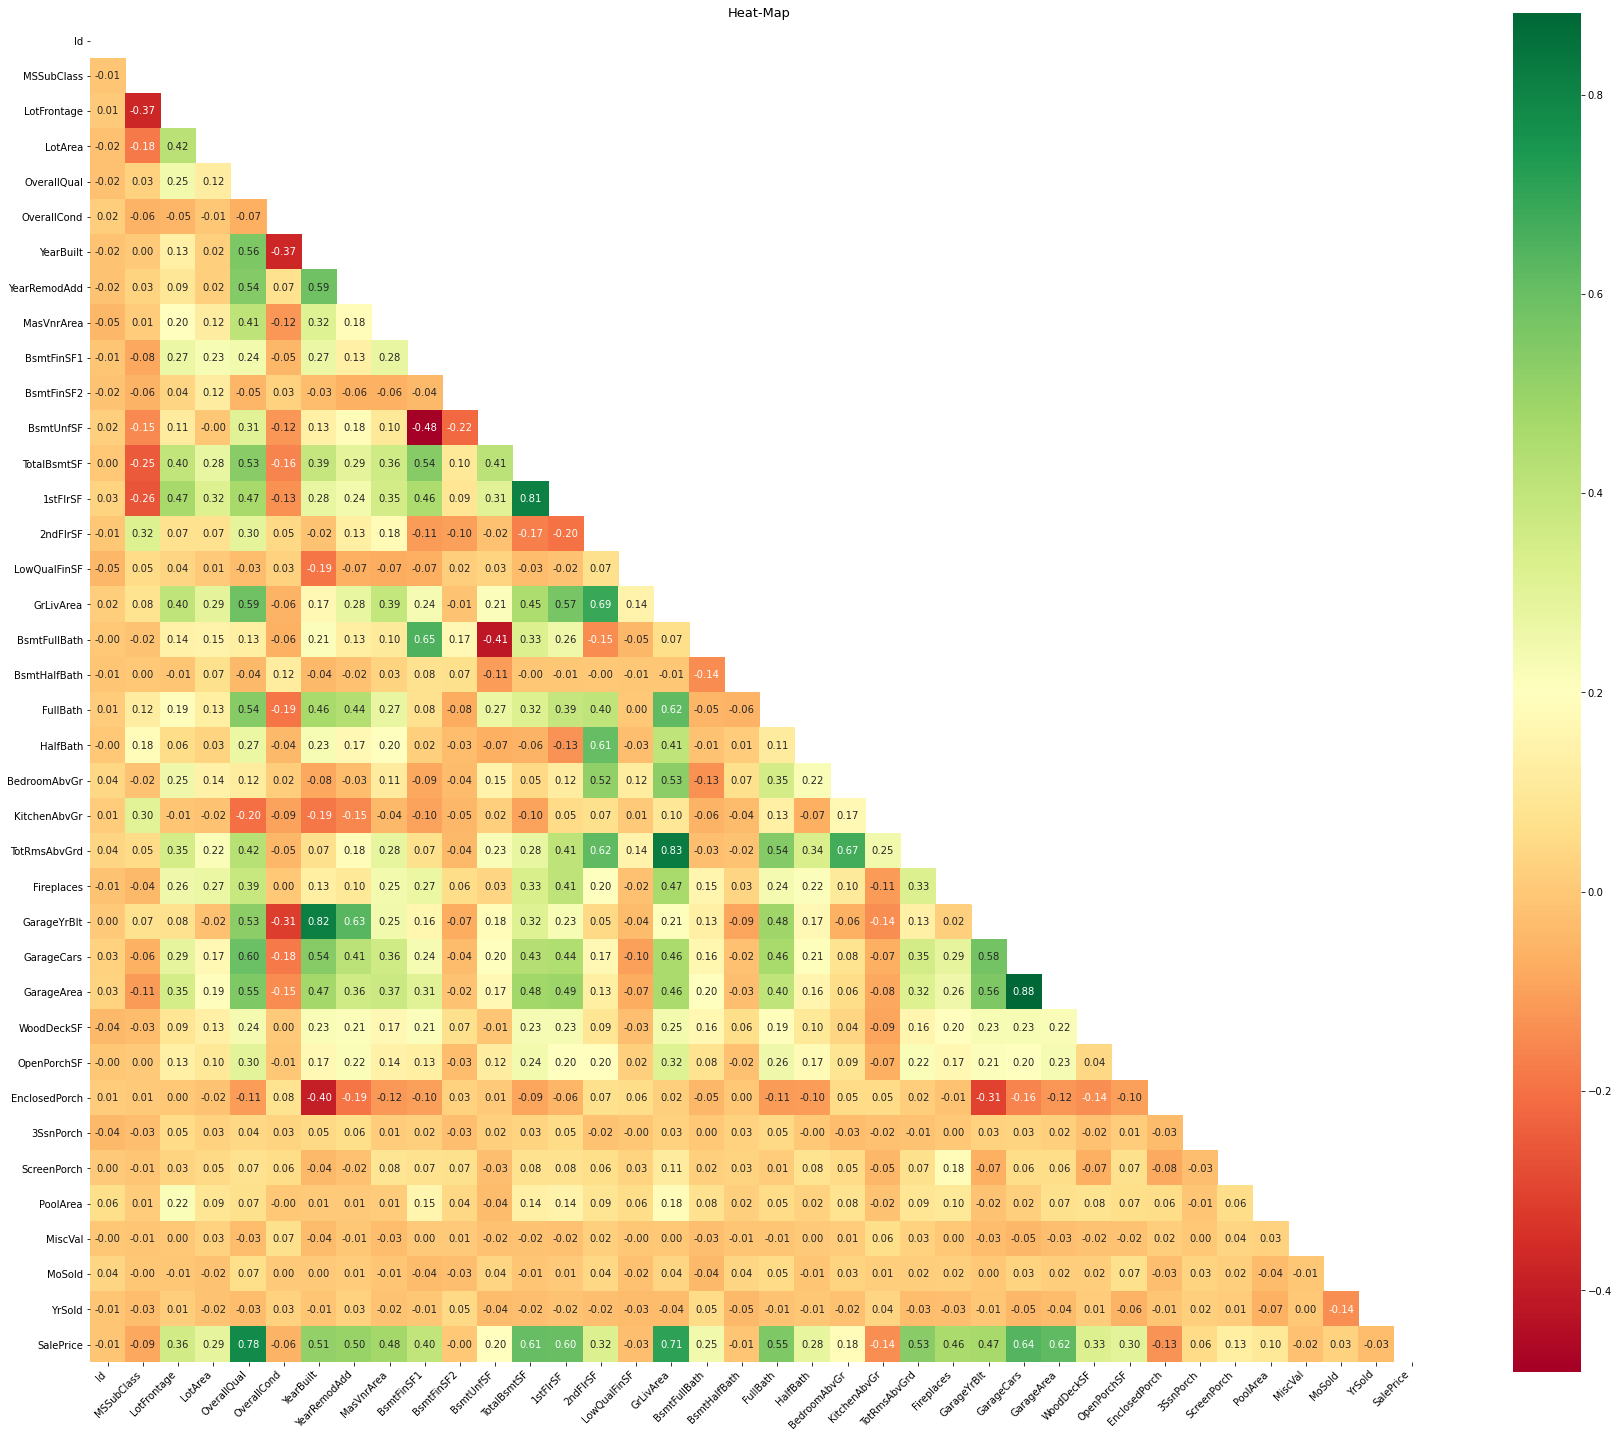

In [93]:
plt.figure(figsize=(30, 25))

cm = df.loc[:, numeric_vars + [target_var]].corr()

mask = np.zeros_like(cm, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(cm, 
                 annot = True, 
                 square = True, 
                 fmt = '.2f', 
                 cbar = True, 
                 cmap = 'RdYlGn', 
                 mask = mask)

plt.title('Heat-Map', fontsize = 13)
hm.set_xticklabels(cm.index, rotation = 45, horizontalalignment = 'right')

plt.show()

In [106]:
cm.loc[:, target_var].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.781627
GrLivArea        0.706389
GarageCars       0.641349
GarageArea       0.615973
TotalBsmtSF      0.605059
1stFlrSF         0.600908
FullBath         0.552960
TotRmsAbvGrd     0.531444
YearBuilt        0.511196
YearRemodAdd     0.500164
MasVnrArea       0.476215
GarageYrBlt      0.470408
Fireplaces       0.457865
BsmtFinSF1       0.399617
LotFrontage      0.355093
WoodDeckSF       0.327226
2ndFlrSF         0.323897
OpenPorchSF      0.300239
LotArea          0.285705
HalfBath         0.280958
BsmtFullBath     0.248465
BsmtUnfSF        0.196154
BedroomAbvGr     0.180632
KitchenAbvGr     0.140697
ScreenPorch      0.128236
EnclosedPorch    0.126947
PoolArea         0.101412
MSSubClass       0.087700
OverallCond      0.057046
3SsnPorch        0.055036
YrSold           0.034246
MoSold           0.028210
LowQualFinSF     0.025776
MiscVal          0.020518
Id               0.012306
BsmtHalfBath     0.010342
BsmtFinSF2       0.002162
Name: SalePr

* Variables __'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'__ have high correlation with the target variable.

* Variables (__'1stFlr' and _'TotalBsmtSF'___), (__'2ndFlr' and _'GrLivArea'___), (__'TotRmsAbvGrd' and _'GrLivArea'___), (___'YearBuilt'_ and 'GarageYrBuilt'__), (___'GarageArea'_ and 'GarageCars'__) have high correlation between them.

* Might be feasable to drop either one of the variables from the pairs, ideally the one which has lesser correlation with the target variable.

### Data cleaning

In [79]:
test = pd.read_csv('test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   425          20       RL         72.0     9000   Pave   NaN      Reg   
1  1292         160       RM         21.0     1680   Pave   NaN      Reg   
2   462          70       RL         60.0     7200   Pave   NaN      Reg   
3   388          80       RL         72.0     7200   Pave   NaN      Reg   
4  1011          50       RL        115.0    21286   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1         Lvl    AllPub    Inside       Gtl       BrDale       Norm   
2         Lvl    AllPub    Inside       Gtl        SWISU      Feedr   
3         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
4         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            6            5       1956   
1       Norm    Twnhs     2Story            5            7       1972   
2       Norm     1Fam     2Story            7            9       1936   
3       Norm     1Fam       SLvl            6            6       1976   
4       Norm     1Fam     1.5Fin            5            5       1948   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1956     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1          1972     Gable  CompShg     CemntBd     CmentBd    BrkFace   
2          2007     Gable  CompShg     Wd Sdng     Wd Sdng       None   
3          1976       Hip  CompShg     MetalSd     MetalSd    BrkFace   
4          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        74.0        TA        TA     CBlock       Gd       TA           No   
1       268.0        TA        TA     CBlock       TA       TA           No   
2         0.0        Gd        Gd      PConc       Gd       Gd           No   
3       255.0        TA        TA     CBlock       TA       TA           Av   
4         0.0        TA        TA     CBlock       TA       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          LwQ         616          Unf           0        580         1196   
1          ALQ         231          Unf           0        399          630   
2          ALQ         350          BLQ         210          0          560   
3          ALQ         631          Unf           0        410         1041   
4          Unf           0          Unf           0        720          720   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Gd          Y      FuseA      1196         0             0   
1    GasA        TA          Y      SBrkr       630       672             0   
2    GasA        Ex          Y      SBrkr       575       560             0   
3    GasA        Ex          Y      SBrkr      1125         0             0   
4    GasA        TA          Y      SBrkr       720       551             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1196             1             0         1         0             2   
1       1302             0             0         2         1             3   
2       1135             1             0         1         0             3   
3       1125             1             0         1         0             3   
4       1271             0             0         2         0             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             6        Typ           1          Gd   
1             1          TA             6        Typ           0         NaN   
2             1          Gd             6        Typ           0         NaN   
3             1          TA  

In [80]:
test.shape

(219, 81)

In [81]:
temp_df = df.copy()
temp_test = test.copy()

* Replacing 'zeros' of 'FullBath' as NaN.
* Discretizing 'GrLivArea' into same no. of bins as unique values of 'FullBath', due to high correlation among them.
* Among those bins, find the most frequent value of 'FullBath'.
* Replace missing 'FullBath' with the value corresponding to the 'GrLivArea' bin.

In [82]:
temp_df.FullBath = temp_df.FullBath.replace(0, np.nan)

In [83]:
temp_df.FullBath.nunique()

3

In [84]:
temp_df['GRABins'] = pd.qcut(df.GrLivArea, q = temp_df.FullBath.nunique())

In [85]:
def get_bath(group):
    
    return group['FullBath'].mode()[0]

In [86]:
temp_df.groupby('GRABins').apply(get_bath)

GRABins
(333.999, 1248.0]    1.0
(1248.0, 1664.0]     2.0
(1664.0, 5642.0]     2.0
dtype: float64

In [87]:
def fill_bath(data, col1, col2):
    
    data.loc[data[col2].between(0, 1248), col1] = data.loc[data[col2].between(0, 1248), col1].fillna(1.0)
    data.loc[data[col2] > 1248, col1] = data.loc[data[col2] > 1248, col1].fillna(2.0)

In [88]:
fill_bath(temp_df, 'FullBath', 'GrLivArea')

In [89]:
temp_test.FullBath = temp_test.FullBath.replace(0, np.nan)

In [90]:
fill_bath(temp_test, 'FullBath', 'GrLivArea')

In [91]:
temp_df.drop('GRABins', axis=1, inplace=True)

In [ ]:
# Features for linear models
# lin_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'MasVnrArea', 'LotFrontage', 'ExterQual' , 'HeatingQC' , 'BsmtQual' , 'KitchenQual' , 'GarageFinish' , 'MasVnrType']

# Features for non-linear models
# non_lin_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'MasVnrArea', 'LotFrontage', 'ExterQual' , 'HeatingQC' , 'BsmtQual' , 'KitchenQual' , 'GarageFinish' , 'MasVnrType']

#### Handling Outliers

In [92]:
gra_cap = 4500
fsa_cap = 3300
tbsf_cap = 3200
lf_cap = 250

In [93]:
def outliers(data):
    
    data.loc[data['GrLivArea'] > gra_cap, 'GrLivArea'] = gra_cap
    data.loc[data['1stFlrSF'] > fsa_cap, '1stFlrSF'] = fsa_cap
    data.loc[data['TotalBsmtSF'] > tbsf_cap, 'TotalBsmtSF'] = tbsf_cap
    data.loc[data['LotFrontage'] > lf_cap, 'LotFrontage'] = lf_cap

In [94]:
outliers(temp_df)

In [95]:
outliers(temp_test)

#### Handling missing values

In [96]:
missing(temp_df)

Count    Dtype
Column                     
PoolQC        1234   object
MiscFeature   1195   object
Alley         1164   object
Fence         1001   object
FireplaceQu    585   object
LotFrontage    223  float64
GarageYrBlt     68  float64
GarageCond      68   object
GarageType      68   object
GarageFinish    68   object
GarageQual      68   object
BsmtFinType2    34   object
BsmtExposure    34   object
BsmtQual        33   object
BsmtCond        33   object
BsmtFinType1    33   object
MasVnrArea       5  float64
MasVnrType       5   object
Electrical       1   object

* Obtaining the median lot frontage values according to unique values of total rooms above ground, due to high correlation.
* Creating a dictionary 'lot_map' of corresponding median values.
* Mapping missing values on train and test data.

In [97]:
lot_map = temp_df.groupby('TotRmsAbvGrd').LotFrontage.mean().round(2).to_dict()

In [98]:
lot_map

{2: 50.0,
 3: 35.62,
 4: 57.27,
 5: 62.45,
 6: 68.22,
 7: 71.28,
 8: 77.92,
 9: 85.52,
 10: 85.66,
 11: 84.25,
 12: 109.44,
 14: 60.0}

In [99]:
def fill_lotfrontage(data):
    
    data['lot_map'] = data.TotRmsAbvGrd.map(lot_map)
    data.loc[:, 'LotFrontage'].fillna(data['lot_map'], inplace = True)
    data.drop('lot_map', axis = 1, inplace = True)

In [100]:
fill_lotfrontage(temp_df)

In [101]:
fill_lotfrontage(temp_test)

* Obtaining the most occuring 'garage finish' value according to the bins of target variable, due to high correlation.
* Mapping missing values on train and test data accordingly. 

In [102]:
temp_df['SPBins'] = pd.qcut(df[target_var], q=3)

In [103]:
def get_garage(group):
    
    return group['GarageFinish'].mode()[0]

In [104]:
temp_df.groupby('SPBins').apply(get_garage)

SPBins
(34899.999, 139700.0]    Unf
(139700.0, 190000.0]     Unf
(190000.0, 755000.0]     RFn
dtype: object

In [105]:
def fill_garage(data, col1, col2):
    
    data.loc[data[col2].between(0, 190000.0), col1] = data.loc[data[col2].between(0, 190000.0), col1].fillna('Unf')
    data.loc[data[col2] > 190000.0, col1] = data.loc[data[col2] > 190000.0, col1].fillna('RFn')

In [106]:
fill_garage(temp_df, 'GarageFinish', target_var)

In [107]:
fill_garage(temp_test, 'GarageFinish', target_var)

In [108]:
temp_df.drop('SPBins', axis=1, inplace=True)

In [109]:
temp_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1271          40       RL        57.27    23595   Pave   NaN      Reg   
1  1182         120       RM        64.00     5587   Pave   NaN      IR1   
2   380          60       RL        60.00     8123   Pave   NaN      IR1   
3   792          80       RL        62.45    11333   Pave   NaN      IR1   
4    13          20       RL        57.27    12968   Pave   NaN      IR2   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Low    AllPub    Inside       Sev      ClearCr       Norm   
1         HLS    AllPub    Inside       Mod      Crawfor       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
3         Lvl    AllPub    Corner       Gtl      Mitchel       Norm   
4         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            7            6       1979   
1       Norm   TwnhsE     1Story            8            5       2008   
2       Norm     1Fam     2Story            6            5       2000   
3       Norm     1Fam       SLvl            6            5       1976   
4       Norm     1Fam     1Story            5            6       1962   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1979      Shed  WdShake     Plywood     Plywood       None   
1          2008       Hip  CompShg     CemntBd     CmentBd      Stone   
2          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1976     Gable  CompShg     HdBoard     HdBoard       None   
4          1962       Hip  CompShg     HdBoard     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        Gd        TA      PConc       Gd       TA           Gd   
1       186.0        Ex        TA      PConc       Ex       TA           Gd   
2        16.0        TA        TA      PConc       Gd       TA           No   
3         0.0        TA        TA      PConc       Gd       TA           Av   
4         0.0        TA        TA     CBlock       TA       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1258          Unf           0         74         1332   
1          GLQ        1480          Unf           0        120         1600   
2          Unf           0          Unf           0        982          982   
3          ALQ         539          Unf           0        490         1029   
4          ALQ         737          Unf           0        175          912   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr      1332       192             0   
1    GasA        Ex          Y      SBrkr      1652         0             0   
2    GasA        Ex          Y      SBrkr      1007       793             0   
3    GasA        TA          Y      SBrkr      1062         0             0   
4    GasA        TA          Y      SBrkr       912         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1524             2             0       2.0         1             0   
1       1652             1             1       2.0         0             2   
2       1800             0             0       2.0         1             3   
3       1062             1             0       1.0         0             3   
4        912             1             0       1.0         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             4        Typ           1          TA   
1             1          Gd             5        Typ           1          Gd   
2             1          TA             7        Typ           1          TA   
3             1          TA  

* Obtaining the most occuring 'basement qual' value according to the bins of target variable, due to high correlation.
* Mapping missing values on train and test data accordingly. 

In [110]:
temp_df.BsmtQual.value_counts()

TA    554
Gd    526
Ex     96
Fa     32
Name: BsmtQual, dtype: int64

In [111]:
temp_df.BsmtQual.nunique()

4

In [112]:
temp_df['SPBins'] = pd.qcut(temp_df[target_var], q = temp_df.BsmtQual.nunique())

In [113]:
def get_base(group):
    
    return group['BsmtQual'].mode()[0]

In [114]:
temp_df.groupby('SPBins').apply(get_base)

SPBins
(34899.999, 129000.0]    TA
(129000.0, 163000.0]     TA
(163000.0, 213250.0]     Gd
(213250.0, 755000.0]     Gd
dtype: object

In [115]:
def fill_base(data, col1, col2):
    
    data.loc[data[col2].between(0, 163000.0), col1] = data.loc[data[col2].between(0, 163000.0), col1].fillna('TA')
    data.loc[data[col2] > 163000.0, col1] = data.loc[data[col2] > 163000.0, col1].fillna('Gd')

In [116]:
fill_base(temp_df, 'BsmtQual', target_var)

In [117]:
fill_base(temp_test, 'BsmtQual', target_var)

* Obtaining the mean 'masonry veneer area' values according to unique values of 'garage cars', due to high correlation.
* Creating a dictionary 'gcar_map' of corresponding mean values.
* Mapping missing values on train and test data.

In [118]:
gcar_map = temp_df.groupby('GarageCars').MasVnrArea.mean().round(2).to_dict()
gcar_map

{0: 16.41, 1: 39.07, 2: 98.6, 3: 286.53, 4: 143.4}

In [119]:
def map_gcars(data):
    
    data['gcar_map'] = data.GarageCars.map(gcar_map)
    data.loc[:, 'MasVnrArea'].fillna(data['gcar_map'], inplace = True)
    data.drop('gcar_map', axis = 1, inplace = True)

In [120]:
map_gcars(temp_df)

In [121]:
map_gcars(temp_test)

* Replacing missing 'masonry veneer type' values by it's mode on training and test data.

In [122]:
msn_mode = temp_df.MasVnrType.mode()[0]
msn_mode

'None'

In [123]:
temp_df.MasVnrType.fillna(msn_mode, inplace = True)

In [124]:
temp_test.MasVnrType.fillna(msn_mode, inplace = True)

In [125]:
temp_df.drop('SPBins', axis = 1, inplace = True)

### Feature Engineering

In [126]:
def add_features(data):
    
    
    data['grand_area'] = data['GrLivArea'] + data['TotalBsmtSF'] + data['GarageArea']
    data['total_rooms'] = data['TotRmsAbvGrd'] + data['FullBath']
    
    return data

In [127]:
temp2 = temp_df.copy()

In [128]:
temp_test2 = temp_test.copy()

In [131]:
temp2 = add_features(temp2)

In [132]:
temp_test2 = add_features(temp_test2)

### Saving the cleaned data

In [136]:
temp2.to_csv('train2.csv', index=False)
temp_test2.to_csv('test2.csv', index=False)

In [223]:
temp_df = pd.read_csv('train2.csv')
temp_test = pd.read_csv('test2.csv')

In [225]:
temp_test.shape

(219, 83)

In [139]:
temp_df.corr()[target_var].sort_values(ascending=False)

SalePrice        1.000000
grand_area       0.828327
OverallQual      0.781627
GrLivArea        0.716303
GarageCars       0.641349
TotalBsmtSF      0.634009
GarageArea       0.615973
1stFlrSF         0.614628
total_rooms      0.594277
FullBath         0.570106
TotRmsAbvGrd     0.531444
YearBuilt        0.511196
YearRemodAdd     0.500164
MasVnrArea       0.476391
GarageYrBlt      0.470408
Fireplaces       0.457865
BsmtFinSF1       0.399617
LotFrontage      0.371449
WoodDeckSF       0.327226
2ndFlrSF         0.323897
OpenPorchSF      0.300239
LotArea          0.285705
HalfBath         0.280958
BsmtFullBath     0.248465
BsmtUnfSF        0.196154
BedroomAbvGr     0.180632
ScreenPorch      0.128236
PoolArea         0.101412
3SsnPorch        0.055036
MoSold           0.028210
BsmtFinSF2      -0.002162
BsmtHalfBath    -0.010342
Id              -0.012306
MiscVal         -0.020518
LowQualFinSF    -0.025776
YrSold          -0.034246
OverallCond     -0.057046
MSSubClass      -0.087700
EnclosedPorc

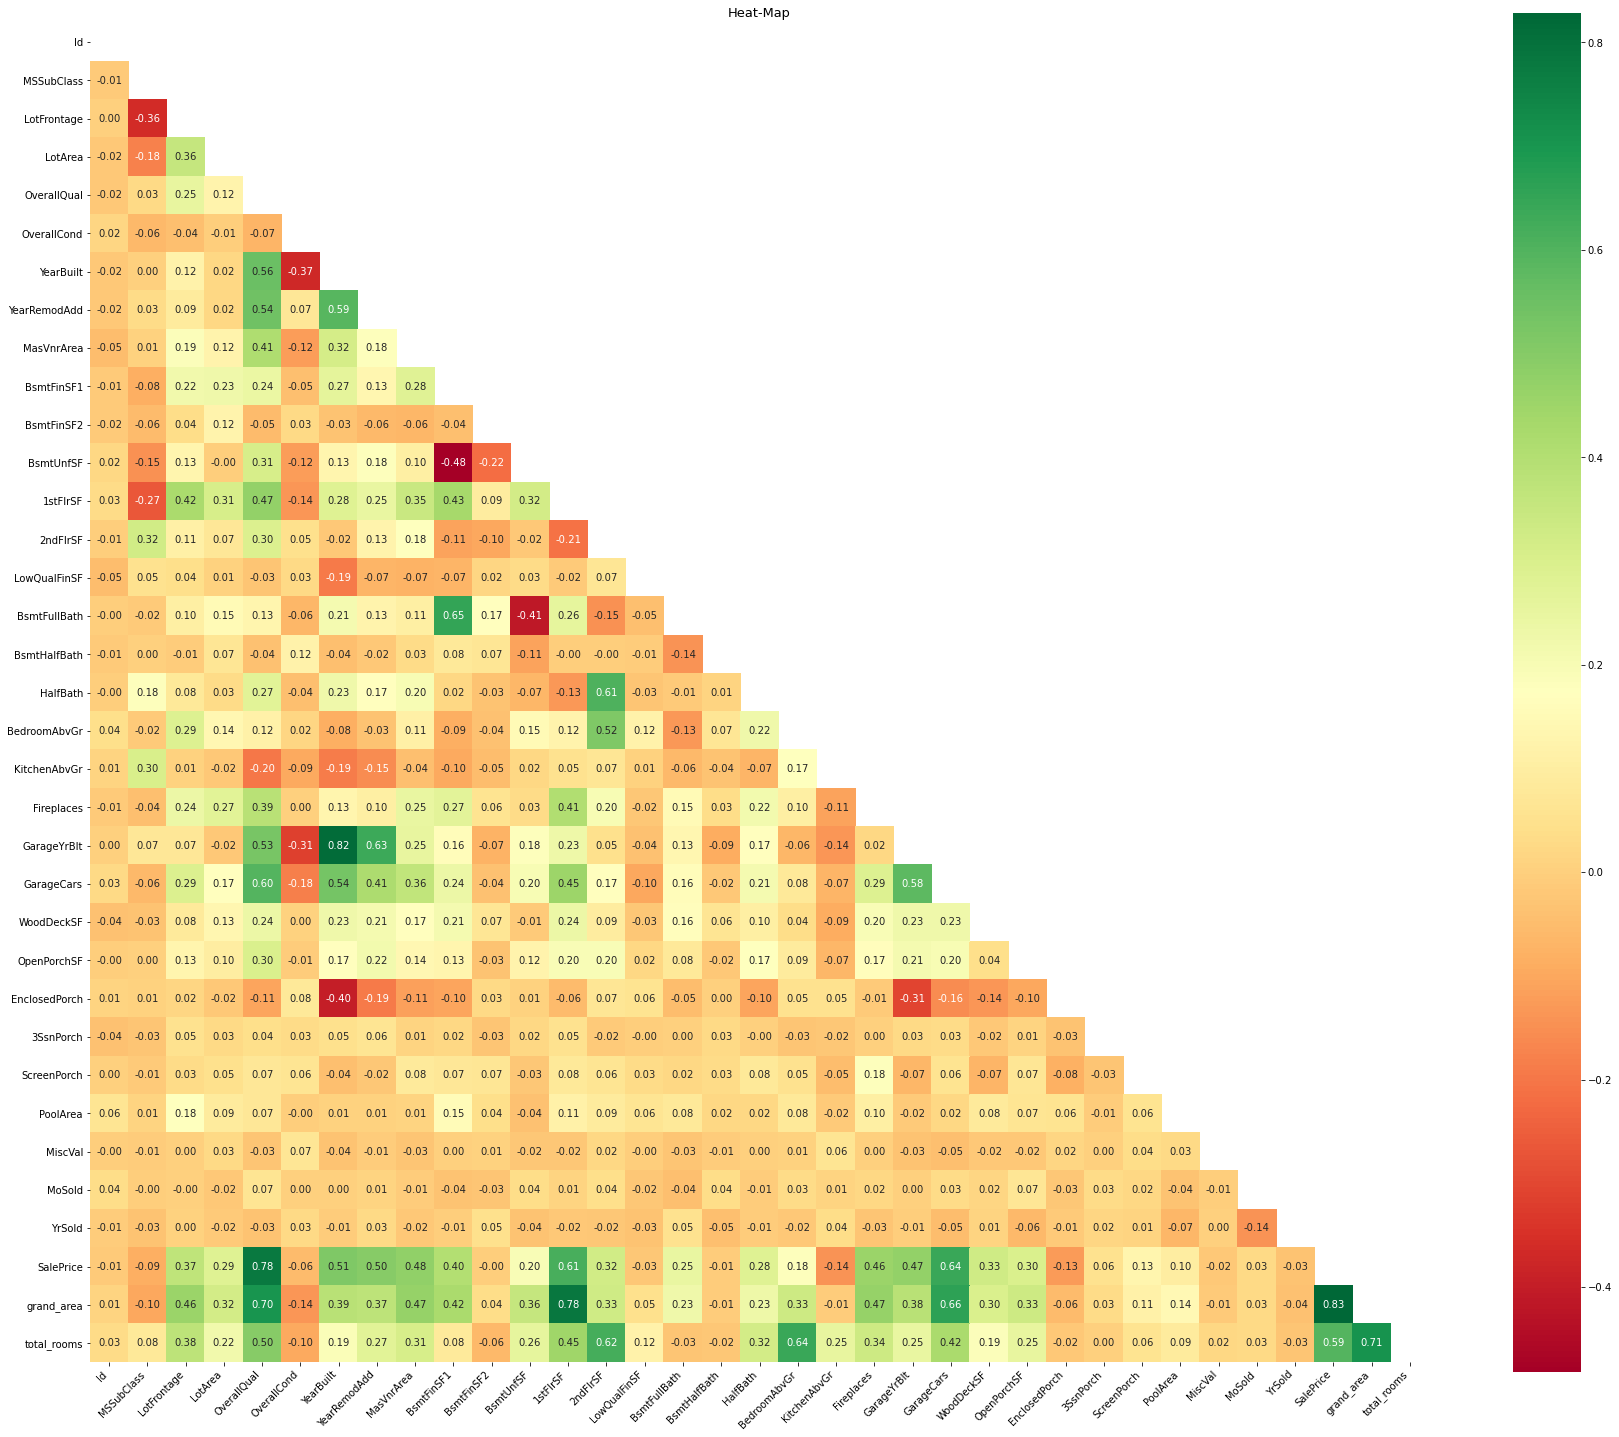

In [240]:
plt.figure(figsize=(30, 25))

cmat = temp_df.corr()

mask = np.zeros_like(cmat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(cmat, 
                 annot = True, 
                 square = True, 
                 fmt = '.2f', 
                 cbar = True, 
                 cmap = 'RdYlGn', 
                 mask = mask)

plt.title('Heat-Map', fontsize = 13)
hm.set_xticklabels(cmat.index, rotation = 45, horizontalalignment = 'right')

plt.show()

In [226]:
final_vars = ['grand_area', 'OverallQual', 'GarageCars', 'total_rooms', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 
              'ExterQual' , 'HeatingQC' , 'BsmtQual' , 'KitchenQual' , 'GarageFinish' , 'MasVnrType', 'SalePrice']

In [227]:
temp_df = temp_df.loc[:, final_vars]

In [228]:
temp_df.shape

(1241, 14)

In [229]:
temp_test = temp_test.loc[:, final_vars]

In [230]:
temp_test.shape

(219, 14)

In [231]:
temp_df.head()

grand_area  OverallQual  GarageCars  total_rooms  MasVnrArea  Fireplaces  \
0        3442            7           2          6.0         0.0           1   
1        3734            8           2          7.0       186.0           1   
2        3245            6           2          9.0        16.0           1   
3        2630            6           2          6.0         0.0           2   
4        2176            5           1          5.0         0.0           0   

   LotFrontage ExterQual HeatingQC BsmtQual KitchenQual GarageFinish  \
0        57.27        Gd        TA       Gd          Gd          Fin   
1        64.00        Ex        Ex       Ex          Gd          Fin   
2        60.00        TA        Ex       Gd          TA          Fin   
3        62.45        TA        TA       Gd          TA          RFn   
4        57.27        TA        TA       TA          TA          Unf   

  MasVnrType  SalePrice  
0       None     260000  
1      Stone     392500  
2    BrkFace     179000  
3       None     146800  
4       None     144000

In [232]:
temp_df.total_rooms = temp_df.total_rooms.astype('int')
temp_test.total_rooms = temp_test.total_rooms.astype('int')

### Saving the data with selected features

In [233]:
temp_df.to_csv('train3.csv', index=False)
temp_test.to_csv('test3.csv', index=False)

### Spot - Checking Algorithms

In [234]:
df = pd.read_csv('train3.csv')
df.head()

grand_area  OverallQual  GarageCars  total_rooms  MasVnrArea  Fireplaces  \
0        3442            7           2            6         0.0           1   
1        3734            8           2            7       186.0           1   
2        3245            6           2            9        16.0           1   
3        2630            6           2            6         0.0           2   
4        2176            5           1            5         0.0           0   

   LotFrontage ExterQual HeatingQC BsmtQual KitchenQual GarageFinish  \
0        57.27        Gd        TA       Gd          Gd          Fin   
1        64.00        Ex        Ex       Ex          Gd          Fin   
2        60.00        TA        Ex       Gd          TA          Fin   
3        62.45        TA        TA       Gd          TA          RFn   
4        57.27        TA        TA       TA          TA          Unf   

  MasVnrType  SalePrice  
0       None     260000  
1      Stone     392500  
2    BrkFace     179000  
3       None     146800  
4       None     144000

In [235]:
df.describe()

grand_area  OverallQual   GarageCars  total_rooms   MasVnrArea  \
count  1241.000000  1241.000000  1241.000000  1241.000000  1241.000000   
mean   3037.114424     6.091056     1.766317     8.094279   102.445552   
std     938.366249     1.376271     0.750393     1.960079   180.174251   
min     334.000000     1.000000     0.000000     3.000000     0.000000   
25%    2396.000000     5.000000     1.000000     7.000000     0.000000   
50%    2934.000000     6.000000     2.000000     8.000000     0.000000   
75%    3559.000000     7.000000     2.000000     9.000000   160.000000   
max    9118.000000    10.000000     4.000000    16.000000  1600.000000   

        Fireplaces  LotFrontage      SalePrice  
count  1241.000000  1241.000000    1241.000000  
mean      0.614827    69.887333  180342.477840  
std       0.645010    21.732073   78975.818472  
min       0.000000    21.000000   34900.000000  
25%       0.000000    60.000000  129000.000000  
50%       1.000000    69.000000  163000.000000  
75%       1.000000    80.000000  213250.000000  
max       3.000000   250.000000  755000.000000

In [236]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

### Splitting independant and target variables

In [237]:
x_train = df.drop('SalePrice', axis = 1).copy()
y_train = df['SalePrice'].copy()

In [262]:
y_train = np.log(y_train)
y_train.head()

0    12.468437
1    12.880292
2    12.095141
3    11.896826
4    11.877569
Name: SalePrice, dtype: float64

In [238]:
num_vars = x_train.select_dtypes(exclude='object').columns
num_vars

Index(['grand_area', 'OverallQual', 'GarageCars', 'total_rooms', 'MasVnrArea',
       'Fireplaces', 'LotFrontage'],
      dtype='object')

In [239]:
obj_vars = x_train.select_dtypes(include='object').columns
obj_vars

Index(['ExterQual', 'HeatingQC', 'BsmtQual', 'KitchenQual', 'GarageFinish',
       'MasVnrType'],
      dtype='object')

In [240]:
linear_transform = ColumnTransformer(transformers = [('scaler', StandardScaler(), num_vars), 
                                                   ('one_hot', OneHotEncoder(handle_unknown = 'ignore', sparse = False), obj_vars)],
                                   remainder = 'passthrough')

non_linear_transform = ColumnTransformer(transformers = [('one_hot', OneHotEncoder(handle_unknown = 'ignore', sparse = False), obj_vars)],
                                       remainder = 'passthrough')

### Model Pipelines

In [241]:
seed = 7

In [242]:
lreg_pipe = Pipeline(steps = [('processed_data', linear_transform), ('model', LinearRegression())])

ridge_pipe = Pipeline(steps = [('processed_data', linear_transform), ('model', Ridge(random_state=seed))])

lasso_pipe = Pipeline(steps = [('processed_data', linear_transform), ('model', Lasso(random_state=seed))])

elastic_pipe = Pipeline(steps = [('processed_data', linear_transform), ('model', ElasticNet(random_state=seed))])

svr_pipe = Pipeline(steps = [('processed_data', linear_transform), ('model', SVR())])

forest_pipe = Pipeline(steps = [('processed_data', non_linear_transform), ('model', RandomForestRegressor(random_state=seed))])

ada_pipe = Pipeline(steps = [('processed_data', non_linear_transform), ('model', AdaBoostRegressor(random_state=seed))])

grad_pipe = Pipeline(steps = [('processed_data', non_linear_transform), ('model', GradientBoostingRegressor(random_state=seed))])

In [243]:
models = [lreg_pipe, ridge_pipe, lasso_pipe, elastic_pipe, svr_pipe, forest_pipe, ada_pipe, grad_pipe]

In [263]:
def check_models(models):
    
    cv = KFold(n_splits = 10, random_state = seed)
    
    for reg in models:            
        val_scores = cross_val_score(reg, 
                                     x_train, 
                                     y_train, 
                                     scoring='neg_mean_squared_error', 
                                     cv=cv)
        mse = np.mean(-val_scores).round(5)
        print(f'.................Evaluating {reg["model"]}.................\n')
        print(f'Validation MSE: {mse}\n')

In [264]:
check_models(models)

C:\Users\Misbah\Anaconda3\envs\house\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


.................Evaluating LinearRegression().................

Validation MSE: 0.02732

.................Evaluating Ridge(random_state=7).................

Validation MSE: 0.02729

.................Evaluating Lasso(random_state=7).................

Validation MSE: 0.15881

.................Evaluating ElasticNet(random_state=7).................

Validation MSE: 0.15881

.................Evaluating SVR().................

Validation MSE: 0.02717

.................Evaluating RandomForestRegressor(random_state=7).................

Validation MSE: 0.02753

.................Evaluating AdaBoostRegressor(random_state=7).................

Validation MSE: 0.04088

.................Evaluating GradientBoostingRegressor(random_state=7).................

Validation MSE: 0.02357



### Hyper-parameter Tuning

In [257]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import clone

In [260]:
cv = KFold(n_splits=10, random_state=seed)

C:\Users\Misbah\Anaconda3\envs\house\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#### Ridge

In [269]:
ridge_params = {'model__alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]}

In [270]:
ridge_rndcv = RandomizedSearchCV(ridge_pipe, 
                                 param_distributions=ridge_params, 
                                 n_iter=100, 
                                 cv=cv, 
                                 scoring='neg_mean_squared_error',
                                 random_state=seed)

ridge_rndcv.fit(x_train, y_train)

C:\Users\Misbah\Anaconda3\envs\house\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=Pipeline(steps=[('processed_data',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               Index(['grand_area', 'OverallQual', 'GarageCars', 'total_rooms', 'MasVnrArea',
       'Fireplaces', 'LotFrontage'],
      dtype='object')),
                                                                              ('one_hot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                     

In [272]:
-ridge_rndcv.best_score_

0.027289074422668563

In [273]:
ridge_rndcv.best_params_

{'model__alpha': 1.0}

In [274]:
def _score(model):
    
    model = clone(model)
    
    scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    mse = np.mean(-scores)
    
    print(f'{model["model"]}')
    print(f'Validation MSE: {mse}')

In [275]:
ridge = Pipeline(steps = [('processed_data', linear_transform), ('model', Ridge(alpha=1.0, random_state=seed))])

In [276]:
_score(ridge)

Ridge(random_state=7)
Validation MSE: 0.027289074422668563


#### SVR

In [278]:
scoring = 'neg_mean_squared_error'

In [277]:
svr_params = {'model__C': [0.1, 0.5, 1, 5, 10, 20, 50, 100, 1000]}

In [280]:
svr_rndcv = RandomizedSearchCV(svr_pipe, 
                               param_distributions=svr_params, 
                               n_iter=100, 
                               cv=cv, 
                               scoring=scoring, 
                               random_state=seed)

svr_rndcv.fit(x_train, y_train)

C:\Users\Misbah\Anaconda3\envs\house\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=Pipeline(steps=[('processed_data',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               Index(['grand_area', 'OverallQual', 'GarageCars', 'total_rooms', 'MasVnrArea',
       'Fireplaces', 'LotFrontage'],
      dtype='object')),
                                                                              ('one_hot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                     

In [282]:
-svr_rndcv.best_score_

0.027114386495585518

In [283]:
svr_rndcv.best_params_

{'model__C': 0.5}

In [284]:
svr = Pipeline(steps = [('processed_data', linear_transform), ('model', SVR(C=0.5))])

#### Ranfom Forest Regressor

In [285]:
forest_params = {
    'model__n_estimators': [x for x in range(50, 201, 8)],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 3, 5, 7, 9],
    'model__max_depth': [x for x in range(1, 11)]
}

In [286]:
forest_rndcv = RandomizedSearchCV(forest_pipe, 
                                  param_distributions=forest_params, 
                                  n_iter=100, 
                                  cv=cv, 
                                  scoring=scoring, 
                                  random_state=seed)

forest_rndcv.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=Pipeline(steps=[('processed_data',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               Index(['ExterQual', 'HeatingQC', 'BsmtQual', 'KitchenQual', 'GarageFinish',
       'MasVnrType'],
      dtype='object'))])),
                                             ('model',
                                              RandomForestRegressor(random_state=7))]),
                   n_iter=100,
                   param_distributions={'model__max_depth': [1, 2, 3, 4, 5, 6,
 

In [287]:
-forest_rndcv.best_score_

0.0264301179565549

In [288]:
forest_rndcv.best_params_

{'model__n_estimators': 170,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 8}

In [289]:
forest = Pipeline(steps = [('processed_data', non_linear_transform), 
                           ('model', RandomForestRegressor(n_estimators=170,
                                                           max_features='sqrt',
                                                           max_depth=8,
                                                           random_state=seed))])

In [290]:
_score(forest)

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=170,
                      random_state=7)
Validation MSE: 0.0264301179565549


#### Gradient Boosting Regressor

In [291]:
grad_params = {
    
    'model__n_estimators': [x for x in range(50, 201, 8)],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.5, 1],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__max_depth': [1, 2, 3, 5, 7, 10, 11, 13, 15],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': [1, 2, 3, 4, 5, 7, 9, 10]
    
}

In [292]:
grad_rndcv = RandomizedSearchCV(grad_pipe, 
                                param_distributions=grad_params, 
                                n_iter=100, 
                                scoring=scoring, 
                                cv=cv,
                                random_state=seed)

grad_rndcv.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=Pipeline(steps=[('processed_data',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               Index(['ExterQual', 'HeatingQC', 'BsmtQual', 'KitchenQual', 'GarageFinish',
       'MasVnrType'],
      dtype='object'))])),
                                             ('model',
                                              Gra...
                   param_distributions={'model__learning_rate': [0.01, 0.05,
                                                                 0.1,

In [293]:
-grad_rndcv.best_score_

0.024139780093613276

In [296]:
grad_rndcv.best_params_

{'model__subsample': 0.9,
 'model__n_estimators': 194,
 'model__min_samples_leaf': 1,
 'model__max_features': 'auto',
 'model__max_depth': 1,
 'model__learning_rate': 0.3}

In [299]:
grad = Pipeline(steps = [('processed_data', non_linear_transform), 
                         ('model', GradientBoostingRegressor(random_state=seed))])

In [300]:
_score(grad)

GradientBoostingRegressor(random_state=7)
Validation MSE: 0.023565129004050812


#### AdaBoost Regressor

In [302]:
ada_params = {
    
    'model__n_estimators': [x for x in range(50, 201, 8)],
    'model__learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.5, 1],    
}

In [303]:
ada_rndcv = RandomizedSearchCV(ada_pipe, 
                               param_distributions=ada_params, 
                               n_iter=100, 
                               scoring=scoring, 
                               cv=cv,
                               random_state=seed)

ada_rndcv.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   estimator=Pipeline(steps=[('processed_data',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               Index(['ExterQual', 'HeatingQC', 'BsmtQual', 'KitchenQual', 'GarageFinish',
       'MasVnrType'],
      dtype='object'))])),
                                             ('model',
                                              AdaBoostRegressor(random_state=7))]),
                   n_iter=100,
                   param_distributions={'model__learning_rate': [0.001, 0.005,
     

In [305]:
-ada_rndcv.best_score_

0.032616894203863954

In [306]:
ada_rndcv.best_params_

{'model__n_estimators': 66, 'model__learning_rate': 0.1}

In [307]:
ada = Pipeline(steps = [('processed_data', non_linear_transform), ('model', AdaBoostRegressor(n_estimators=66,
                                                                                              learning_rate=0.1,
                                                                                              random_state=seed))])

In [308]:
_score(ada)

AdaBoostRegressor(learning_rate=0.1, n_estimators=66, random_state=7)
Validation MSE: 0.032616894203863954


#### Voting Ensemble

In [301]:
lin_reg = Pipeline(steps = [('processed_data', linear_transform), ('model', LinearRegression())])

In [309]:
voting = VotingRegressor(estimators = [('lin_reg', lin_reg),
                                       ('ridge_reg', ridge),
                                       ('svr_reg', svr),
                                       ('forest_reg', forest),
                                       ('ada_reg', ada),
                                       ('grad_reg', grad)])

In [312]:
voting_scores = cross_val_score(voting, x_train, y_train, scoring=scoring, cv=cv)
voting_mse = np.mean(-voting_scores)
voting_mse

0.024259376871849217

### Final Evaluation on train/test data

In [313]:
test_df = pd.read_csv('test3.csv')
test_df.head()

grand_area  OverallQual  GarageCars  total_rooms  MasVnrArea  Fireplaces  \
0        2689            6           1            7        74.0           1   
1        2196            5           1            8       268.0           0   
2        2271            7           2            7         0.0           0   
3        2518            6           1            7       255.0           1   
4        2303            5           1            9         0.0           1   

   LotFrontage ExterQual HeatingQC BsmtQual KitchenQual GarageFinish  \
0         72.0        TA        Gd       Gd          TA          RFn   
1         21.0        TA        TA       TA          TA          Unf   
2         60.0        Gd        Ex       Gd          Gd          RFn   
3         72.0        TA        Ex       TA          TA          Unf   
4        115.0        TA        TA       TA          TA          Unf   

  MasVnrType  SalePrice  
0    BrkFace     139000  
1    BrkFace     119500  
2       None     155000  
3    BrkFace     125000  
4       None     135000

In [314]:
test_df.shape

(219, 14)

In [315]:
x_test = test_df.drop('SalePrice', axis=1).copy()
y_test = test_df['SalePrice']

In [316]:
print(x_test.shape, y_test.shape)

(219, 13) (219,)


In [317]:
y_test = np.log(y_test)

In [338]:
def final_scores(model):
    
    from sklearn.metrics import mean_squared_error
    
    model = clone(model)
    
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    print(f'Train data MSE: {train_mse}')
    print(f'Test data MSE: {test_mse}')

#### Gradient Boosting Regressor

In [339]:
final_scores(grad)

Train data MSE: 0.014496767857940214
Test data MSE: 0.02141720369289835


#### Voting Ensemble Regressor

In [334]:
final_scores(voting)

Train data MSE: 0.017559419041385547
Test data MSE: 0.021017709706869246


#### Random Forest Regressor

In [323]:
final_scores(forest)

Train data MSE: 0.014047500689627339
Test data MSE: 0.021675762113513148


#### Linear Regression

In [324]:
final_scores(lin_reg)

Train data MSE: 0.025394434105548397
Test data MSE: 0.023416045290597463


#### Ridge

In [325]:
final_scores(ridge)

Train data MSE: 0.0253963558328742
Test data MSE: 0.023386335371560815


#### Ada Boost Regressor

In [326]:
final_scores(ada)

Train data MSE: 0.027092987518026267
Test data MSE: 0.028315716881697844


#### SVR

In [335]:
final_scores(svr)

Train data MSE: 0.015688012170880485
Test data MSE: 0.020765350064033492


* The __Voting Ensemble Regressor__ shows slightly better results compared to other models. 

### Fitting the Voting Regressor model and saving the object

In [340]:
import pickle

In [341]:
voting.fit(x_train, y_train)

VotingRegressor(estimators=[('lin_reg',
                             Pipeline(steps=[('processed_data',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               Index(['grand_area', 'OverallQual', 'GarageCars', 'total_rooms', 'MasVnrArea',
       'Fireplaces', 'LotFrontage'],
      dtype='object')),
                                                                              ('one_hot',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               Index([

In [342]:
pickle.dump(voting, open('voting_model.pkl', 'wb'))

### Trying out predictions with the model

In [343]:
model = pickle.load(open('voting_model.pkl', 'rb'))

In [368]:
def make_prediction(area, quality, g_cars, rooms, m_area, 
                    fireplaces, lot_area, exter_qual, h_qual, base_qual,
                    k_qual, garage,  m_type):
    
    a = int(area)
    q = int(quality)
    g_cars = int(g_cars)
    rooms = int(rooms)
    m_area = float(m_area)
    fireplaces = int(fireplaces)
    lot_area = float(lot_area)
    exter_qual = str(exter_qual)
    h_qual = str(h_qual)
    base_qual = str(base_qual)
    k_qual = str(k_qual)
    garage = str(garage)
    m_type = str(m_type)
    
    data = [[a, q, g_cars, rooms, m_area, fireplaces, lot_area, exter_qual, h_qual, base_qual, k_qual, garage, m_type]]
    data = pd.DataFrame(data, columns = x_train.columns)
    
    prediction = int(np.exp(model.predict(data)))
    result = f'Estimated Price: {prediction: ,} $'
    
    return result

In [369]:
make_prediction(3558, 8, 1, 5, 145.86, 2, 89.4, 'Gd', 'Ex', 'Gd', 'Fa', 'Fin', 'Stone')

'Estimated Price:  216,150 $'

In [ ]:
# cols = ['grand_area', 'OverallQual', 'GarageCars', 'total_rooms', 'MasVnrArea',
#        'Fireplaces', 'LotFrontage', 'ExterQual', 'HeatingQC', 'BsmtQual',
#        'KitchenQual', 'GarageFinish', 'MasVnrType']

In [346]:
x_train.describe()

grand_area  OverallQual   GarageCars  total_rooms   MasVnrArea  \
count  1241.000000  1241.000000  1241.000000  1241.000000  1241.000000   
mean   3037.114424     6.091056     1.766317     8.094279   102.445552   
std     938.366249     1.376271     0.750393     1.960079   180.174251   
min     334.000000     1.000000     0.000000     3.000000     0.000000   
25%    2396.000000     5.000000     1.000000     7.000000     0.000000   
50%    2934.000000     6.000000     2.000000     8.000000     0.000000   
75%    3559.000000     7.000000     2.000000     9.000000   160.000000   
max    9118.000000    10.000000     4.000000    16.000000  1600.000000   

        Fireplaces  LotFrontage  
count  1241.000000  1241.000000  
mean      0.614827    69.887333  
std       0.645010    21.732073  
min       0.000000    21.000000  
25%       0.000000    60.000000  
50%       1.000000    69.000000  
75%       1.000000    80.000000  
max       3.000000   250.000000